# Project: 물가 관련
## 물가 관련 지표들 작성 자동화

- modified on 2022/6/29, created on 2022/3/12
- 작성자: 박기영
- ECOS API 부분: 민지연  

<div class="alert alert-block alert-info">
작업설명
</div>

# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "X86F3N6MT6RRYXJ35P87"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive")

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.24.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

- 데이터 파일
    - CPI_items_weights2020.xlsx: 물가 통계 항목들, 가중치, 분류(근원 등). 가중치나 근원물가 항목 포함 여부 등 변화시만 업데이트 필요
    - CPI+core_SA.xlsx: 관리 제외 근원, 관리 제외 경직적, CPI, 근원에 대한 계절 조정치 (23.1까지 있으므로 이후 자료 분석하려면 업데이트 필요)
    - path_data 폴더에 저장해야 함
    
- python notebook 파일
    - CPI_API.ipynb
        - ECOS API를 이용해서 물가 정보를 불러오고 CPI_items_weights.xlsx의 정보와 결합하여 물가 통계 항목/가중치/분류 정리하고 확산지수, 기조적 물가지표 일부, CPI 관련 그래프들 작성
        
- 중요한 DataFrame
    - index_prices: CPI, 근원 등의 물가 수준을 모아 놓음
    - inf_table: index_prices에 있는 지표들의 yoy 증가율을 모아 놓음

- CPI_items_weights2020.xlsx는 아래와 같은 형식임

![image.png](attachment:698cdbd1-cc88-44ab-8774-fa9cfbc77cb9.png)

- CPI+core_SA.xlsx는 아래와 같은 형식임

![image.png](attachment:ea4972e0-6ab6-4fe0-aac3-fa7ce4e93264.png)

In [11]:
# paths to specify: you can change for your own environment

path_figure = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/"
path_file = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/'
path_data = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/'

In [5]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
from datetime import date

import requests
import json
from urllib.request import urlopen

# 🔹 수정된 부분
from pandas import json_normalize   # <-- 여기만 변경

import seaborn as sns
from scipy import stats

%config InlineBackend.figure_format = 'retina'
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=12)

# to prevent (-) from being expressed as empty square
plt.rcParams['axes.unicode_minus'] = False

# Use seaborn style defaults and set the default figure size
#sns.set(rc={'figure.figsize':(15, 9)})
sns.set(rc={'figure.figsize':(9, 5)})

sns.set(style="darkgrid")

# Where to save the figures
DIR = path_figure

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=1000)

In [7]:
# 한글 사용
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
filepath = path_file

<div class="alert alert-block alert-info">
API, 표본기간 설정
    
- 아래 셀에서 분석 목적에 따라 수정할 필요
- 통상 key_api, date_start, date_end 만 수정 필요
</div>

In [9]:
# API key
key_api = 'X86F3N6MT6RRYXJ35P87'

# sample period
date_start = '2020-01'
date_end = '2023-03'

# 물가 데이터 불러오기
dates_list = pd.date_range(date_start, date_end, freq='MS').strftime("%Y-%m").tolist()

# months of interest for price growth distribution: dates_list[-3:]는 최근 3개월 의미
dates_dist = dates_list[-3:]

# 확산지수 등 경우  과거 몇 개월까지  볼 것인지
number_period = 18

# 품목성질별 기여도 관련
date_start_contri = dates_list[-number_period]
date_end_contri = dates_list[-1]
col_name_contri = '품목성질별'

# 물가 항목에서 수요가 차지하는 비중
date_start_demand = dates_list[-number_period]
date_end_demand = dates_list[-1]
col_name_demand = '근원'

# 물가항목별 기여도 분포에서 관심있는 달
date_choice = dates_dist

## 매핑 파일(신선/생활/근원 등) 불러오기

- 파일 불러오고
- 품목명, 가중치, 코어 여부 등 정리

In [12]:
df = pd.read_excel(path_data +'CPI_items_weights2020.xlsx', header=0)
df.head(3)

품목명 (458개)  품목성질별   가중치 식료품/에너지 신선식품 생활물가 농산물및석유류제외지수 식료품및에너지제외지수 기타특수분류  \
0          쌀  농축수산물 5.500     비근원  NaN    ○           ○         NaN    NaN   
1         현미  농축수산물 0.500     비근원  NaN  NaN           ○         NaN    NaN   
2         찹쌀  농축수산물 0.700     비근원  NaN  NaN           ○         NaN    NaN   

   관리물가  
0  관리제외  
1  관리제외  
2  관리제외

In [13]:
# replacing NaN with False
df.fillna(False, inplace=True)

df.rename(columns={'품목명 (458개)':'품목명'},inplace=True)
df.rename(columns={'식료품/에너지':'근원'},inplace=True)
df.replace('근원',True,inplace=True)
df.replace('비근원',False,inplace=True)

df.replace('① ','신선어개',inplace=True)
df.replace('②','신선채소',inplace=True)
df.replace(' ③','신선과실',inplace=True)

df.replace('○',True,inplace=True)

df.replace('ⓣ','주거비',inplace=True)
df.replace('ⓤ','주거비제외서비스',inplace=True)
df.replace('ⓥ','에너지',inplace=True)

df.replace('관리제외',False,inplace=True)
df.replace('관리',True,inplace=True)

#df.drop(['식료품및에너지제외지수'],axis=1,inplace=True)

# tabulate variables
for col in df.columns[3:]:
    print(f'항목명: {col}')
    print(df[col].value_counts())
    print('\n')

df.set_index('품목명',inplace=True)
df.head(3)

항목명: 근원
근원
True     309
False    149
Name: count, dtype: int64


항목명: 신선식품
신선식품
False    403
신선채소      26
신선과실      18
신선어개      11
Name: count, dtype: int64


항목명: 생활물가
생활물가
False    314
True     144
Name: count, dtype: int64


항목명: 농산물및석유류제외지수
농산물및석유류제외지수
True     401
False     57
Name: count, dtype: int64


항목명: 식료품및에너지제외지수
식료품및에너지제외지수
True     309
False    149
Name: count, dtype: int64


항목명: 기타특수분류
기타특수분류
False       300
주거비제외서비스    142
에너지           9
주거비           7
Name: count, dtype: int64


항목명: 관리물가
관리물가
False    418
True      40
Name: count, dtype: int64




품목성질별   가중치     근원   신선식품   생활물가  농산물및석유류제외지수  식료품및에너지제외지수 기타특수분류   관리물가
품목명                                                                          
쌀    농축수산물 5.500  False  False   True         True        False  False  False
현미   농축수산물 0.500  False  False  False         True        False  False  False
찹쌀   농축수산물 0.700  False  False  False         True        False  False  False

### 근원, 관리물가 등 항목

In [14]:
# 소비자물가 항목 리스트
list_all = df.index.tolist()

# 관리물가 항목
list_manage = df[df['관리물가']==True].index.tolist()

# 관리물가 제외 리스트
list_nomanage = df[df['관리물가']==False].index.tolist()

# 근원품목 리스트 (식료품 및 에너지 제외)
list_core = df[df['근원']==True].index.tolist()

# 비근원품목 리스트 (식료품 및 에너지)
list_noncore = df[df['근원']==False].index.tolist()

# 관리물가 제외 근원
list_core_nomanage = df[(df['근원']==True) & (df['관리물가']==False)].index.tolist()

# 생활물가
list_living = df[df['생활물가']==True].index.tolist()

# 농산물 및 석유류 제외
list_core_alter = df[df['농산물및석유류제외지수']==True].index.tolist()

print(f'소비자물가 항목수 = {len(list_all)}')
print(f'관리물가 항목수 = {len(list_manage)}')
print(f'관리물가 항목 제외 = {len(list_nomanage)}')
print(f'근원품목 = {len(list_core)}')
print(f'비근원품목 = {len(list_noncore)}')
print(f'관리물가 항목 제외 근원품목 = {len(list_core_nomanage)}')
print(f'생활물가 = {len(list_living)}')
print(f'농산물 및 석유류 제외 = {len(list_core_alter)}')

소비자물가 항목수 = 458
관리물가 항목수 = 40
관리물가 항목 제외 = 418
근원품목 = 309
비근원품목 = 149
관리물가 항목 제외 근원품목 = 272
생활물가 = 144
농산물 및 석유류 제외 = 401


## 물가 raw data 분석

다음 자료들 작성:
- 전년동기 대비 증가율
- 전월대비 증가율
- 전년동기 대비 물가상승률(inflation rate)

### ECOS 물가 통계 불러오기

<div class="alert alert-block alert-info">
물가 통계 불러오기 - API key 필요
</div>

In [15]:
# when this function does not work, check the expiration date of key_api
def import_cpi(datestart, key_api=key_api):
    '''
    to import cpi items with their price each month from ECOS
    input: date_start, key_api
    output: 품목명, 지수
    '''
    url_ecos2 = 'http://ecos.bok.or.kr/api/StatisticSearch/'+key_api+'/json/kr/1/10000/901Y009/M/'+datestart+'/'+datestart

    response = requests.get(url_ecos2)
    #print(response. status_code)

    result = urlopen(url_ecos2)
    data = result.read()
    data = json.loads(data)
    df = pd.DataFrame(data['StatisticSearch']['row'])
    df.sort_values(by = 'ITEM_CODE1')

    cpi_item = df.ITEM_CODE1.isin(['A01101', 'A01102', 'A01103', 'A01104', 'A01105', 'A01106', 'A01107', 'A01108', 'A01109', 'A01110', 'A01111', 'A01112', 'A01113', 'A01114', 'A01115', 'A01116', 'A01117', 'A01118', 'A01201', 'A01202', 'A01203', 'A01204', 'A01205', 'A01206', 'A01207', 'A01301', 'A01302', 'A01303', 'A01304', 'A01305', 'A01306', 'A01307', 'A01308', 'A01309', 'A01310', 'A01311', 'A01312', 'A01313', 'A01314', 'A01315', 'A01316', 'A01317', 'A01318', 'A01319', 'A01401', 'A01402', 'A01403', 'A01404', 'A01405', 'A01501', 'A01502', 'A01601', 'A01602', 'A01603', 'A01604', 'A01605', 'A01606', 'A01607', 'A01608', 'A01609', 'A01610', 'A01611', 'A01612', 'A01613', 'A01614', 'A01615', 'A01616', 'A01617', 'A01618', 'A01619', 'A01620', 'A01701', 'A01702', 'A01703', 'A01704', 'A01705', 'A01706', 'A01707', 'A01708', 'A01709', 'A01710', 'A01711', 'A01712', 'A01713', 'A01714', 'A01715', 'A01716', 'A01717', 'A01718', 'A01719', 'A01720', 'A01721', 'A01722', 'A01723', 'A01724', 'A01725', 'A01726', 'A01727', 'A01728', 'A01729', 'A01730', 'A01801', 'A01802', 'A01803', 'A01804', 'A01805', 'A01806', 'A01807', 'A01808', 'A01809', 'A01810', 'A01811', 'A01901', 'A01902', 'A01903', 'A01904', 'A01905', 'A01906', 'A01907', 'A01908', 'A01909', 'A01910', 'A01911', 'A01912', 'A01913', 'A01914', 'A01915', 'A01916', 'A01917', 'A01918', 'A01919', 'A01920', 'A02101', 'A02102', 'A02201', 'A02202', 'A02203', 'A02204', 'A02205', 'A02206', 'B01101', 'B01102', 'B01103', 'B01104', 'B01105', 'B01106', 'B02101', 'C01101', 'C01102', 'C01103', 'C01104', 'C01201', 'C01202', 'C01203', 'C01204', 'C01205', 'C01301', 'C01302', 'C01303', 'C01304', 'C01305', 'C01306', 'C01401', 'C01501', 'C01502', 'C01503', 'C01601', 'C01602', 'C02101', 'C02102', 'C02103', 'C02104', 'D01101', 'D01102', 'D03101', 'D03102', 'D04101', 'D04102', 'D04201', 'D04202', 'D04203', 'D05101', 'D05201', 'D05202', 'D05301', 'D05302', 'D05303', 'E01101', 'E01102', 'E01103', 'E01104', 'E01105', 'E01106', 'E01107', 'E01108', 'E02101', 'E02102', 'E03101', 'E03102', 'E03103', 'E03104', 'E03105', 'E03106', 'E03107', 'E03108', 'E03109', 'E03110', 'E03111', 'E03112', 'E03113', 'E03114', 'E03115', 'E03201', 'E03202', 'E04101', 'E04102', 'E04103', 'E04104', 'E04105', 'E04106', 'E04107', 'E04108', 'E05101', 'E05102', 'E05103', 'E06101', 'E06102', 'E06103', 'E06104', 'E06105', 'E06106', 'E06107', 'E06108', 'E06109', 'E06110', 'E06201', 'E06202', 'F01101', 'F01102', 'F01103', 'F01104', 'F01105', 'F01106', 'F01107', 'F01108', 'F01109', 'F01110', 'F01111', 'F01112', 'F01113', 'F01114', 'F01115', 'F01116', 'F01201', 'F01202', 'F01203', 'F01204', 'F01205', 'F01206', 'F01207', 'F01208', 'F01209', 'F01210', 'F02101', 'F02102', 'F02103', 'F02104', 'F02201', 'F02202', 'F03101', 'F03102', 'G01101', 'G01102', 'G01103', 'G01104', 'G01105', 'G01106', 'G01107', 'G01108', 'G02101', 'G02102', 'G02103', 'G02201', 'G02202', 'G02203', 'G02204', 'G02205', 'G02206', 'G02301', 'G02302', 'G02303', 'G02304', 'G02305', 'G02306', 'G03101', 'G03102', 'G03201', 'G03202', 'G03203', 'G03301', 'G03302', 'G03303', 'G03401', 'G03402', 'H01101', 'H02101', 'H03101', 'H03102', 'H03103', 'H03104', 'I01101', 'I01102', 'I01201', 'I01202', 'I01203', 'I01204', 'I01205', 'I02101', 'I02102', 'I03101', 'I03102', 'I03103', 'I03104', 'I03105', 'I03106', 'I03107', 'I04101', 'I04102', 'I04103', 'I04104', 'I04105', 'I04106', 'I04107', 'I04108', 'I04109', 'I04110', 'I04201', 'I04202', 'I04203', 'I04204', 'I04205', 'I04206', 'I04207', 'I04208', 'I05101', 'I05102', 'I05103', 'I05104', 'I05105', 'I05106', 'I05201', 'I05301', 'I05302', 'I05303', 'I05304', 'I06101', 'I06102', 'J01101', 'J03101', 'J03102', 'J03103', 'J03104', 'J03105', 'J04101', 'J04102', 'J04103', 'J04104', 'J04105', 'J04106', 'J04107', 'J04108', 'J04109', 'J04110', 'J04111', 'J04201', 'J04202', 'J04203', 'K01101', 'K01102', 'K01103', 'K01104', 'K01105', 'K01106', 'K01107', 'K01108', 'K01109', 'K01110', 'K01111', 'K01112', 'K01113', 'K01114', 'K01115', 'K01116', 'K01117', 'K01118', 'K01119', 'K01120', 'K01121', 'K01122', 'K01123', 'K01124', 'K01125', 'K01126', 'K01127', 'K01128', 'K01129', 'K01130', 'K01131', 'K01132', 'K01133', 'K01134', 'K01135', 'K01136', 'K01137', 'K01138', 'K01139', 'K02101', 'K02102', 'K02103', 'K02104', 'K02105', 'L01101', 'L01102', 'L01103', 'L01104', 'L01105', 'L01201', 'L01202', 'L01203', 'L01204', 'L01205', 'L01206', 'L01207', 'L01208', 'L01209', 'L01210', 'L01211', 'L01212', 'L01213', 'L02101', 'L02102', 'L02103', 'L02104', 'L02105', 'L02106', 'L02107', 'L02108', 'L03101', 'L03102', 'L03103', 'L03104', 'L03105', 'L03106', 'L03107', 'L03108', 'L03109', 'L03110', 'L03111'])
    df['cpi_item'] = cpi_item
    cpi_item = df['cpi_item'] == True
    cpi_item = df[cpi_item]
    cpi_item = cpi_item[['ITEM_NAME1','DATA_VALUE','TIME']]
    cpi_item.rename(columns={'ITEM_NAME1':'품목명', 'DATA_VALUE':cpi_item.TIME.iloc[0]},inplace=True)
    cpi_item.drop(['TIME'],axis=1, inplace=True)
    cpi_item.set_index('품목명',inplace=True)
    cpi_item = cpi_item.astype('float')

    return cpi_item

In [16]:
# import CPI item names and price index from ECOS
daterange = pd.date_range(date_start, date_end , freq='MS').strftime('%Y%m').tolist()

raw = pd.DataFrame()

for date_starting in daterange:
    cpi_item = import_cpi(date_starting, key_api=key_api)
    raw = pd.concat([raw,cpi_item],axis=1)

raw.head(2)

202001  202002  202003  202004  202005  ...  202211  202212  202301  \
품목명                                          ...                           
쌀    97.650  97.520  97.280  97.090  96.910  ...  96.210  95.790  94.270   
현미  100.480  99.430  99.940 100.230  99.810  ... 100.450  98.870  98.320   

     202302  202303  
품목명                  
쌀    94.600  93.990  
현미   97.680  96.170  

[2 rows x 39 columns]

In [17]:
# 원자료를 transponse하고 패널데이터 형태로 변환
raw_CPI = raw.transpose()
raw_CPI.reset_index(inplace=True)
raw_CPI.rename(columns={'index':'mdate'},inplace=True)

# 월별 날짜를 index로
yr_start = int(str(raw_CPI.mdate.iloc[0])[0:4])
mon_start = int(str(raw_CPI.mdate.iloc[0])[-2:])
yr_end = int(str(raw_CPI.mdate.iloc[-1])[0:4])
mon_end = int(str(raw_CPI.mdate.iloc[-1])[-2:])

raw_CPI['mdate'] =  pd.date_range(date(yr_start,mon_start,1),date(yr_end,mon_end,1),freq='MS')
raw_CPI.set_index('mdate',inplace=True)
raw_CPI = raw_CPI.asfreq('MS')
raw_CPI.head(3)

품목명             쌀      현미      찹쌀     보리쌀       콩  ...  부동산중개수수료   행정수수료  \
mdate                                              ...                     
2020-01-01 97.650 100.480 100.930 103.490 102.980  ...   100.000 100.000   
2020-02-01 97.520  99.430 100.300 103.400  99.990  ...   100.000 100.000   
2020-03-01 97.280  99.940 100.580 102.820  99.870  ...   100.000 100.000   

품목명         대입전형료   시험응시료    장례비  
mdate                             
2020-01-01 99.910 100.000 99.680  
2020-02-01 99.910 100.000 99.790  
2020-03-01 99.910 100.000 99.750  

[3 rows x 458 columns]

In [18]:
raw_core = raw_CPI.loc[:,raw_CPI.columns.isin(list_core)]
raw_core.tail(3)

품목명             소주     과실주      맥주     막걸리      양주  ...  부동산중개수수료   행정수수료  \
mdate                                               ...                     
2023-01-01 110.070  96.650 107.050 121.750  94.790  ...    92.280 100.000   
2023-02-01 110.020  98.610 106.920 121.690 110.960  ...    92.280 100.000   
2023-03-01 110.070 100.190 107.170 122.050 108.370  ...    92.280 100.000   

품목명          대입전형료   시험응시료     장례비  
mdate                               
2023-01-01 100.920 104.870 105.420  
2023-02-01 100.920 104.870 105.720  
2023-03-01 100.920 104.870 106.430  

[3 rows x 309 columns]

### 전년 동월비 품목별 증가율(raw_growth_yoy)

In [19]:
# 전년동월비
raw_growth_yoy = raw_CPI.pct_change(12)*100
raw_growth_yoy.dropna(inplace=True)
raw_growth_yoy.tail(3)

품목명             쌀     현미      찹쌀    보리쌀       콩  ...  부동산중개수수료  행정수수료  대입전형료  \
mdate                                            ...                           
2023-01-01 -9.338 -8.369 -11.673  9.664 -10.691  ...     0.000  0.000  0.618   
2023-02-01 -8.093 -8.333  -9.868 10.341  -8.913  ...     0.000  0.000  0.618   
2023-03-01 -7.799 -8.714  -8.175 10.294  -8.113  ...     0.000  0.000  0.618   

품목명         시험응시료   장례비  
mdate                    
2023-01-01  0.000 1.551  
2023-02-01  0.000 1.634  
2023-03-01  0.000 2.013  

[3 rows x 458 columns]

### 전월대비 품목별 증가율(raw_growth)

In [20]:
# 전월대비
raw_growth = raw_CPI.pct_change()*100
raw_growth.head(3)

품목명             쌀     현미     찹쌀    보리쌀      콩  ...  부동산중개수수료  행정수수료  대입전형료  \
mdate                                          ...                           
2020-01-01    NaN    NaN    NaN    NaN    NaN  ...       NaN    NaN    NaN   
2020-02-01 -0.133 -1.045 -0.624 -0.087 -2.903  ...     0.000  0.000  0.000   
2020-03-01 -0.246  0.513  0.279 -0.561 -0.120  ...     0.000  0.000  0.000   

품목명         시험응시료    장례비  
mdate                     
2020-01-01    NaN    NaN  
2020-02-01  0.000  0.110  
2020-03-01  0.000 -0.040  

[3 rows x 458 columns]

## 물가 관련 지표들

### 물가지수 (소비자물가, 근원, 관리제외 근원 등)

In [21]:
# df와 raw의 항목이 같은지 확인
df.index.identical(raw.index)

True

In [22]:
def generate_priceindex(list_items):
    '''
    - generate price index of your choice (CPI, 관리물가, 관리물가 제외, 근원, 관리물가 제외 근원 등)
    - need df DataFrame based on CPI_items_weights2020.xlsx

    parameters:
        list_items: list_all, list_manage, list_nomanage, list_core, list_core_nomanage

    returns:
        DataFrame of price index named 'output_name'
    '''
    # redefine weights
    weight_new = df.loc[df.index.isin(list_items)].loc[:,['가중치']]
    weight_new['새 가중치'] = 1000*weight_new['가중치']/weight_new['가중치'].sum()

    raw_new = raw.loc[raw.index.isin(list_items)]

    priceindex = pd.DataFrame()

    for col in raw_new.columns:
        priceindex[col] = raw_new[col].mul(weight_new['새 가중치']*0.001,axis='rows')

    priceindex = pd.DataFrame(priceindex.sum(axis='rows'))
    priceindex.index = pd.date_range(date(yr_start,mon_start,1),date(yr_end,mon_end,1),freq='MS')

    return priceindex

In [23]:
# list_prices 에 있는 함목들의 yoy 인플레이션율 구하기
index_prices = generate_priceindex(list_all)

list_prices = [list_manage, list_nomanage, list_core, list_core_nomanage, list_core_alter,
               list_living]

for items in list_prices:
    new_price = generate_priceindex(items)
    index_prices = pd.concat([index_prices,new_price],axis=1)

# price index
index_prices.columns = ['CPI','관리','관리제외','근원','관리제외 근원', '근원(농산물 및 석유류 제외)','생활']

# inflation
inf_table = 100*index_prices.pct_change(12)

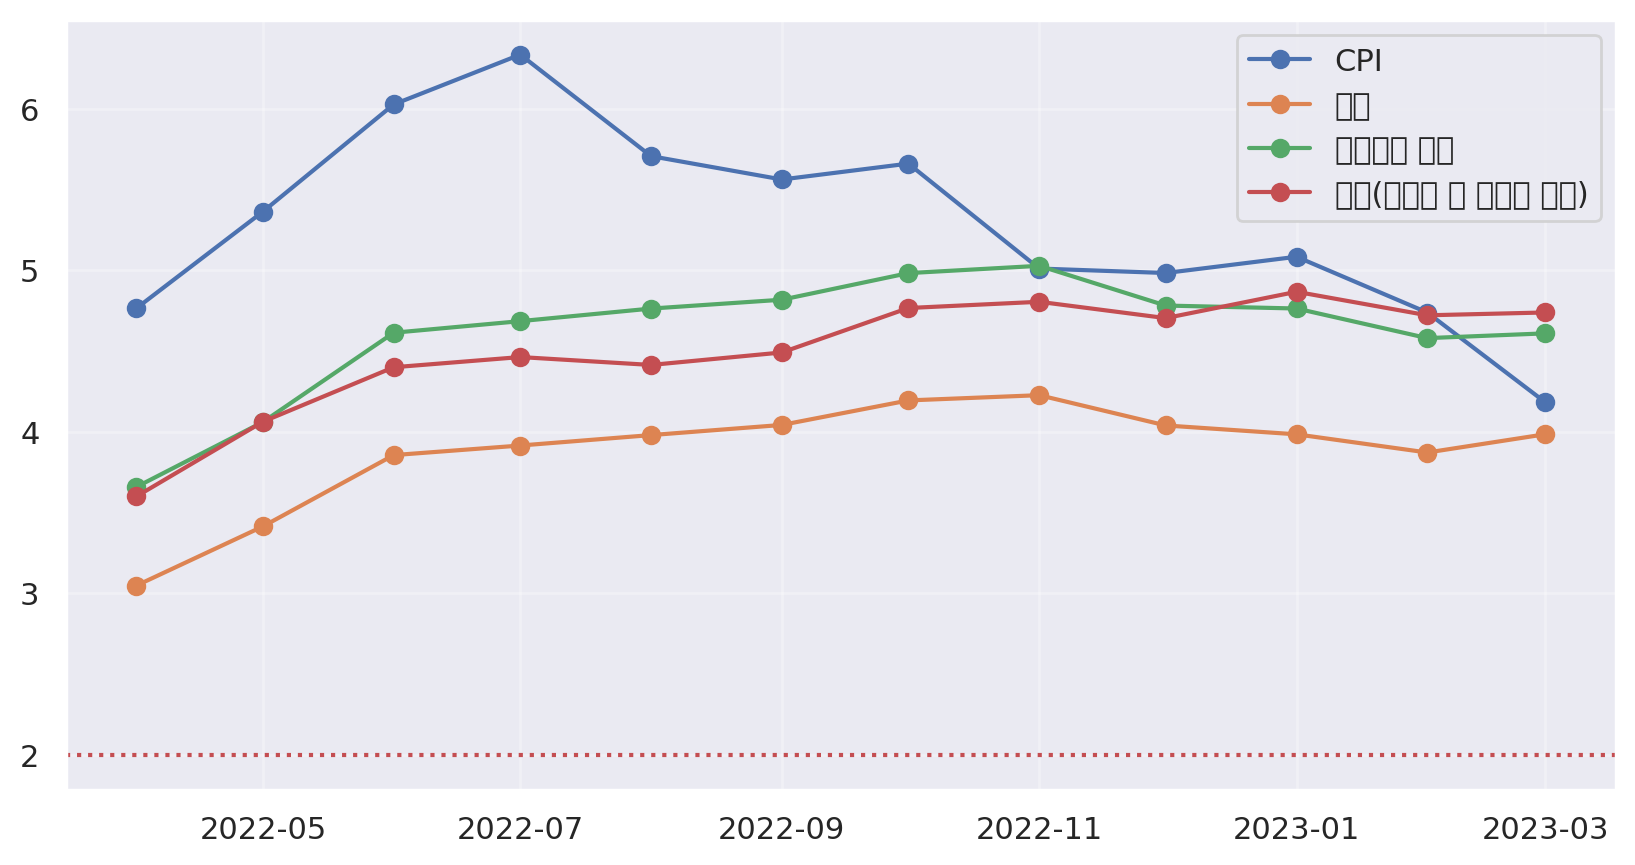

In [24]:
list_selection = ['CPI','근원','관리제외 근원','근원(농산물 및 석유류 제외)']

inf_mini = inf_table[-12:].loc[:,list_selection]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inf_mini, label=list_selection, marker="o")
ax.axhline(y=2, color='r',  linestyle=':')
ax.legend()
ax.grid(True)

### 기조적 물가지표 추이

<div class="alert alert-block alert-info">
- 근원물가: df['근원']==True <br>
- 관리제외 근원물가: 변동성이 큰 에너지, 식료품을 제외한 근원물가에서 관리물가(df['관리물가']==True) 품목을 추가로 제외<br>
- 조정평균물가: 소비자물가 개별항목 상승률의 극단치(변동성이 큰 항목)를 사후적으로 제외. 하단 13%, 상단 12% 제외 (미국의 경우 Cleveland Fed의 trimmed-mean CPI는 상하단 8%, Dallas Fed의 trimmed-mean PCE는 하단 24%, 상단 31% 제외)<br>
- 가중중위수물가: CPI 개별품목물가 상승률(가중치 감안) 분포상의 중위수물가(weighted-median CPI)에 해당 <br>
- 관리제외 경직적 물가: 소비자물가(관리물가 제외) 구성품목 중 가격조정빈도가 상대적으로 낮은 품목을 대상으로 선출 (not this time) <br>
- 경기민감 근원물가: 근원물가 중 GDP갭에 민감하게 반응하는 품목을 대상으로 산출(EU의 Superscore지표에 해당) (not this time) <br>
- UIG(Underlying Inflation Gauge): CPI 품목별 상승률의 중장기 공통성분을 추출 (not this time)

</div>

#### 가중중위수 물가(Weighted Median CPI)

In [25]:
df1 = df[['가중치']]
WeightedMedianCPI = []

for i in range(len(raw_growth_yoy)):
    df2 = raw_growth_yoy.iloc[i].reset_index()
    df2.set_index(['품목명'],inplace=True)
    df2.columns= ['상승률']

    df_median = df1.join(df2)
    df_median = df_median.sort_values(by=['상승률'])
    df_median['누적가중치'] = df_median['가중치'].cumsum()
    wmedian = df_median[df_median['누적가중치']>500]['상승률'].iloc[0]
    WeightedMedianCPI.append(wmedian)

In [26]:
WeightedMedianCPI = pd.DataFrame(WeightedMedianCPI, index=raw_growth_yoy.index)
WeightedMedianCPI.columns = ['가중중위수']

# inf_table과 가중중위수 물가 결합
inf_table = inf_table.join(WeightedMedianCPI)

#### 조정평균물가 (Trimmed-Mean CPI)

In [27]:
df1 = df[['가중치']]
trimmean = []

raw_new = raw.iloc[:,-len(raw_growth_yoy):]

for i in range(len(raw_growth_yoy)):
    df2 = raw_growth_yoy.iloc[i].reset_index()
    df2.set_index(['품목명'], inplace=True)
    df2.columns = ['상승률']

    df3 = pd.DataFrame(raw_new.iloc[:,i])
    df3.columns = ['물가수준']

    # df_trim: 세로축(index)에 품목, 가로축에 가중치, 상승률, 물가수준 변수
    df_trim = df1.join(df2)
    df_trim = df_trim.join(df3)

    df_trim['가중상승률'] = df_trim['가중치']*df_trim['상승률']
    df_trim = df_trim.sort_values(['상승률'])
    df_trim['누적가중치'] = df_trim['가중치'].cumsum()

    q_min = 130
    q_max = 880
    df_trim = df_trim.loc[(df_trim['누적가중치']>q_min) & (df_trim['누적가중치']<q_max)]

    df_trim['새 가중치'] = df_trim['가중치']/df_trim['가중치'].sum()
    df_trim['조정평균인플레'] = df_trim['새 가중치']*df_trim['상승률']
    inf_trim = df_trim['조정평균인플레'].sum()
    #print(price_trim)

    trimmean.append(inf_trim)

trimmedCPI = pd.DataFrame(trimmean, index=raw_growth_yoy.index)
trimmedCPI.columns = ['조정평균 물가상승률']

In [28]:
inf_table = inf_table.join(trimmedCPI).dropna()

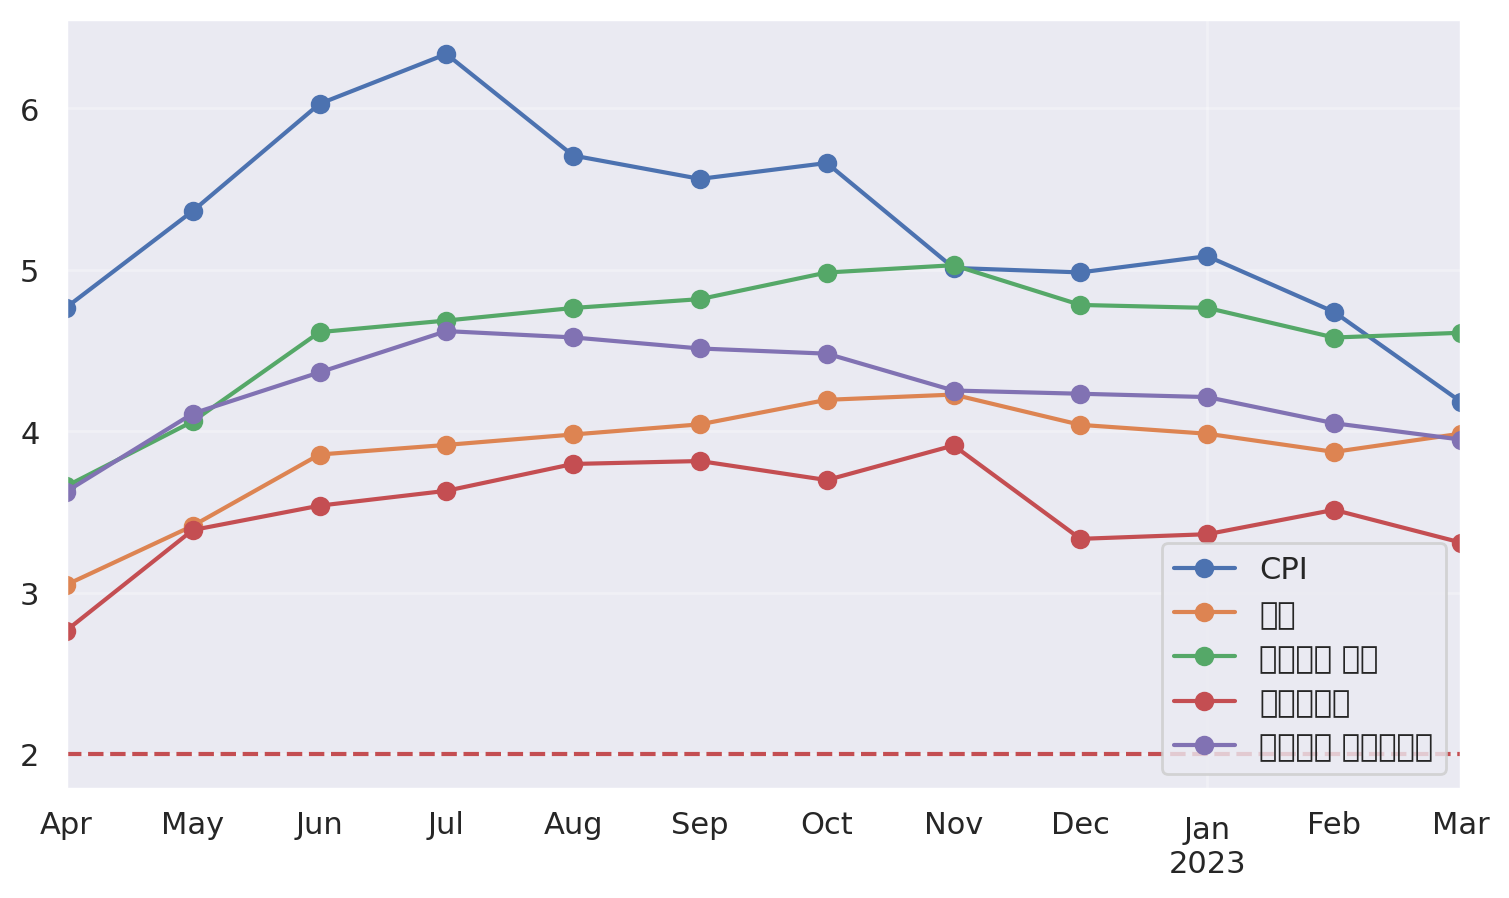

In [29]:
inf_table[-12:].loc[:,['CPI','근원','관리제외 근원','가중중위수','조정평균 물가상승률']].plot(marker="o")
plt.grid(True)
plt.axhline(y=2, color='r', linestyle='--')
plt.show()

In [30]:
pd.options.display.float_format = '{:,.2f}'.format
inf_table.loc['2022-03':,['CPI','근원','가중중위수','조정평균 물가상승률','관리제외 근원', '근원(농산물 및 석유류 제외)']]

CPI   근원  가중중위수  조정평균 물가상승률  관리제외 근원  근원(농산물 및 석유류 제외)
2022-03-01 4.17 2.89   2.79        3.27     3.47              3.29
2022-04-01 4.76 3.05   2.76        3.62     3.66              3.60
2022-05-01 5.36 3.41   3.39        4.11     4.06              4.06
2022-06-01 6.03 3.86   3.54        4.36     4.61              4.40
2022-07-01 6.34 3.91   3.63        4.62     4.68              4.46
2022-08-01 5.71 3.98   3.80        4.58     4.76              4.41
2022-09-01 5.56 4.04   3.81        4.51     4.82              4.49
2022-10-01 5.66 4.19   3.70        4.48     4.98              4.77
2022-11-01 5.01 4.23   3.91        4.25     5.03              4.80
2022-12-01 4.98 4.04   3.33        4.23     4.78              4.70
2023-01-01 5.08 3.98   3.36        4.21     4.76              4.87
2023-02-01 4.74 3.87   3.51        4.05     4.58              4.72
2023-03-01 4.18 3.98   3.31        3.95     4.61              4.74

In [31]:
inf_table.iloc[-12:]

CPI   관리  관리제외   근원  관리제외 근원  근원(농산물 및 석유류 제외)   생활  가중중위수  \
2022-04-01 4.76 1.78  5.49 3.05     3.66              3.60 5.71   2.76   
2022-05-01 5.36 2.47  6.07 3.41     4.06              4.06 6.66   3.39   
2022-06-01 6.03 2.51  6.88 3.86     4.61              4.40 7.39   3.54   
2022-07-01 6.34 3.42  7.03 3.91     4.68              4.46 7.91   3.63   
2022-08-01 5.71 3.44  6.25 3.98     4.76              4.41 6.78   3.80   
2022-09-01 5.56 3.45  6.07 4.04     4.82              4.49 6.47   3.81   
2022-10-01 5.66 5.04  5.81 4.19     4.98              4.77 6.43   3.70   
2022-11-01 5.01 5.02  5.01 4.23     5.03              4.80 5.44   3.91   
2022-12-01 4.98 5.03  4.97 4.04     4.78              4.70 5.69   3.33   
2023-01-01 5.08 5.73  4.93 3.98     4.76              4.87 6.01   3.36   
2023-02-01 4.74 5.84  4.47 3.87     4.58              4.72 5.43   3.51   
2023-03-01 4.18 6.21  3.71 3.98     4.61              4.74 4.29   3.31   

            조정평균 물가상승률  
2022-04-01        3.62  
2022-05-01        4.11  
2022-06-01        4.36  
2022-07-01        4.62  
2022-08-01        4.58  
2022-09-01        4.51  
2022-10-01        4.48  
2022-11-01        4.25  
2022-12-01        4.23  
2023-01-01        4.21  
2023-02-01        4.05  
2023-03-01        3.95

![image.png](attachment:94090416-1967-4abc-9428-1a03b730afad.png)

![image.png](attachment:3f8d147b-4fbc-44c9-9c8d-0fd4ddf582ab.png)

### 확산지수(index_diffusion)

- 아래 기준으로 점수를 매긴 뒤 가중평균
    - 전월대비상승률 +0.05~ 1점
    --0.05~+0.05 0.5점
    - ~-0.05 0점

In [32]:
def generate_diffusion(list_name):
    '''
    function that generate diffusion index

    input: list_name = list of interest (e.g., list_core(근원),list_noncore(비근원))
    output: DataFrame with diffusion index
    '''
    raw_diffusion = raw_growth.iloc[1:,:].copy()
    raw_diffusion = raw_diffusion.loc[:,raw_diffusion.columns.isin(list_name)]

    raw_diffusion[raw_diffusion>=0.05] = 1
    raw_diffusion[(raw_diffusion<0.05)&(raw_diffusion>=-0.05)] = 0.5
    raw_diffusion[raw_diffusion<-0.05] = 0

    # redefine weights
    weights = df.loc[df.index.isin(list_name)].loc[:,['가중치']]
    weights['새 가중치'] = 1000*weights['가중치']/weights['가중치'].sum()

    # 위 수치를 월별로 가중평균
    index_diffusion = pd.DataFrame(index=raw_diffusion.index.copy())
    index_diffusion['확산지수']=0

    for i in range(len(raw_diffusion)):
        index_diffusion.iloc[i]= raw_diffusion.iloc[i].mul(weights['새 가중치']*0.001).sum()*100

    index_diffusion['확산지수(MA=12)'] = index_diffusion['확산지수'].rolling(window =12).mean()

    return index_diffusion

In [33]:
generate_diffusion(list_core)[-6:]

확산지수  확산지수(MA=12)
mdate                        
2022-10-01 69.20        71.57
2022-11-01 69.43        71.57
2022-12-01 71.55        71.62
2023-01-01 80.16        71.42
2023-02-01 67.44        70.83
2023-03-01 65.22        70.82

### 기여도(raw_contribution)

In [34]:
raw_contribution = raw_growth_yoy.copy()

for col in raw_growth_yoy.columns:
    raw_contribution.loc[:,col] = raw_growth_yoy.loc[:,col]*df.loc[col,'가중치']*0.001

raw_contribution.tail(3)

품목명            쌀    현미    찹쌀  보리쌀     콩  ...  부동산중개수수료  행정수수료  대입전형료  시험응시료  \
mdate                                    ...                                  
2023-01-01 -0.05 -0.00 -0.01 0.00 -0.01  ...      0.00   0.00   0.00   0.00   
2023-02-01 -0.04 -0.00 -0.01 0.00 -0.01  ...      0.00   0.00   0.00   0.00   
2023-03-01 -0.04 -0.00 -0.01 0.00 -0.00  ...      0.00   0.00   0.00   0.00   

품목명         장례비  
mdate            
2023-01-01 0.01  
2023-02-01 0.01  
2023-03-01 0.01  

[3 rows x 458 columns]

### 물가상승률 분포

- 최근 3개월 소비자물가 항목별 상승률 분포
- 최근 3개월 근원물가 항목별 상승률 분포

In [35]:
def estimate_kernel(df, bw_method = 'silverman', smoothing_parameter=0.1):
    '''
    function for estimate kernel density

    parameters:
        df: DataFrame
        bw_method: default is silverman
        smoothing_parameter: default is 0.1

    returns:
        kernel_density
    '''

    x_min = df.iloc[-1,:].min()
    x_max = df.iloc[-1,:].max()
    xaxis = np.arange(x_min, x_max,0.01)

    # for storage
    kernel_density = []

    for i in np.arange(0,len(df)):
        kernel_estimator = stats.gaussian_kde(df.iloc[i,:].values, bw_method=bw_method)
        kernel_estimator.set_bandwidth(bw_method=smoothing_parameter)
        K = kernel_estimator(xaxis)
        kernel_density.append(K)

    return kernel_density, xaxis

<div class="alert alert-block alert-info">
관심 있는 달 입력 필요: dates_dist
smoothing parameter 설정 필요: smoothing_parameter가 클수록 smoother
</div>

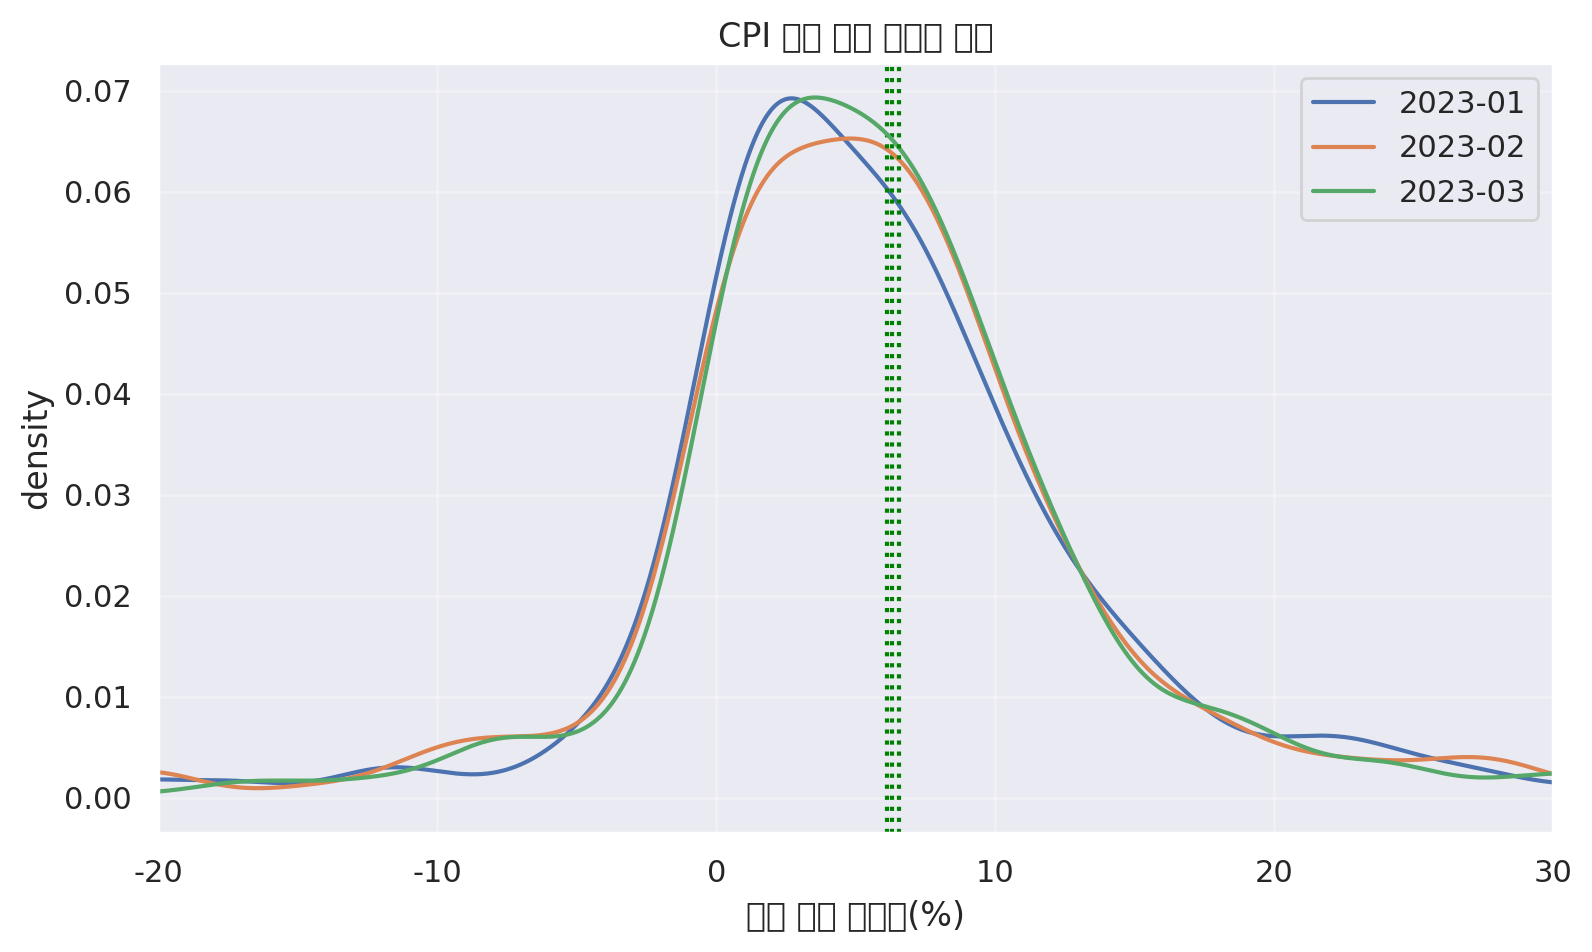

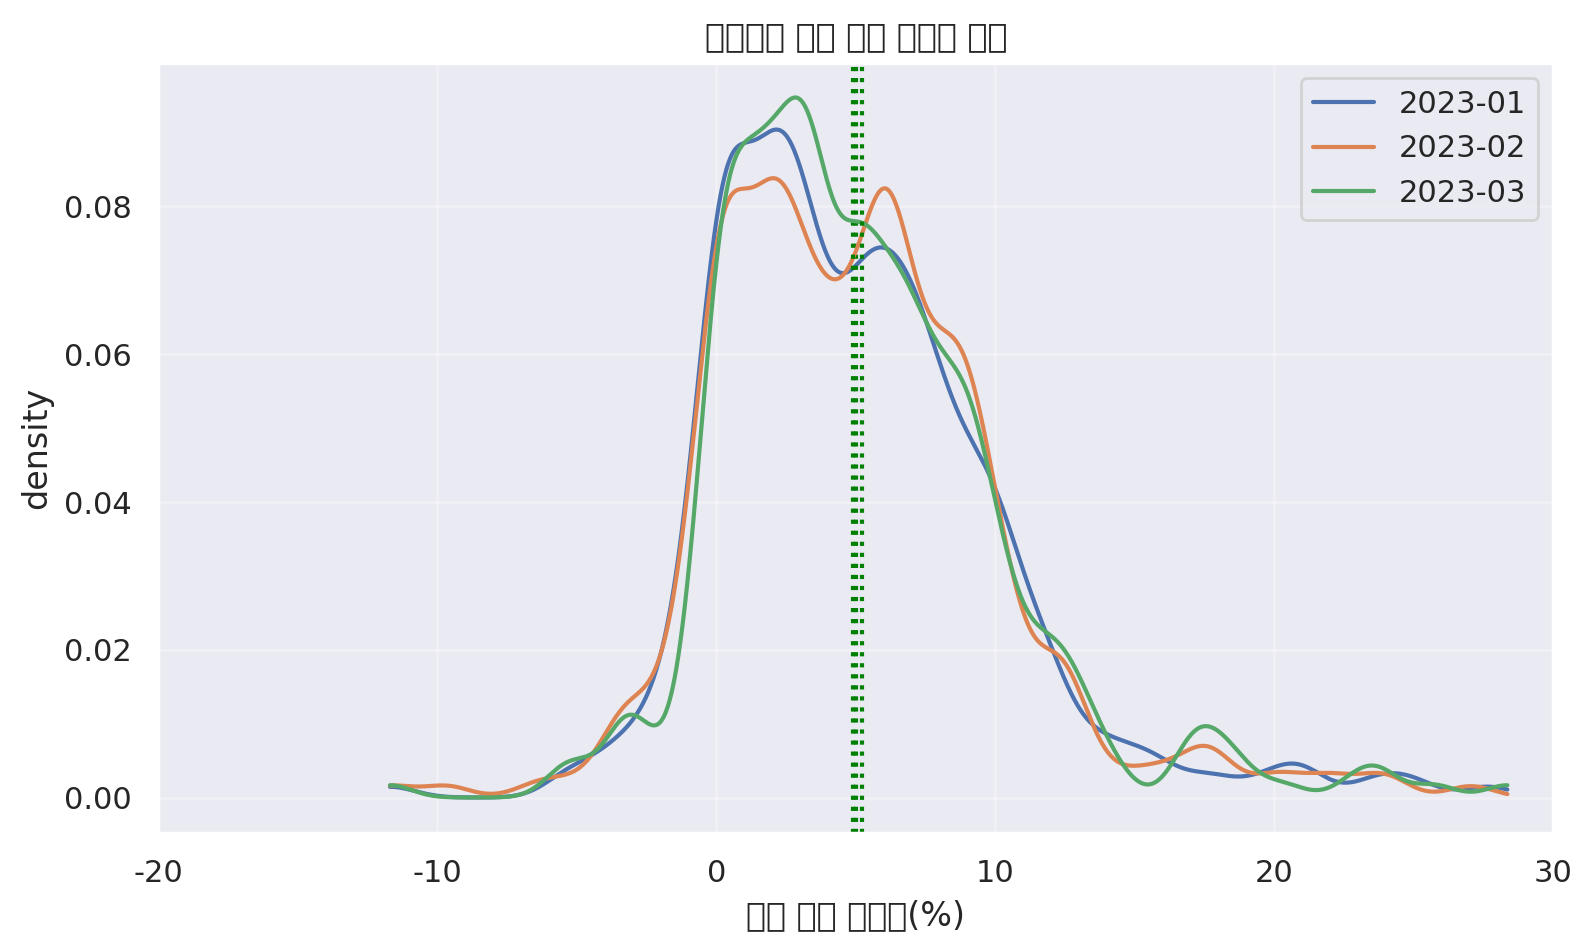

CPI   관리  관리제외   근원  관리제외 근원  ...   생활  가중중위수  조정평균 물가상승률  \
2023-01-01 5.08 5.73  4.93 3.98     4.76  ... 6.01   3.36        4.21   
2023-02-01 4.74 5.84  4.47 3.87     4.58  ... 5.43   3.51        4.05   
2023-03-01 4.18 6.21  3.71 3.98     4.61  ... 4.29   3.31        3.95   

            CPI 항목별 상승률 단순평균  근원 항목별 상승률 단순평균  
2023-01-01              6.28             5.00  
2023-02-01              6.13             4.90  
2023-03-01              6.55             5.24  

[3 rows x 11 columns]

In [36]:
# select months of interest
dates_dist = dates_dist

# select the dataset (CPI)
data_dist = raw_growth_yoy.loc[dates_dist]

kernel_density, xaxis = estimate_kernel(data_dist, smoothing_parameter=0.2)

for i in np.arange(0,len(data_dist)):
    plt.plot(xaxis,kernel_density[i],label=dates_dist[i])
    plt.axvline(data_dist.mean(axis=1)[i],color='green', ls=':')
    plt.legend(loc='best')

plt.xlabel('개별 품목 상승률(%)')
plt.ylabel('density')
plt.xlim([-20,30])
plt.title('CPI 개별 항목 상승률 분포')
plt.grid(True)
plt.show()

# select the dataset (CPI)
data_dist_core = raw_growth_yoy.loc[dates_dist,raw_growth_yoy.columns.isin(list_core)]
kernel_core, xaxis_core = estimate_kernel(data_dist_core, smoothing_parameter=0.15)

for i in np.arange(0,len(data_dist_core)):
    plt.plot(xaxis_core,kernel_core[i],label=dates_dist[i])
    plt.axvline(data_dist_core.mean(axis=1)[i],color='green', ls=':')
    plt.legend(loc='best')

plt.xlabel('개별 품목 상승률(%)')
plt.ylabel('density')
plt.xlim([-20,30])
plt.title('근원물가 개별 항목 상승률 분포')
plt.grid(True)
plt.show()

CPI_avg = pd.DataFrame(data_dist.mean(axis=1),columns=['CPI 항목별 상승률 단순평균'])
core_avg= pd.DataFrame(data_dist_core.mean(axis=1),columns=['근원 항목별 상승률 단순평균'])
inf_table[-len(dates_dist):].join([CPI_avg, core_avg])

### 2% 이상 상승품목 수, 물가상승 확산지수

In [37]:
diffusion = raw_growth_yoy.copy()

for col in diffusion.columns:
    diffusion[col] = diffusion[col].apply(lambda x: True if x>=2.0 else False)

In [38]:
index_diffusion = generate_diffusion(list_all)
index_diffusion['2% 이상 상승품목 수'] = diffusion.sum(axis='columns')

index_diffusion['근원'] = diffusion[diffusion.columns[diffusion.columns.isin(list_core)]].sum(axis='columns')
index_diffusion['비근원'] = index_diffusion['2% 이상 상승품목 수'] - index_diffusion['근원']

<div class="alert alert-block alert-info">
개월 수 입력 필요
</div>

In [39]:
number_period = number_period

index_diffusion = index_diffusion.iloc[-number_period:,:]
index_diffusion[['2% 이상 상승품목 수','근원','비근원']] = index_diffusion.loc[:,['2% 이상 상승품목 수','근원','비근원']].astype(int)
index_diffusion

확산지수  확산지수(MA=12)  2% 이상 상승품목 수   근원  비근원
mdate                                                
2021-10-01 67.33        66.87           188  114   74
2021-11-01 67.77        67.94           210  126   84
2021-12-01 65.98        68.05           228  135   93
2022-01-01 76.53        68.25           243  152   91
2022-02-01 72.27        68.43           256  161   95
2022-03-01 64.02        67.78           275  173  102
2022-04-01 71.48        68.23           289  173  116
2022-05-01 69.66        68.42           306  189  117
2022-06-01 70.41        68.79           325  203  122
2022-07-01 63.83        68.31           321  198  123
2022-08-01 68.66        68.29           320  203  117
2022-09-01 66.90        68.74           326  203  123
2022-10-01 65.35        68.57           325  206  119
2022-11-01 65.03        68.34           317  212  105
2022-12-01 66.57        68.39           326  217  109
2023-01-01 74.66        68.24           328  214  114
2023-02-01 65.79        67.70           328  215  113
2023-03-01 61.77        67.51           336  222  114

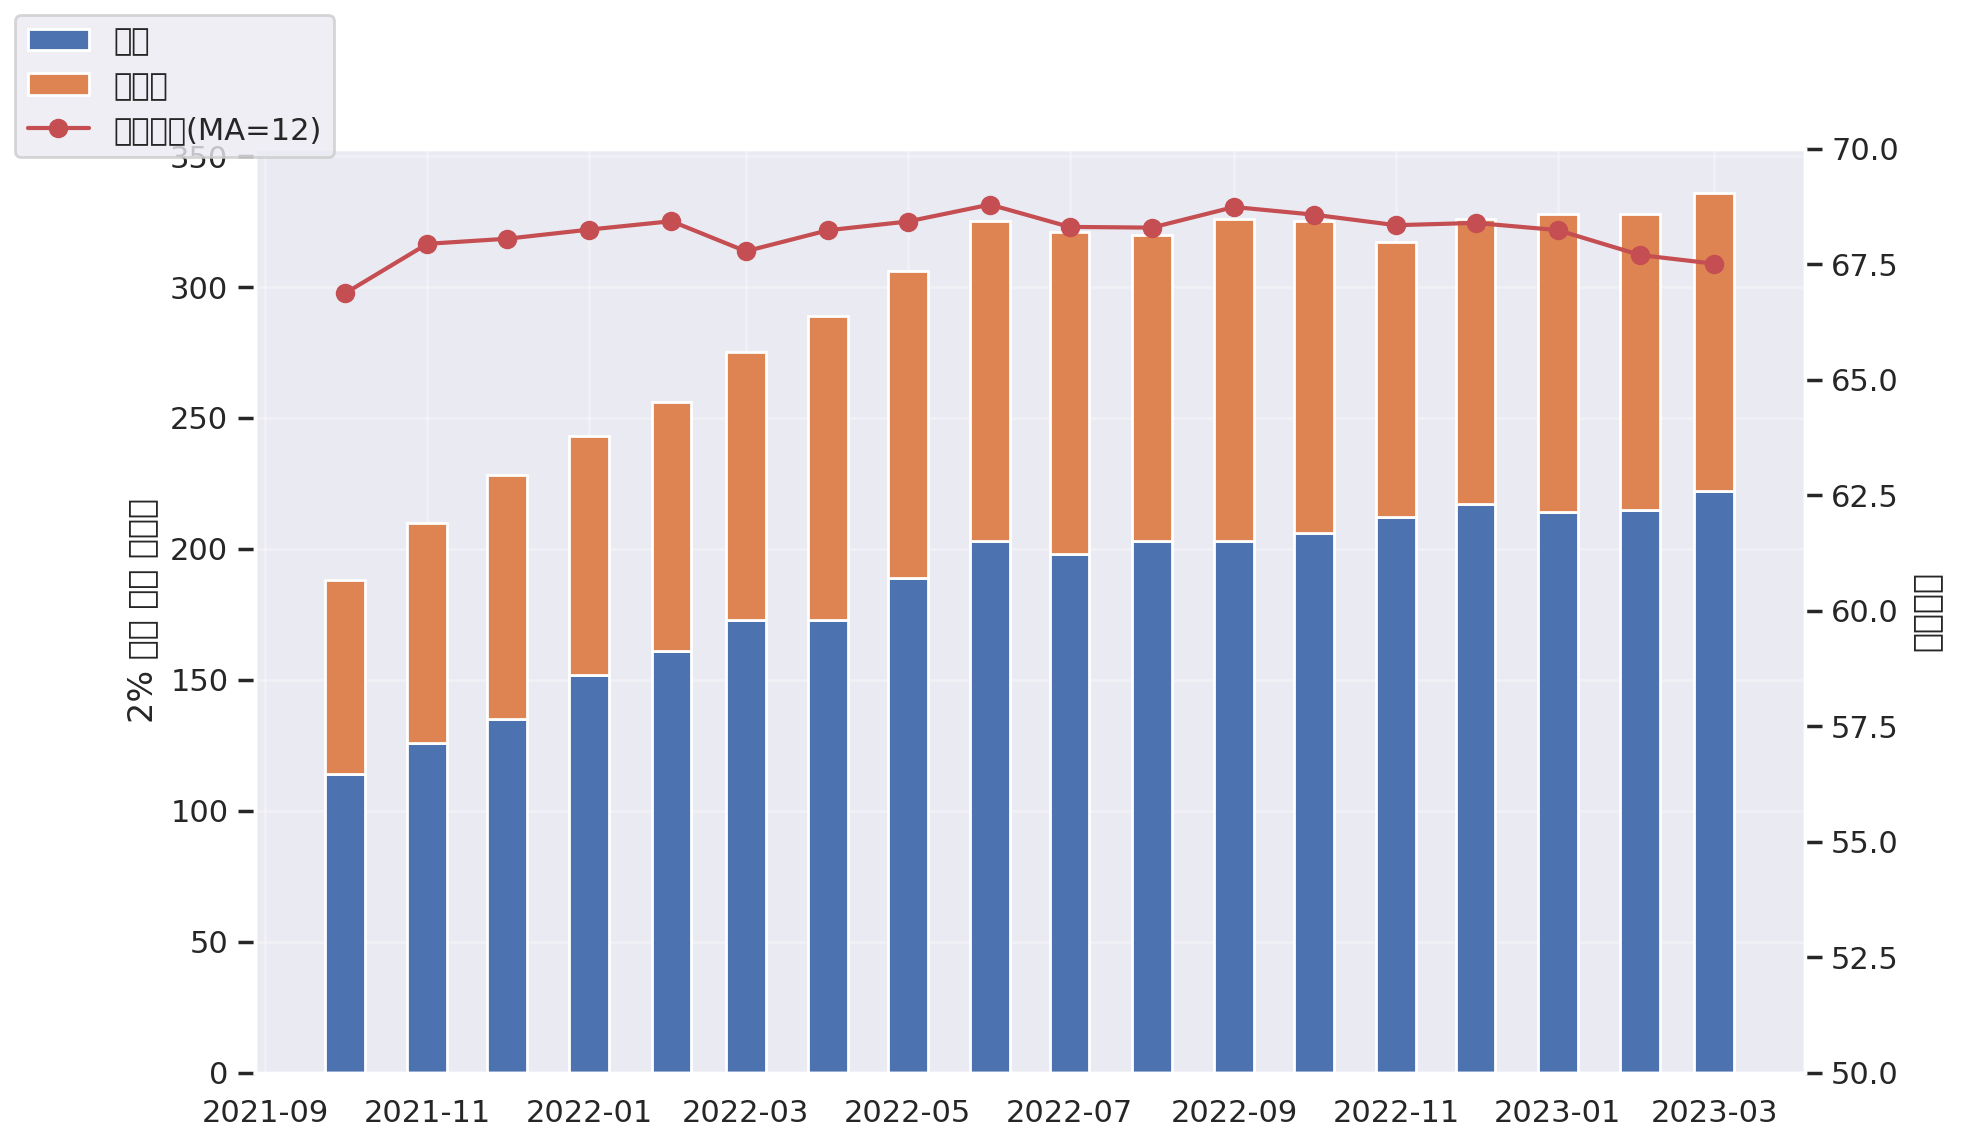

In [40]:
width = 15  # bar graph width

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(index_diffusion.index, index_diffusion['근원'],width=width, label='근원')
ax.bar(index_diffusion.index, index_diffusion['비근원'], bottom=index_diffusion['근원'],width=width, label='비근원')
ax.set_ylabel('2% 이상 상승 품목수')
ax.grid(True)

ax2 = ax.twinx()
ax2.plot(index_diffusion['확산지수(MA=12)'],color='r', label='확산지수(MA=12)',marker="o")
ax2.set_ylabel('확산지수')
ax2.set_ylim([50,70])
ax2.grid(False)

fig.legend(loc='upper left')
#fig.tight_layout()

plt.show()

In [41]:
import koreanize_matplotlib

### 확산지수 (근원, 비근원)

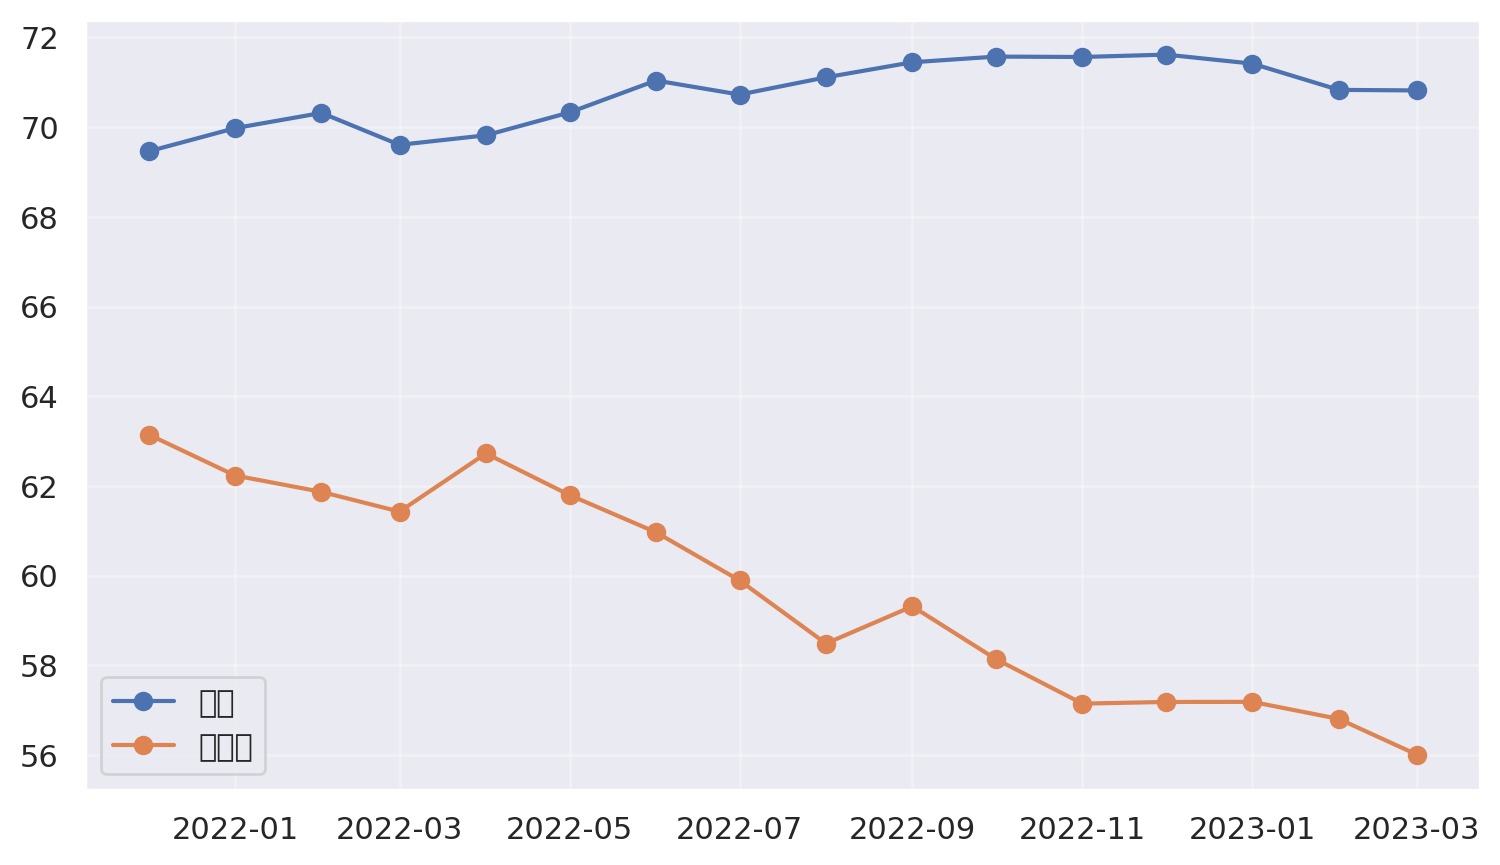

In [42]:
df_diff = pd.concat([generate_diffusion(list_core),generate_diffusion(list_noncore)],axis=1)
df_diff = df_diff.iloc[-16:,[1,3]]
df_diff.columns = ['근원','비근원']

plt.plot(df_diff, marker="o")
plt.legend(['근원','비근원'])
plt.show()

### 품목성질별 기여도

In [43]:
def decomp_contribution(date_choice, col_name):
    '''
    function that decomposes the contributions of each category

    input:
        list_date: date. only one date allowed
        col_name: category column of interest
    output:
        contributions of each category
    '''
    # find the index corresponding to date_choice
    nn = int(np.where(raw_CPI.index.isin(date_choice))[0])

    df_sector = raw_CPI.iloc[np.r_[nn-12,nn],:]
    df_sector = df_sector.T
    df_sector = df_sector.join(df.loc[:,[col_name,'가중치']])

    # calculate weighted average for each category of t and t-12
    df_sector['가중평균(t-12)'] = df_sector.iloc[:,0]*df_sector['가중치']
    df_sector['가중평균'] = df_sector.iloc[:,1]*df_sector['가중치']

    df_sector = df_sector.groupby(by=[col_name])[['가중평균(t-12)','가중평균']].sum()
    df_sector['weight'] = df_sector['가중평균(t-12)']/df_sector['가중평균(t-12)'].sum(axis=0)
    df_sector['growth'] = 100*(df_sector['가중평균']-df_sector['가중평균(t-12)'])/df_sector['가중평균(t-12)']
    df_sector['contribution'] = df_sector['weight']*df_sector['growth']

    contri = df_sector[['contribution']].T
    contri['합계(CPI)'] = contri.sum(axis=1)
    contri['mdate'] = date_choice

    contri = contri.reset_index(drop=True)
    contri = contri.set_index('mdate')

    return contri

<div class="alert alert-block alert-info">
기간과  컬럼명 입력 필요
</div>

In [44]:
df_contribution = pd.DataFrame()

# use (','.join(date_start)) to take out [ ] from date_start
for d in pd.date_range(date_start_contri, date_end_contri, freq='MS'):
    d = d.strftime("%Y-%m")
    contri = decomp_contribution([d], col_name_contri)
    df_contribution = pd.concat([df_contribution,contri],axis=0)
    df_contribution.asfreq('MS')

품목성질별    개인서비스  공공서비스  농축수산물   석유류  석유류 제외 공업제품  전기·수도·가스   집세  합계(CPI)
mdate                                                                  
2023-01   1.81   0.09   0.09  0.22         1.81      0.94 0.13     5.08
2023-02   1.78   0.10   0.10 -0.05         1.76      0.93 0.11     4.74
2023-03   1.79   0.14   0.26 -0.76         1.74      0.93 0.09     4.18

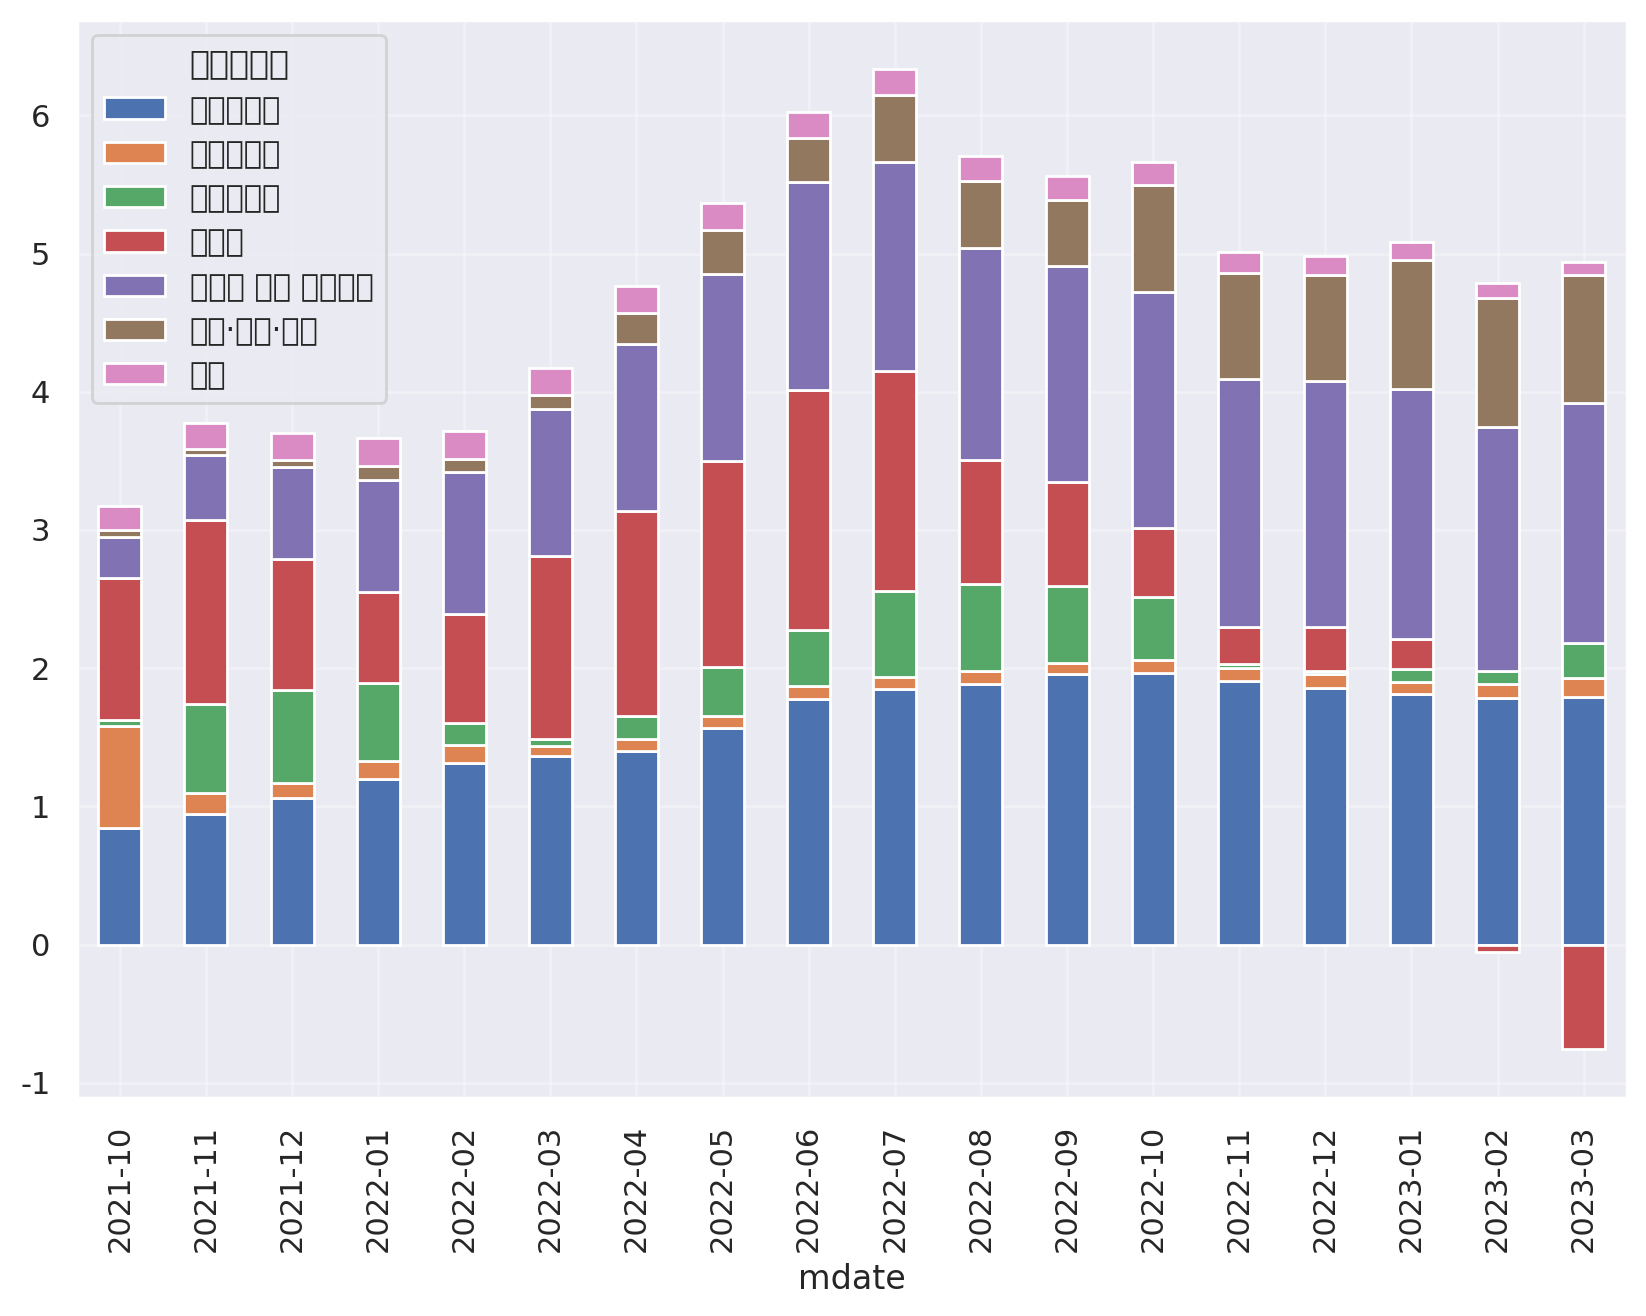

In [45]:
df_contribution.drop(columns = ['합계(CPI)']).plot.bar(stacked=True, figsize=(10,7))
df_contribution.tail(3)

In [46]:
print("전월 대비 품목별 기여도 변화")
df_contribution.iloc[-1,:] - df_contribution.iloc[-2,:]

전월 대비 품목별 기여도 변화


품목성질별
개인서비스          0.01
공공서비스          0.03
농축수산물          0.16
석유류           -0.70
석유류 제외 공업제품   -0.03
전기·수도·가스      -0.01
집세            -0.02
합계(CPI)       -0.56
dtype: float64

In [47]:
df_contribution.head()

품목성질별    개인서비스  공공서비스  농축수산물  석유류  석유류 제외 공업제품  전기·수도·가스   집세  합계(CPI)
mdate                                                                 
2021-10   0.84   0.73   0.05 1.03         0.30      0.05 0.17     3.17
2021-11   0.94   0.15   0.65 1.33         0.47      0.05 0.19     3.78
2021-12   1.06   0.11   0.67 0.95         0.67      0.05 0.20     3.71
2022-01   1.20   0.13   0.57 0.66         0.81      0.10 0.20     3.66
2022-02   1.32   0.13   0.16 0.79         1.02      0.10 0.20     3.72

In [48]:
'''
df_contribution_eng = df_contribution.copy()
df_contribution_eng.columns = ['personal service', 'public service', 'agricultural, livestock & fishery products',
                           'petroleum products', 'industrial products excluding petroleum',
                               'electricity, water & gas','rent','합계(CPI)']

df_contribution_eng.drop(columns = ['합계(CPI)']).plot.bar(stacked=True, figsize=(10,7))
'''

"\ndf_contribution_eng = df_contribution.copy()\ndf_contribution_eng.columns = ['personal service', 'public service', 'agricultural, livestock & fishery products',\n                           'petroleum products', 'industrial products excluding petroleum',\n                               'electricity, water & gas','rent','합계(CPI)']\n\ndf_contribution_eng.drop(columns = ['합계(CPI)']).plot.bar(stacked=True, figsize=(10,7))\n"

In [49]:
# 수요요인(근원) 비중

df_contribution_core = pd.DataFrame()

# use (','.join(date_start) to take out [ ] from date_start
for d in pd.date_range(date_start_demand, date_end_demand, freq='MS'):
    d = d.strftime("%Y-%m")
    contri = decomp_contribution([d], col_name_demand)
    df_contribution_core = pd.concat([df_contribution_core,contri],axis=0)
    df_contribution_core.asfreq('MS')

df_contribution_core['수요 비중'] = df_contribution_core[True]/df_contribution_core['합계(CPI)']*100

In [50]:
df_contribution_core

근원       False  True  합계(CPI)  수요 비중
mdate                               
2021-10   1.36  1.81     3.17  57.06
2021-11   2.30  1.48     3.78  39.11
2021-12   1.97  1.74     3.71  46.94
2022-01   1.64  2.02     3.66  55.20
2022-02   1.47  2.25     3.72  60.44
2022-03   1.95  2.22     4.17  53.23
2022-04   2.42  2.34     4.76  49.19
2022-05   2.74  2.63     5.36  48.97
2022-06   3.06  2.97     6.03  49.22
2022-07   3.32  3.02     6.34  47.60
2022-08   2.65  3.06     5.71  53.59
2022-09   2.47  3.09     5.56  55.56
2022-10   2.45  3.21     5.66  56.68
2022-11   1.79  3.22     5.01  64.36
2022-12   1.89  3.09     4.98  62.01
2023-01   2.04  3.05     5.08  59.95
2023-02   1.78  2.96     4.74  62.41
2023-03   1.16  3.03     4.18  72.34

### 품목별 상승률

In [51]:
# assign colors on categories
col_dict = {
    '개인서비스':'gold',
    '공공서비스':'midnightblue',
    '농축수산물':'green',
    '석유류':'red',
    '석유류 제외 공업제품':'grey',
    '전기·수도·가스':'blue',
    '집세':'plum'
    }

In [52]:
def generate_infl_sorted(date_choice):
    '''
    - generate DataFrame with sorted inflation rates, weights, and (inflation * weights)
    - it needs raw_growth_yoy DataFrame

    input:
        date_choice = year-month of interest

    output:
        df_output: DataFrame with inflation rates, categories with colors, weights, (inflation * weights)
    '''
    df_growth = raw_growth_yoy.loc[date_choice]
    df_growth = df_growth.T
    df_growth.columns = ['증가율']

    df_growth = df_growth.join(df.loc[:,['품목성질별','가중치']])
    df_growth['기여도']=df_growth['증가율']*df_growth['가중치']

    df_growth['col'] = df_growth['품목성질별']
    df_growth['col'] = df_growth['col'].map(col_dict)

    df_growth = df_growth.sort_values(by=['증가율'],ascending=True)
    df_growth['가중치'] = df_growth['가중치']*0.1
    df_growth['누적가중치'] = df_growth['가중치'].cumsum()

    df_growth['누적가중치'] = df_growth['누적가중치'].shift()
    df_growth.iloc[0,-1] = 0

    return df_growth

In [53]:
def generate_infl_sorted_figure(df_growth):
    '''
    - provide a figure of DataFrame from generate_infl_sorted

    input:
        df_growth: DataFrame from generate_infl_sorted

    output:
        figure
    '''
    #plt.autoscale(enable=True, axis='x', tight=False)
    plt.figure(figsize=(15,5))
    plt.bar(df_growth['누적가중치'].values,
        df_growth['증가율'].values.reshape(len(df_growth)),
        width = df_growth['가중치'].values,
        color=df_growth['col'],
        align='edge')

    labels = list(col_dict.keys())
    handles = [plt.Rectangle((0,0),1,1, color=col_dict[label]) for label in labels]
    plt.legend(handles, labels, fontsize = 'small')
    plt.show()

<div class="alert alert-block alert-info">
관심있는 달 입력 필요
</div>

In [54]:
date_choice = date_choice

df_current = generate_infl_sorted([date_choice[-1]])
df_previous1 = generate_infl_sorted([date_choice[-2]])
df_previous2 = generate_infl_sorted([date_choice[-3]])

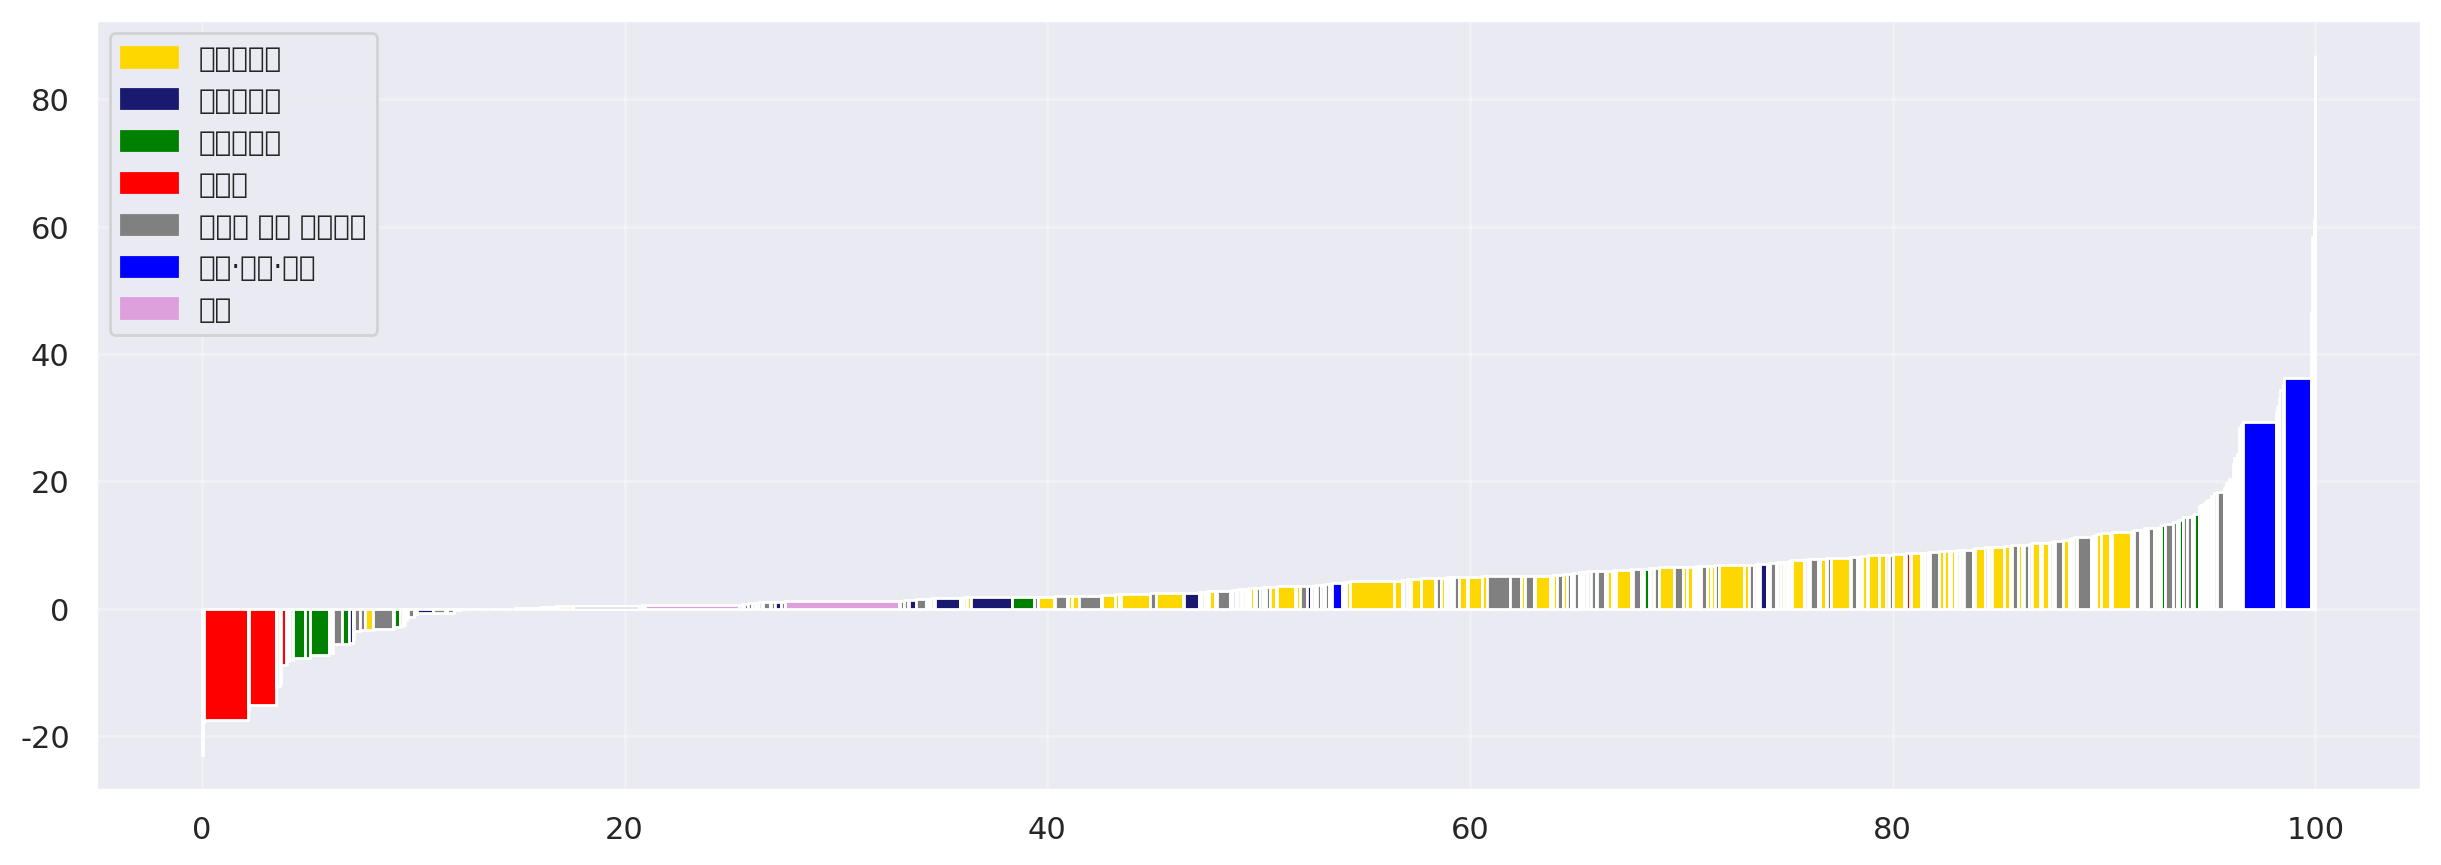

In [55]:
generate_infl_sorted_figure(df_current)

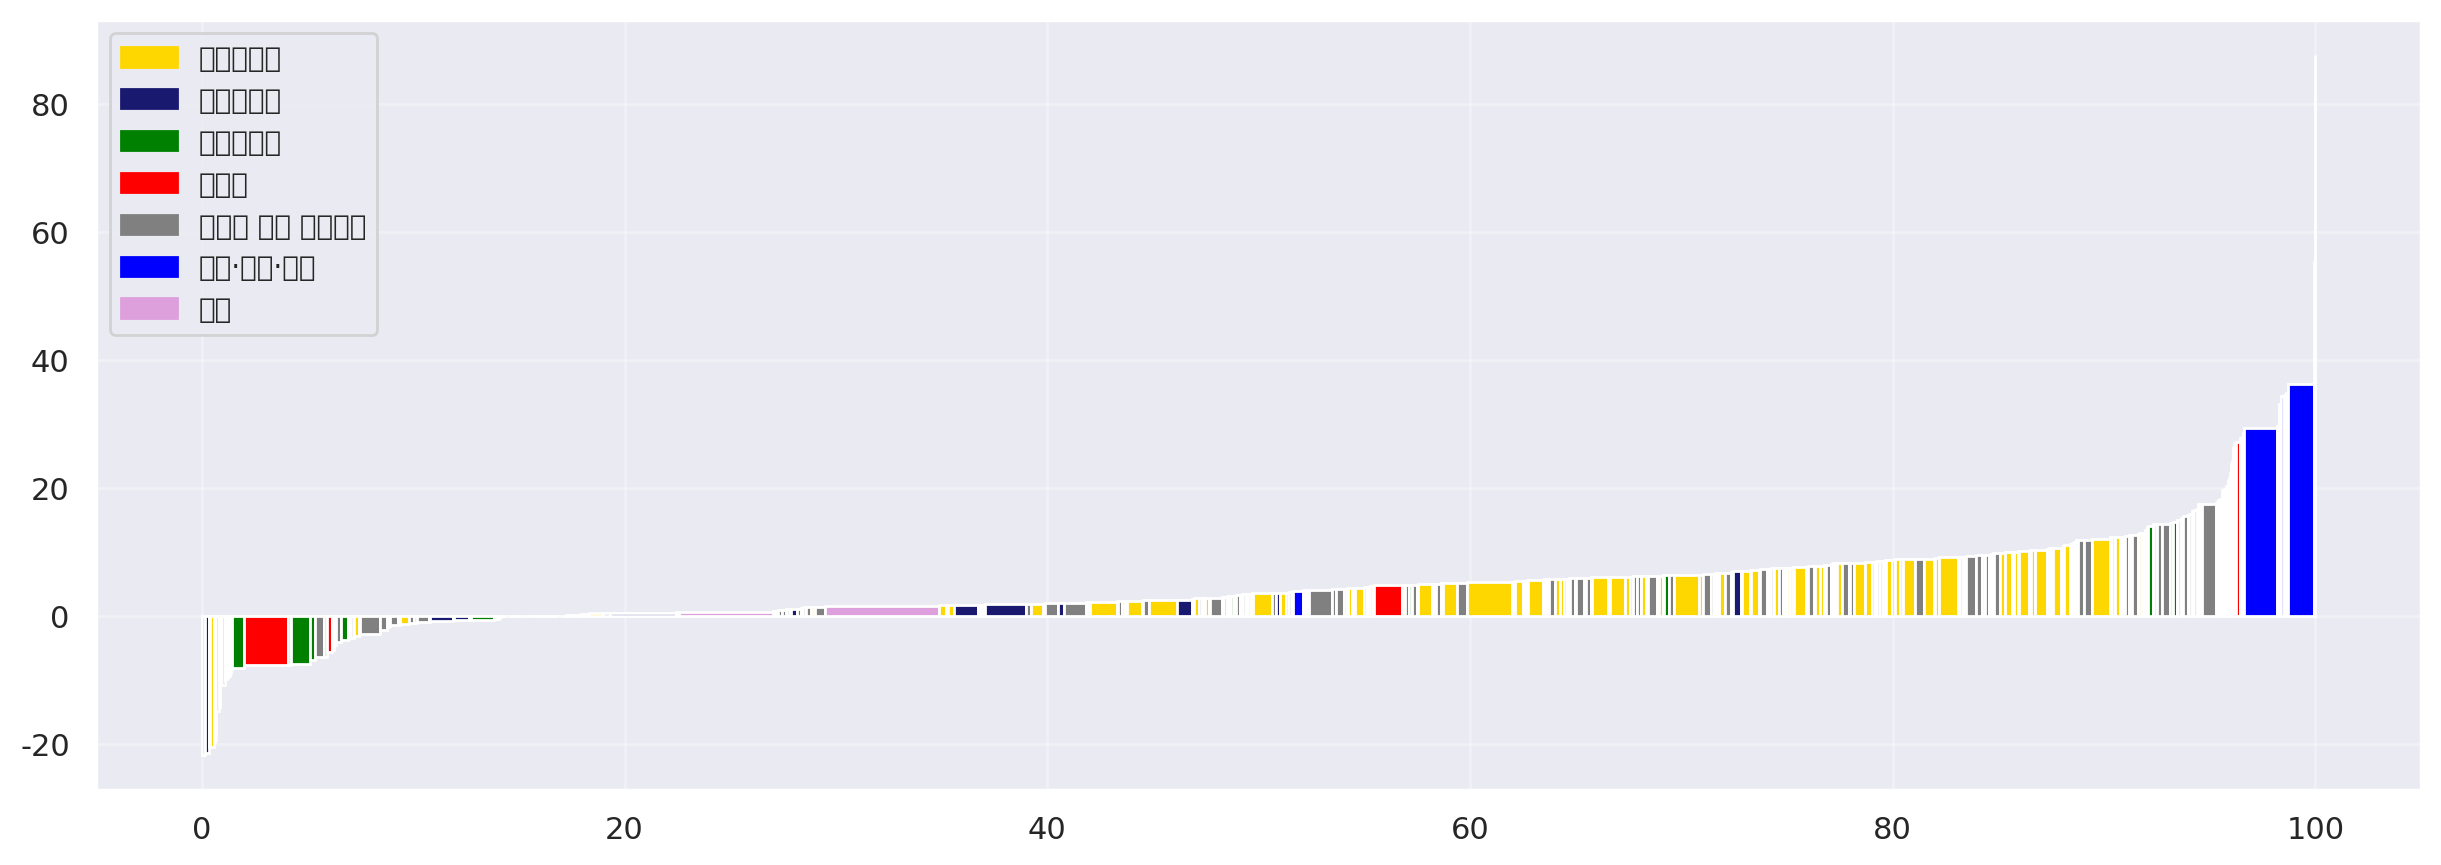

In [56]:
generate_infl_sorted_figure(df_previous1)

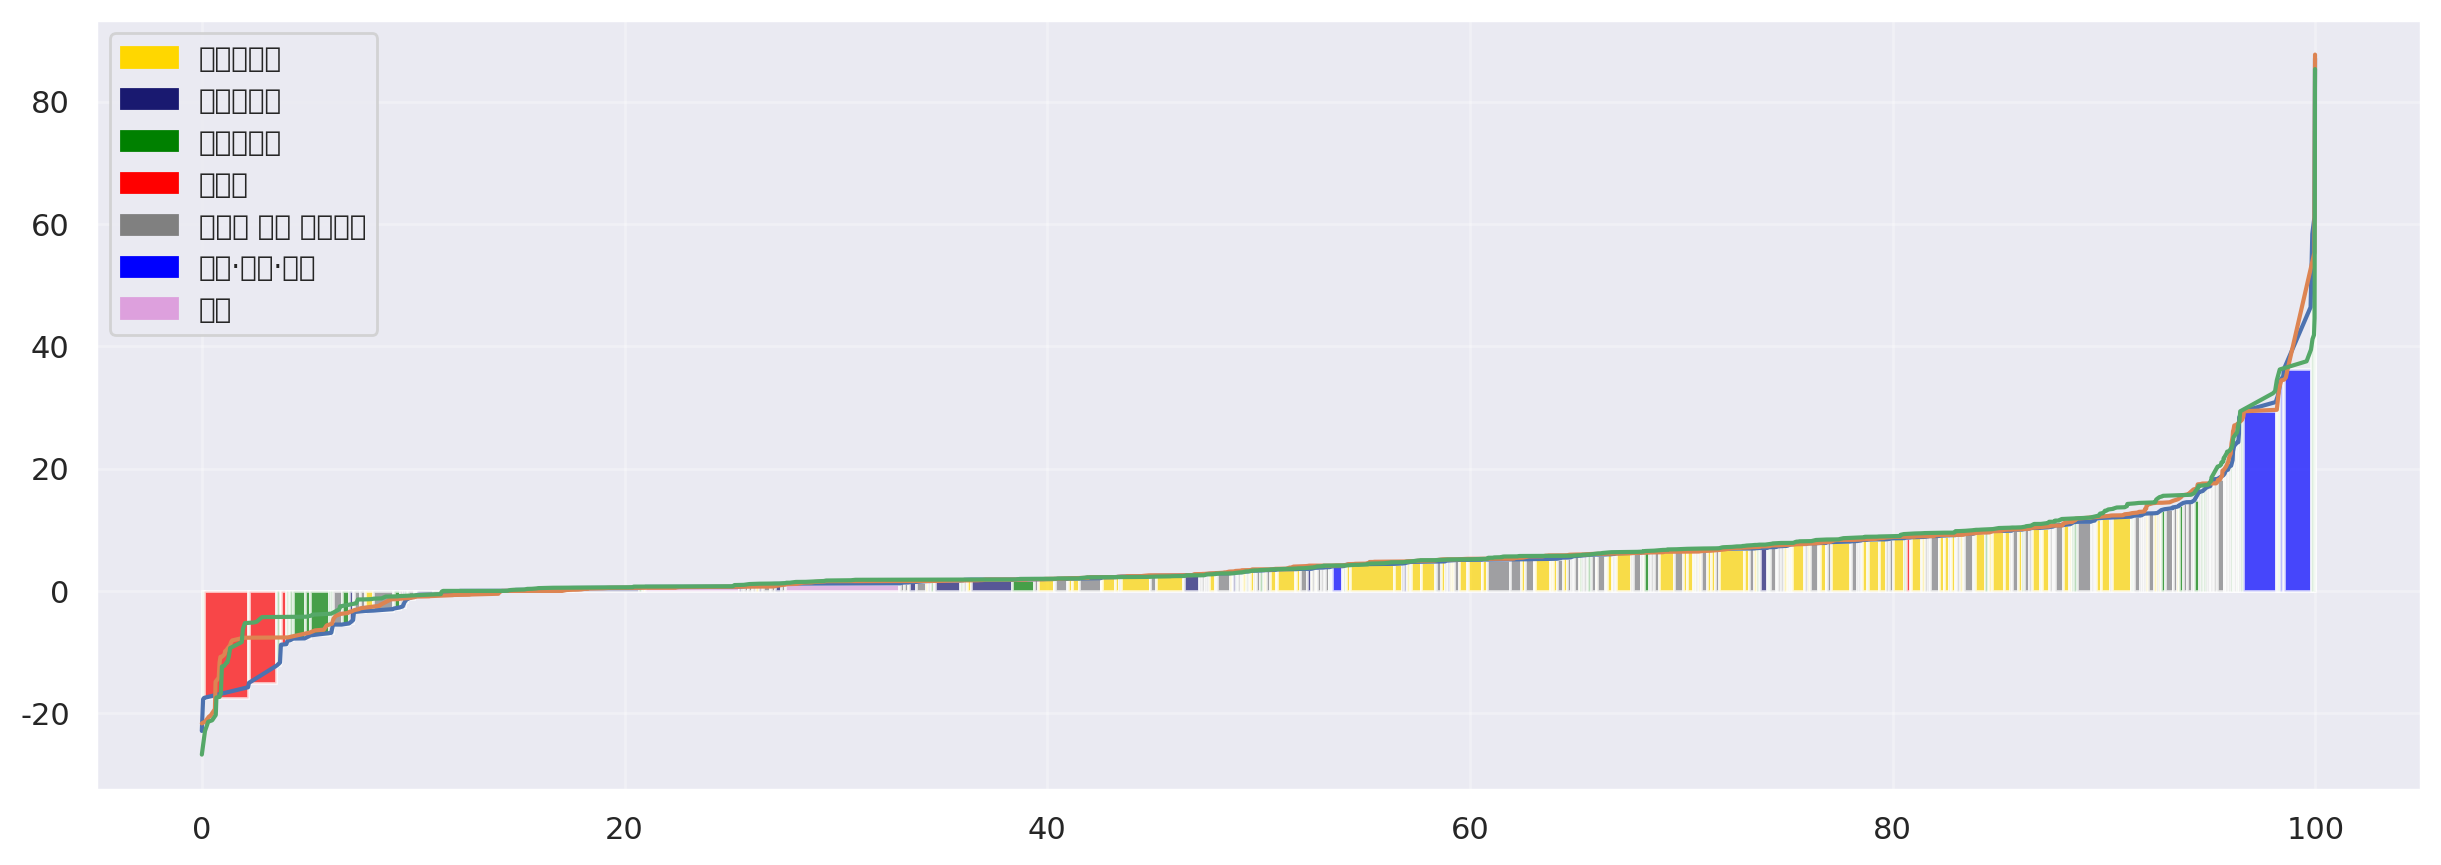

In [57]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(df_current['누적가중치'].values,
        df_current['증가율'].values.reshape(len(df_current)),
        width = df_current['가중치'].values,
        color=df_current['col'],
        align='edge',
        alpha=0.7)

labels = list(col_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=col_dict[label]) for label in labels]
ax.legend(handles, labels, fontsize = 'small')

ax.plot(df_current['누적가중치'], df_current['증가율'], label=date_choice[-1])
ax.plot(df_previous1['누적가중치'], df_previous1['증가율'], label=date_choice[-2])
ax.plot(df_previous2['누적가중치'], df_previous2['증가율'], label=date_choice[0])

plt.show()

In [58]:
print('********** 기여도가 높은 품목들 **********')
generate_infl_sorted(['2023-03']).nlargest(20, '기여도').sort_values(by=['기여도'],ascending=False)

********** 기여도가 높은 품목들 **********


증가율        품목성질별  가중치    기여도    col  누적가중치
품목명                                                  
도시가스     36.20     전기·수도·가스 1.27 459.72   blue  98.50
전기료      29.36     전기·수도·가스 1.55 455.10   blue  96.57
보험서비스료   12.01        개인서비스 0.86 103.32   gold  90.39
공동주택관리비   4.35        개인서비스 2.10  91.41   gold  54.30
구내식당식사비   6.89        개인서비스 1.19  81.98   gold  71.78
빵        11.29  석유류 제외 공업제품 0.65  73.39   grey  88.71
생선회(외식)   7.98        개인서비스 0.91  72.64   gold  77.08
전세        1.18           집세 5.40  63.88   plum  27.58
양파       58.35        농축수산물 0.10  58.35  green  99.85
휴대전화기     5.12  석유류 제외 공업제품 1.10  56.37   grey  60.81
침구       18.30  석유류 제외 공업제품 0.29  53.06   grey  95.36
맥주(외식)    9.79        개인서비스 0.54  52.84   gold  84.72
기능성화장품   13.36  석유류 제외 공업제품 0.38  50.75   grey  92.86
피자       11.92        개인서비스 0.41  48.89   gold  89.86
미용료       6.51        개인서비스 0.74  48.19   gold  68.93
지역난방비    34.41     전기·수도·가스 0.14  48.18   blue  98.34
삼겹살(외식)   8.59        개인서비스 0.55  47.26   gold  79.99
해장국       9.52        개인서비스 0.47  44.74   gold  83.91
돼지갈비(외식)  7.66        개인서비스 0.57  43.64   gold  75.25
자동차수리비    6.13        개인서비스 0.70  42.92   gold  66.90

In [59]:
generate_infl_sorted(['2023-03']).nlargest(20, '가중치').sort_values(by=['가중치'],ascending=False)

증가율        품목성질별  가중치     기여도           col  누적가중치
품목명                                                           
전세         1.18           집세 5.40   63.88          plum  27.58
월세         0.66           집세 4.43   29.23          plum  20.98
휴대전화료      0.47        공공서비스 3.12   14.79  midnightblue  17.57
공동주택관리비    4.35        개인서비스 2.10   91.41          gold  54.30
휘발유      -17.48          석유류 2.08 -363.65           red   0.11
외래진료비      1.84        공공서비스 1.92   35.38  midnightblue  36.39
전기료       29.36     전기·수도·가스 1.55  455.10          blue  96.57
고등학생학원비    2.34        개인서비스 1.35   31.59          gold  43.50
경유       -15.03          석유류 1.30 -195.33           red   2.23
중학생학원비     2.47        개인서비스 1.28   31.57          gold  45.15
도시가스      36.20     전기·수도·가스 1.27  459.72          blue  98.50
구내식당식사비    6.89        개인서비스 1.19   81.98          gold  71.78
입원진료비      1.70        공공서비스 1.17   19.87  midnightblue  34.71
휴대전화기      5.12  석유류 제외 공업제품 1.10   56.37          grey  60.81
사립대학교납입금   0.16        공공서비스 1.08    1.74  midnightblue  14.86
돼지고기       1.85        농축수산물 1.06   19.57         green  38.31
담배         0.00  석유류 제외 공업제품 1.02    0.00          grey  12.49
다목적승용차     2.04  석유류 제외 공업제품 1.02   20.77          grey  41.50
수입승용차     -3.22  석유류 제외 공업제품 0.92  -29.65          grey   8.12
생선회(외식)    7.98        개인서비스 0.91   72.64          gold  77.08

In [60]:
print('********** 기여도가 높은 품목들 **********')
generate_infl_sorted(['2022-02']).nlargest(20, '기여도').sort_values(by=['기여도'],ascending=False)

********** 기여도가 높은 품목들 **********


증가율        품목성질별  가중치    기여도           col  누적가중치
품목명                                                        
휘발유     16.54          석유류 2.08 344.04           red  93.82
경유      21.01          석유류 1.30 273.14           red  96.90
전세       2.85           집세 5.40 153.67          plum  50.56
돼지고기    13.32        농축수산물 1.06 141.20         green  91.06
공동주택관리비  6.19        개인서비스 2.10 130.09          gold  74.56
보험서비스료  13.48        개인서비스 0.86 115.96          gold  92.14
수입쇠고기   26.31        농축수산물 0.35  92.09         green  99.12
생선회(외식)  8.70        개인서비스 0.91  79.14          gold  86.27
전기료      5.01     전기·수도·가스 1.55  77.67          blue  66.58
등유      31.23          석유류 0.21  65.58           red  99.70
자동차용LPG 23.82          석유류 0.25  59.54           red  98.75
빵        8.94  석유류 제외 공업제품 0.65  58.09          grey  87.25
쇠고기(외식)  8.16        개인서비스 0.66  53.88          gold  83.91
수입승용차    5.52  석유류 제외 공업제품 0.92  50.80          grey  70.23
국산쇠고기    5.65        농축수산물 0.88  49.70         green  71.80
치킨       7.10        개인서비스 0.70  49.68          gold  79.85
월세       1.11           집세 4.43  48.99          plum  25.74
외래진료비    2.32        공공서비스 1.92  44.50  midnightblue  45.71
구내식당식사비  3.66        개인서비스 1.19  43.60          gold  59.69
다목적승용차   4.25  석유류 제외 공업제품 1.02  43.30          grey  63.40

In [61]:
price_threshold = 10

print(f'*** 이번 달(t) 증가율이 {price_threshold}% 넘는 항목 비중')
print(len(df_current.loc[df_current['증가율']>price_threshold])/len(df_current))
print('\n')
print(f'*** (t-1)달 증가율이 {price_threshold}% 넘는 항목 비중')
print(len(df_previous1.loc[df_previous1['증가율']>price_threshold])/len(df_previous1))
print('\n')
print(f'*** (t-2) 달 증가율이 {price_threshold}% 넘는 항목 비중')
len(df_previous2.loc[df_previous2['증가율']>price_threshold])/len(df_previous2)

*** 이번 달(t) 증가율이 10% 넘는 항목 비중
0.2205240174672489


*** (t-1)달 증가율이 10% 넘는 항목 비중
0.2205240174672489


*** (t-2) 달 증가율이 10% 넘는 항목 비중


0.2314410480349345

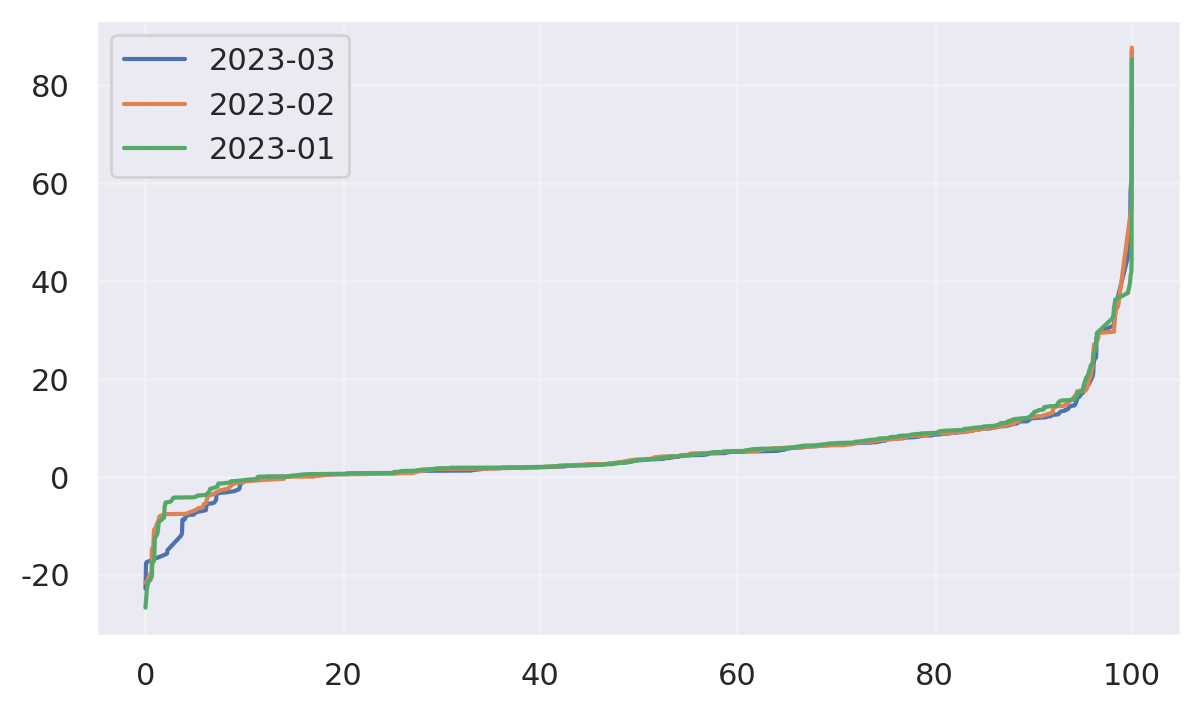

In [62]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(df_current['누적가중치'], df_current['증가율'], label=date_choice[-1])
ax.plot(df_previous1['누적가중치'], df_previous1['증가율'], label=date_choice[-2])
ax.plot(df_previous2['누적가중치'], df_previous2['증가율'], label=date_choice[0])

ax.legend()
plt.show()

#### 상승률이 (+)인 품목만 고려한 경우

In [63]:
ind_pos = (df_current['증가율']<=0).sum()

df_current = df_current.iloc[ind_pos:,:]
df_previous1 = df_previous1.iloc[ind_pos:,:]
df_previous2 = df_previous2.iloc[ind_pos:,:]

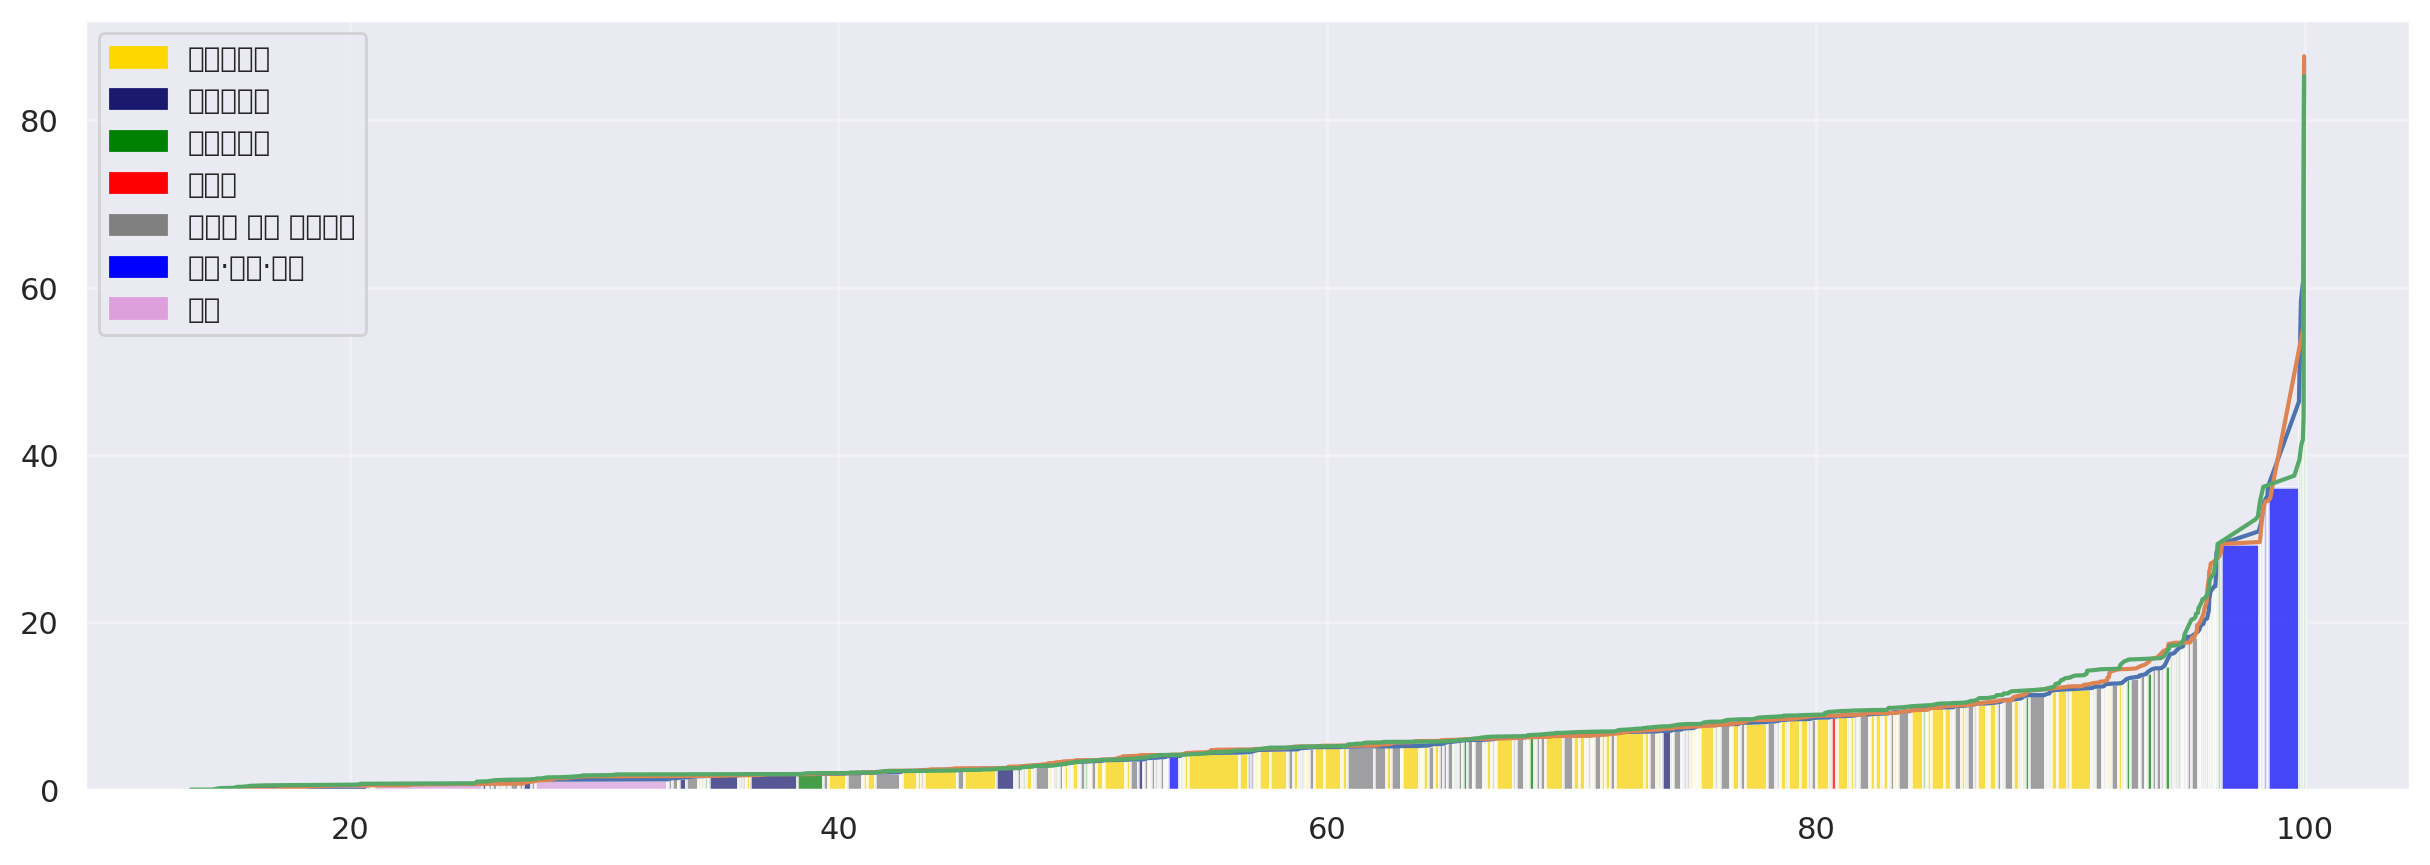

In [64]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(df_current['누적가중치'].values,
        df_current['증가율'].values.reshape(len(df_current)),
        width = df_current['가중치'].values,
        color=df_current['col'],
        align='edge',
        alpha=0.7)

labels = list(col_dict.keys())
handles = [plt.Rectangle((0,0),1,1, color=col_dict[label]) for label in labels]
ax.legend(handles, labels, fontsize = 'small')

ax.plot(df_current['누적가중치'], df_current['증가율'], label=date_choice[-1])
ax.plot(df_previous1['누적가중치'], df_previous1['증가율'], label=date_choice[-2])
ax.plot(df_previous2['누적가중치'], df_previous2['증가율'], label=date_choice[0])

plt.show()

### YoY, 1-month, 3-month, 6-month annualized

In [ ]:
def generate_months_annualized(item_name,lags):
    '''
    generate k-month inflation into annualized one
    need index_prices DataFrame
    item_name: "CPI", "근원", etc
    lags = 3, 6, 12, etc
    '''
    inf_months = index_prices.pct_change(lags)*(12/lags)*100

    return inf_months.loc[:,item_name]

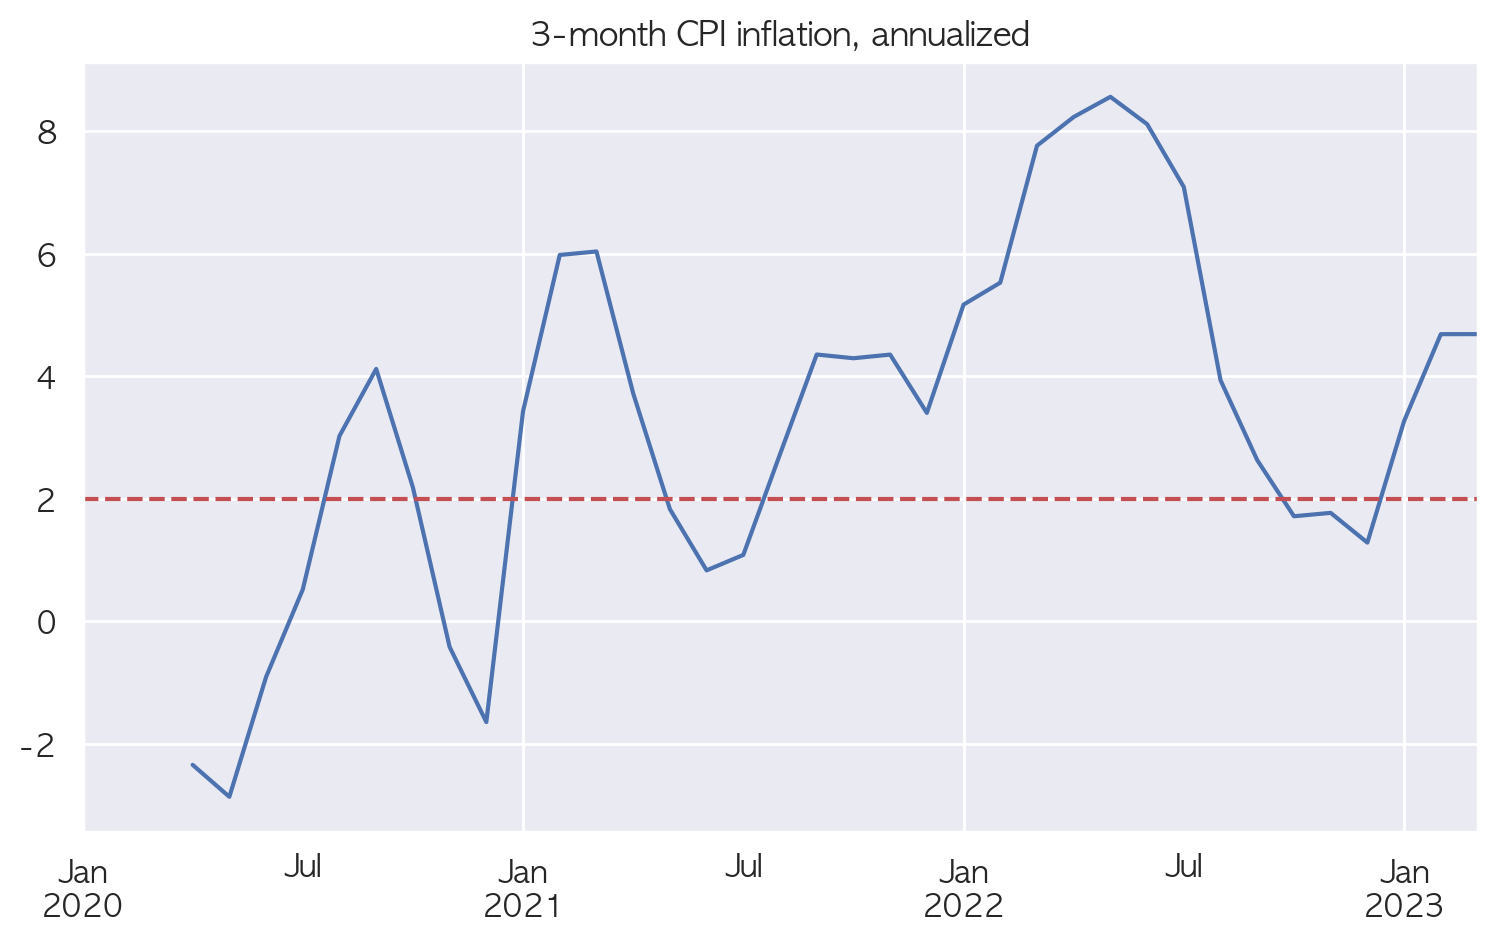

In [ ]:
item_name = "CPI"
lags = 3
generate_months_annualized(item_name,lags).plot()
plt.axhline(y=2, color='r', linestyle='--')
plt.title(f'{lags}-month {item_name} inflation, annualized')
plt.show()

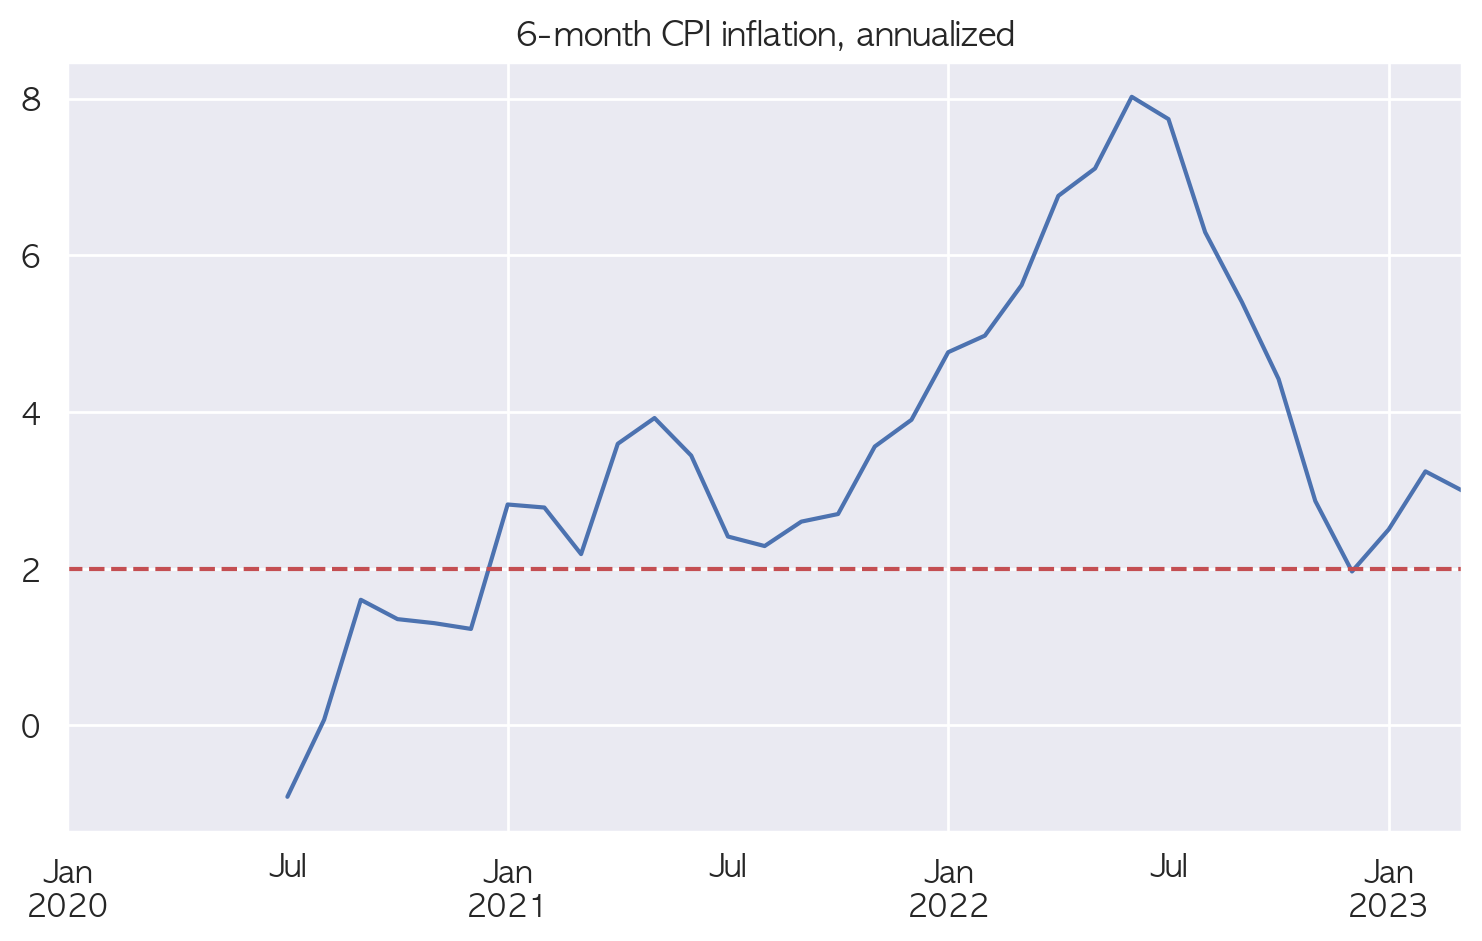

In [ ]:
item_name = "CPI"
lags = 6
generate_months_annualized(item_name,lags).plot()
plt.axhline(y=2, color='r', linestyle='--')
plt.title(f'{lags}-month {item_name} inflation, annualized')
plt.show()

More to come

### Instantaneous Inflation

- instantaneous inflation proposed by Jan Eeckhout (UPF Barcelona)
- https://www.janeeckhout.com/wp-content/uploads/Instantaneous_Inflation.pdf
- https://econbrowser.com/archives/2023/01/instantaneous-inflation

In [65]:
def generate_kappa(smooth_param):
    '''
    generate kernel density
    smooth_param: smoothing parameter, 0=1/N, 1=more weights on recent obs,...
    '''
    df_kernel = pd.DataFrame(list(range(11,-1,-1)), columns=['tau'])
    smooth_param = smooth_param
    T = 12
    df_kernel['numera'] = (T- df_kernel['tau'])**smooth_param
    df_kernel['denom'] = df_kernel['numera'].sum()
    df_kernel['kappa'] = T*df_kernel['numera']/df_kernel['denom']

    #return df_kernel
    return df_kernel[['kappa']]

In [66]:
generate_kappa(1)

kappa
0    0.15
1    0.31
2    0.46
3    0.62
4    0.77
5    0.92
6    1.08
7    1.23
8    1.38
9    1.54
10   1.69
11   1.85

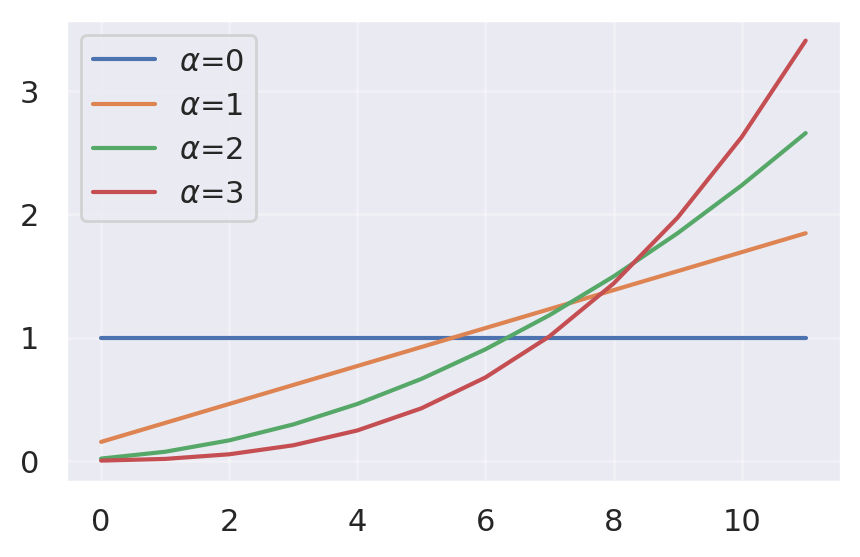

In [67]:
plt.figure(figsize=(5,3))

for i in range(0,4,1):
    plt.plot(generate_kappa(i),label=fr'$\alpha$={i}')
    plt.legend()

plt.show()

In [68]:
print(index_prices.columns)

Index(['CPI', '관리', '관리제외', '근원', '관리제외 근원', '근원(농산물 및 석유류 제외)', '생활'], dtype='object')


In [69]:
def generate_instantaneous_inflation(item_name, smooth_param):
    '''
    generate instantaneous inflation proposed by Jan Eeckhout (UPF Barcelona)
    item_name: CPI, 근원 etc
    smooth_param: smoothing parameter, 0=1/N, 1=more weights on recent obs,...
    '''

    df_insta = index_prices.loc[:,[item_name]]
    df_insta['inflation'] = df_insta[item_name].pct_change(12)*100
    df_insta['inflation_mom'] = df_insta[item_name].pct_change()
    df_insta['inflation_mom_annual'] = df_insta['inflation_mom']*12*100

    df_insta = df_insta.dropna(subset=['inflation_mom'])

    df_kappa = generate_kappa(smooth_param)
    df_insta['inflation_inst'] = 'NaN'

    T = 12

    for i in range(len(df_insta)-T+1):
        i_end = i+T
        df_insta12 = df_insta.iloc[i:i_end][['inflation_mom']]
        df_insta12 = df_insta12.reset_index(drop=True)
        df_insta12_merged = pd.concat([df_insta12,df_kappa], axis=1)
        df_insta12_merged['a'] = (1+df_insta12_merged['inflation_mom'])**df_insta12_merged['kappa']
        df_insta12_merged['b'] = df_insta12_merged['a'].cumprod()-1
        df_insta.iloc[i+11,-1] = df_insta12_merged.iloc[-1]['b']*100

    df_insta = df_insta.dropna()
    df_insta['inflation_inst'] = pd.to_numeric(df_insta['inflation_inst'])

    return df_insta

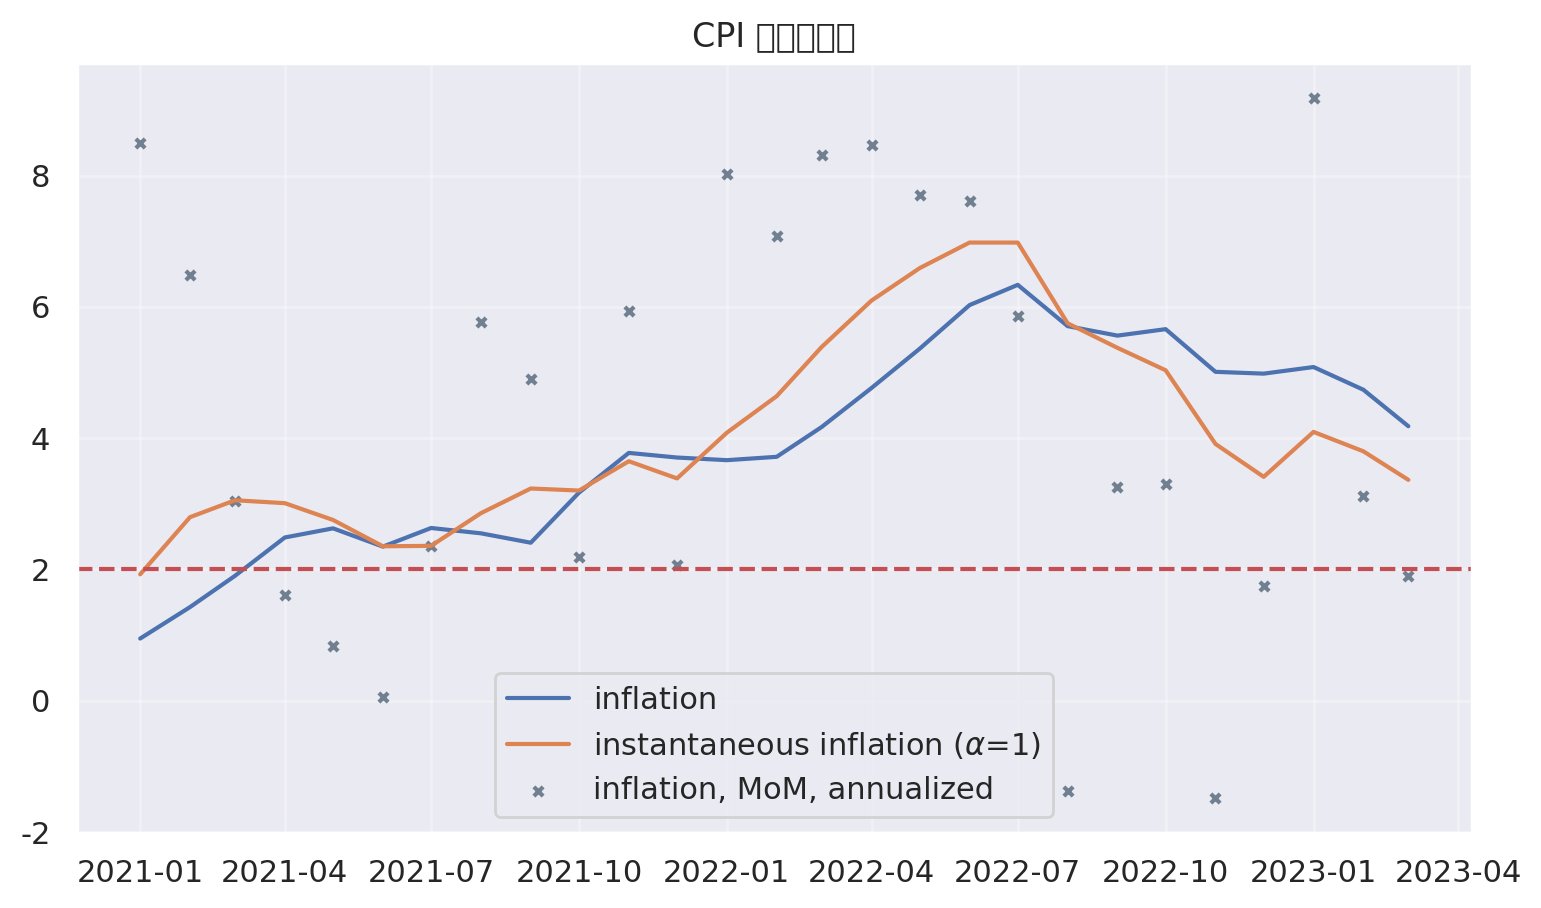

CPI  inflation  inflation_mom  inflation_mom_annual  \
2022-08-01 108.61       5.71          -0.00                 -1.37   
2022-09-01 108.90       5.56           0.00                  3.25   
2022-10-01 109.20       5.66           0.00                  3.30   
2022-11-01 109.07       5.01          -0.00                 -1.48   
2022-12-01 109.23       4.98           0.00                  1.75   
2023-01-01 110.07       5.08           0.01                  9.19   
2023-02-01 110.35       4.74           0.00                  3.12   
2023-03-01 110.53       4.18           0.00                  1.90   

            inflation_inst  
2022-08-01            5.75  
2022-09-01            5.38  
2022-10-01            5.03  
2022-11-01            3.91  
2022-12-01            3.41  
2023-01-01            4.10  
2023-02-01            3.80  
2023-03-01            3.36

In [70]:
df_CPI_1 = generate_instantaneous_inflation('CPI', 1)

plt.plot(df_CPI_1.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.scatter(df_CPI_1.index, df_CPI_1['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('CPI 인플레이션')

plt.show()

df_CPI_1.iloc[-8:]

NameError: name 'generate_months_annualized' is not defined

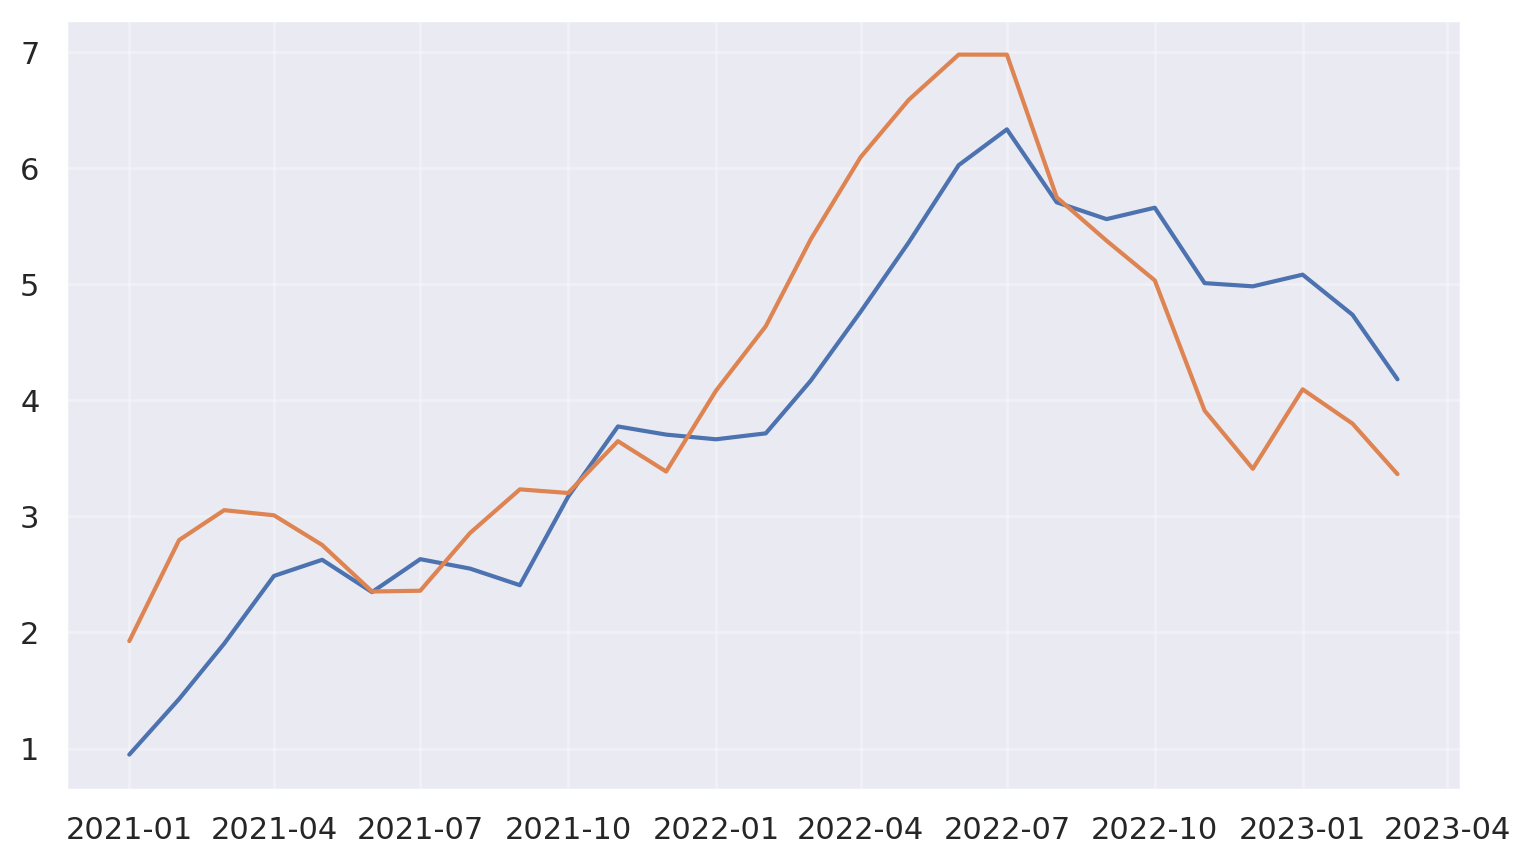

In [71]:
df_CPI_1 = generate_instantaneous_inflation('CPI', 1)

plt.plot(df_CPI_1.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.plot(generate_months_annualized('CPI',3).loc['2021-01':], label='3-months, annualized')
plt.plot(generate_months_annualized('CPI',6).loc['2021-01':], label='6-months, annualized')
plt.scatter(df_CPI_1.index, df_CPI_1['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('CPI 인플레이션')

plt.show()

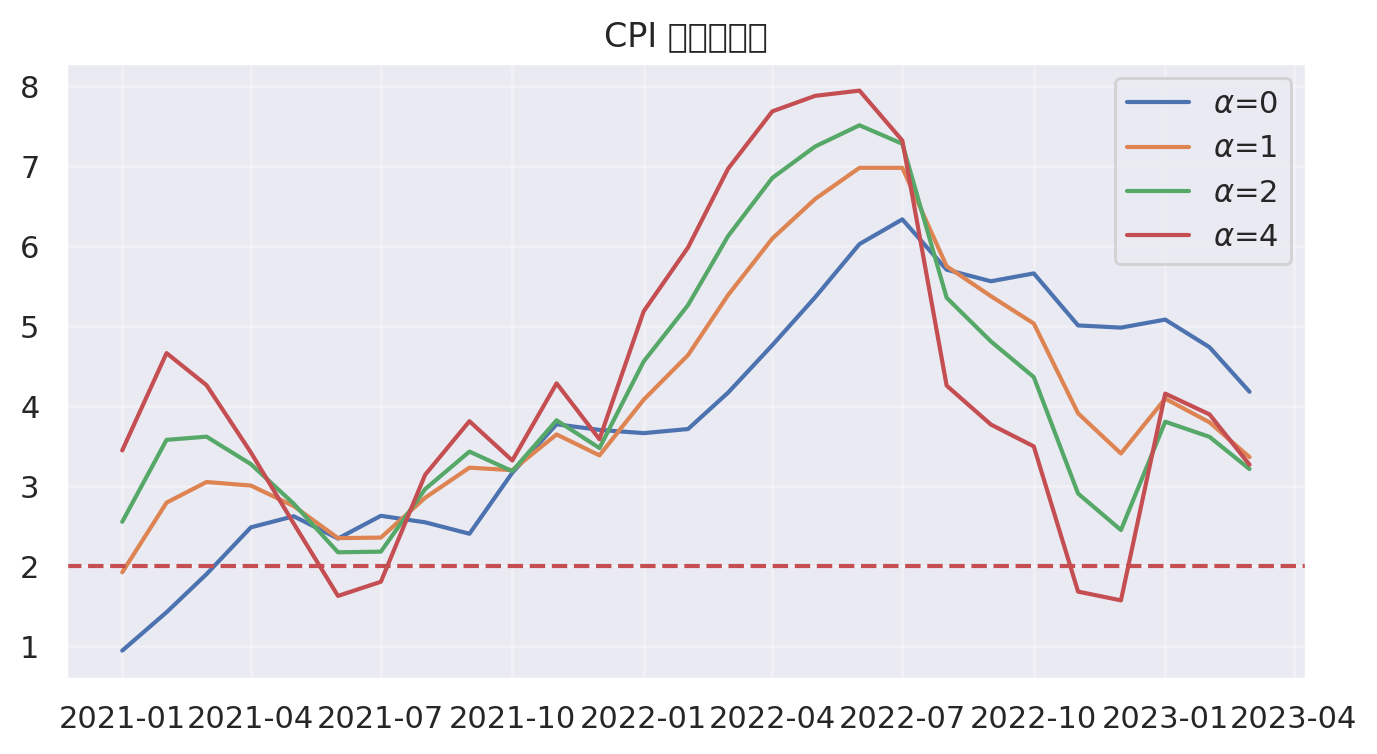

In [72]:
plt.figure(figsize=(8,4))

for i in [0,1,2,4]:
    plt.plot(generate_instantaneous_inflation('CPI', i)[['inflation_inst']], label=fr'$\alpha$={i}')

plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('CPI 인플레이션')

plt.show()

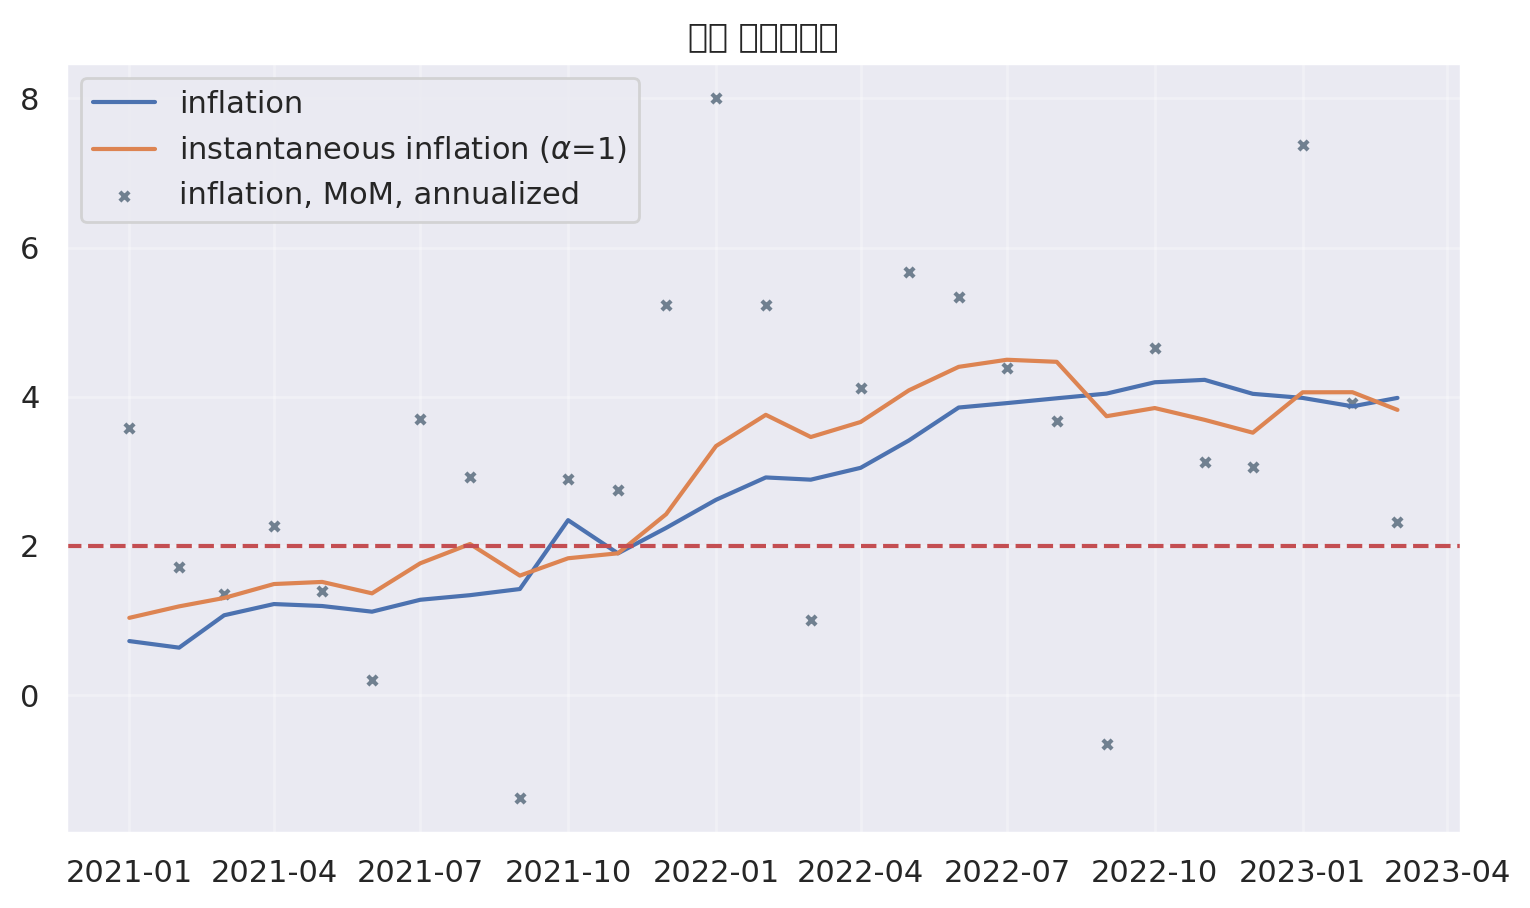

근원  inflation  inflation_mom  inflation_mom_annual  \
2022-08-01 105.75       3.98           0.00                  3.67   
2022-09-01 105.69       4.04          -0.00                 -0.65   
2022-10-01 106.10       4.19           0.00                  4.66   
2022-11-01 106.38       4.23           0.00                  3.12   
2022-12-01 106.65       4.04           0.00                  3.06   
2023-01-01 107.30       3.98           0.01                  7.37   
2023-02-01 107.65       3.87           0.00                  3.92   
2023-03-01 107.86       3.98           0.00                  2.32   

            inflation_inst  
2022-08-01            4.47  
2022-09-01            3.74  
2022-10-01            3.85  
2022-11-01            3.69  
2022-12-01            3.52  
2023-01-01            4.06  
2023-02-01            4.06  
2023-03-01            3.82

In [73]:
df_core_1 = generate_instantaneous_inflation('근원', 1)

plt.plot(df_core_1.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.scatter(df_core_1.index, df_core_1['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('근원 인플레이션')

plt.show()

df_core_1.iloc[-8:]

NameError: name 'generate_months_annualized' is not defined

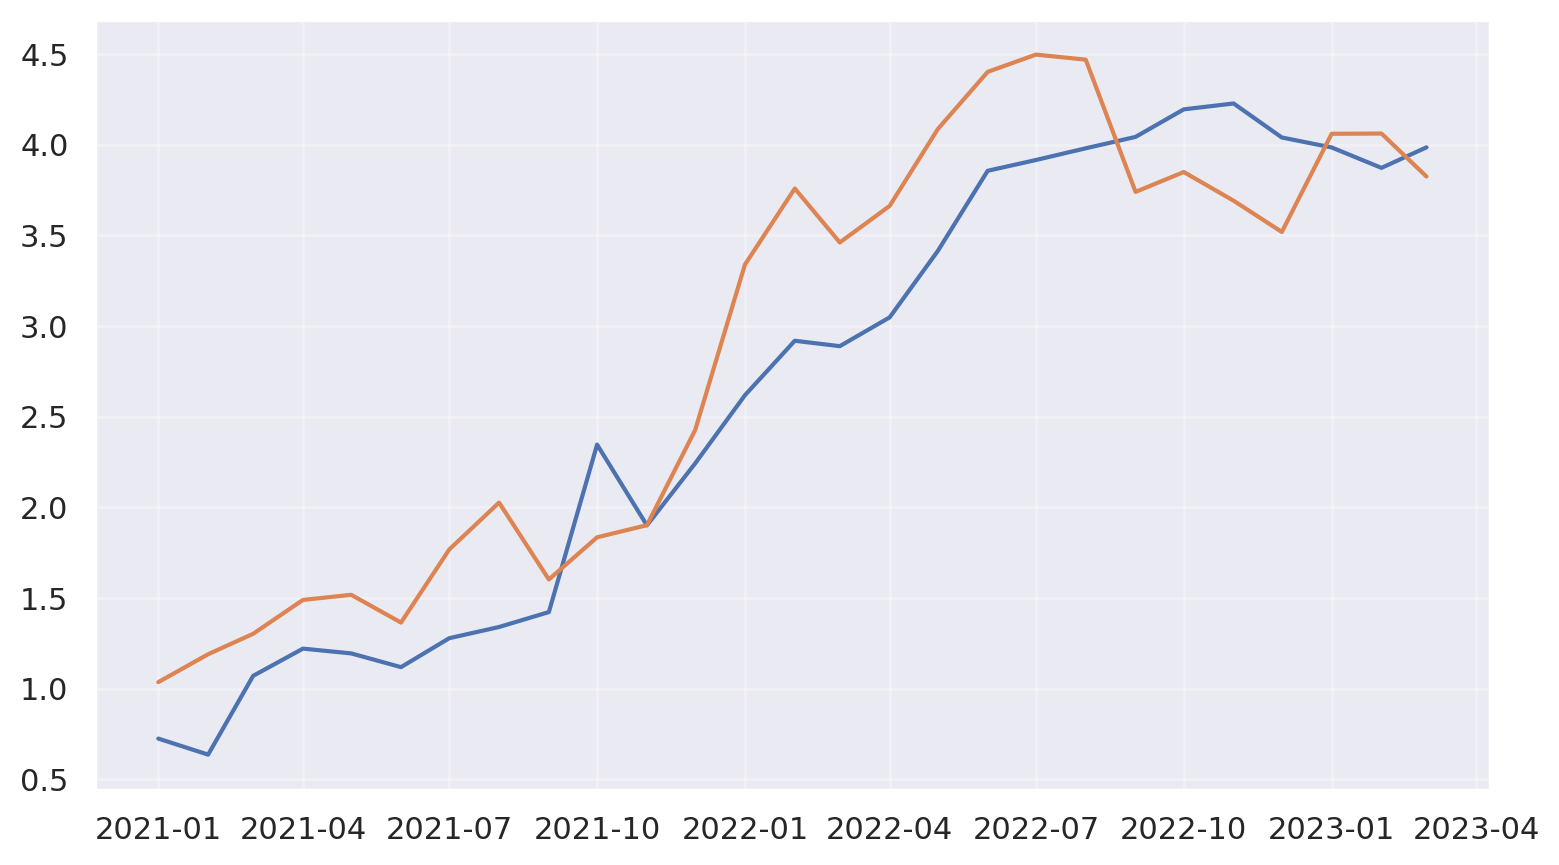

In [74]:
df_core_1 = generate_instantaneous_inflation('근원', 1)

plt.plot(df_core_1.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.plot(generate_months_annualized('근원',3).loc['2021-01':], label='3-months, annualized')
plt.plot(generate_months_annualized('근원',6).loc['2021-01':], label='6-months, annualized')
plt.scatter(df_core_1.index, df_core_1['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('근원 인플레이션')

plt.show()

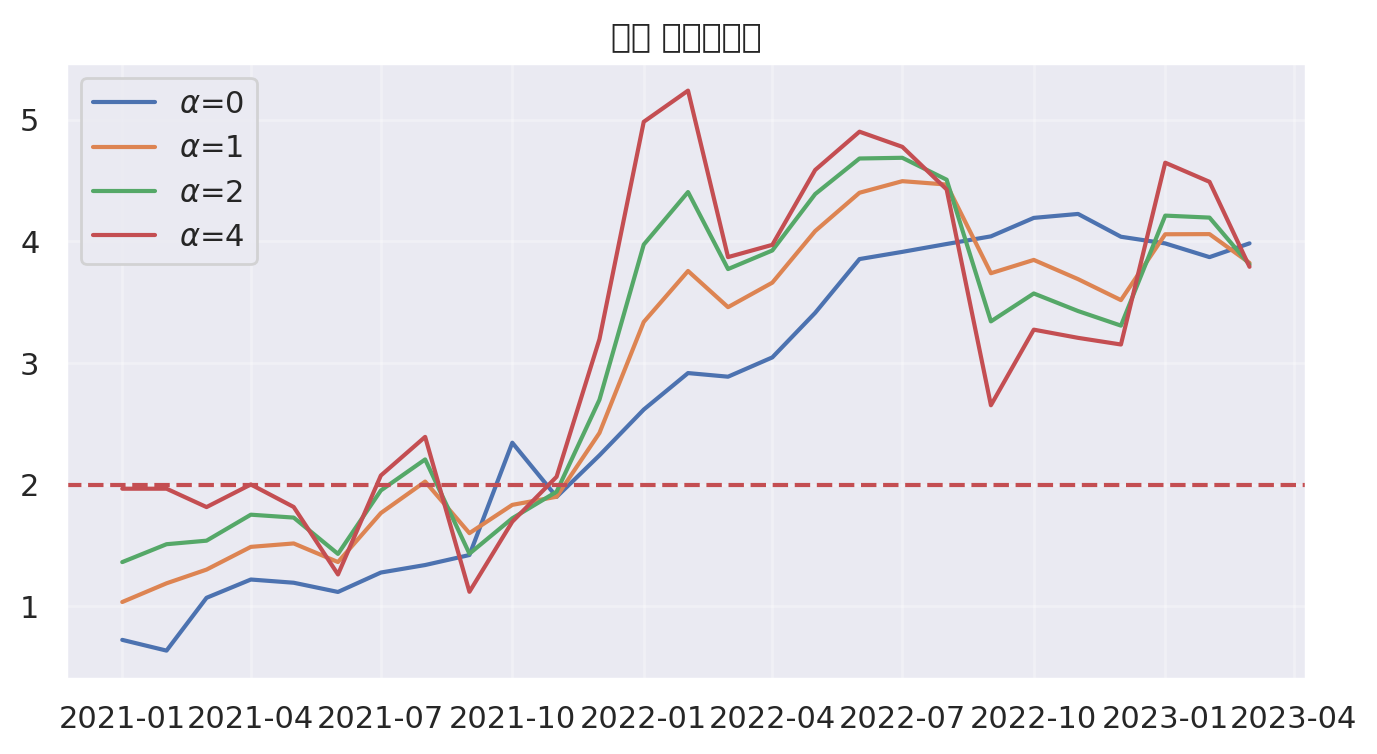

In [75]:
plt.figure(figsize=(8,4))

for i in [0,1,2,4]:
    plt.plot(generate_instantaneous_inflation('근원', i)[['inflation_inst']], label=fr'$\alpha$={i}')

plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('근원 인플레이션')

plt.show()

#### 계절조정 시계열

- 나중에 코드 처음 부분에서 실행하게 할 것

In [76]:
df_sa = pd.read_excel(path_data +'CPI+core_SA_2303.xlsx', header=0)

df_sa = df_sa.iloc[:,-4:]
df_sa.columns = ['관리제외 근원_SA','관리제외 경직적_SA','CPI_SA','근원_SA']
df_sa = df_sa.set_index(pd.date_range('2000-01','2023-03',freq='MS'))
df_sa.tail(3)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/CPI+core_SA_2303.xlsx'

In [77]:
df_sa1 = pd.read_excel(filepath+'data/상품서비스물가_SA.xlsx', header=1)
df_sa1 = df_sa1.iloc[:,1:]
df_sa1 = df_sa1.set_index(pd.date_range('2000-01','2023-01',freq='MS'))
df_sa1.tail(3)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/datadata/상품서비스물가_SA.xlsx'

In [ ]:
index_prices = pd.concat([index_prices, df_sa, df_sa1],axis=1).dropna()
index_prices.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

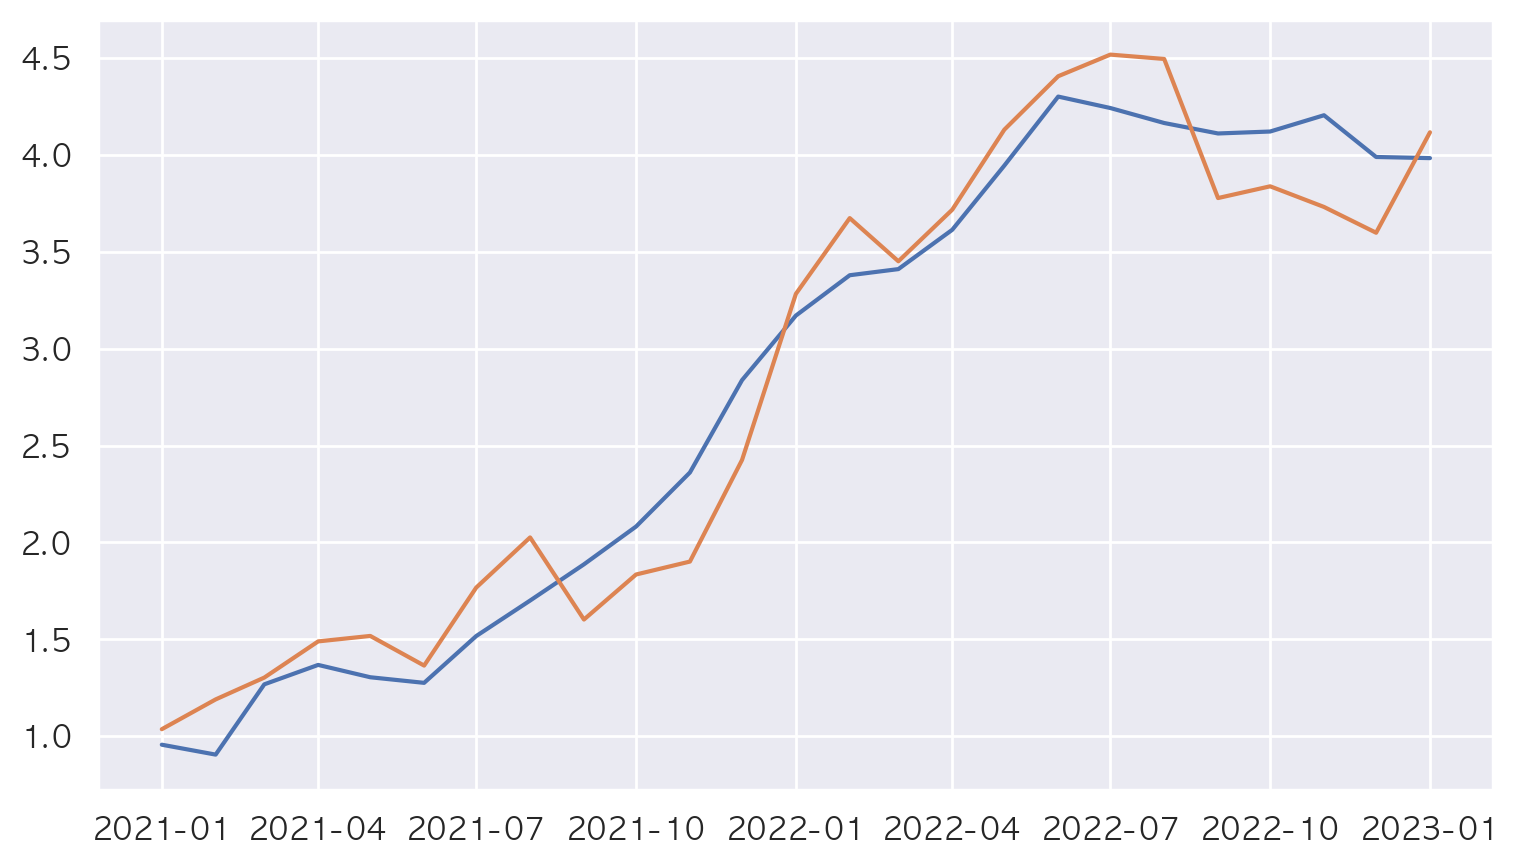

In [ ]:
df_core_1_SA = generate_instantaneous_inflation('근원_SA', 1)
df_core_1 = generate_instantaneous_inflation('근원', 1)

plt.plot(df_core_1_SA['inflation_inst'])
plt.plot(df_core_1['inflation_inst'])

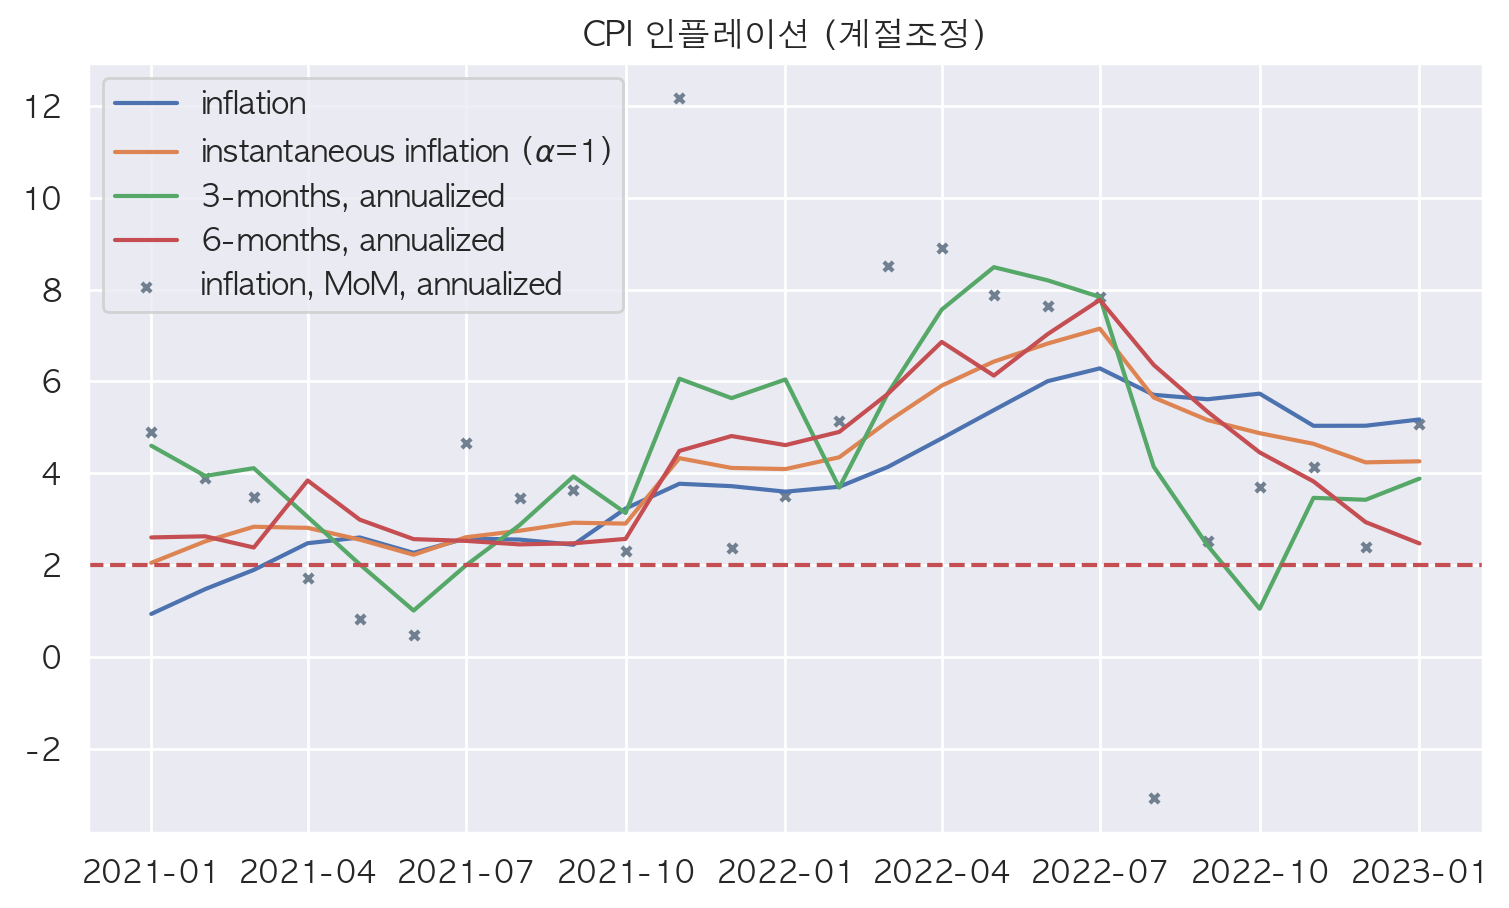

In [ ]:
df_CPI_1_SA = generate_instantaneous_inflation('CPI_SA', 1)

plt.plot(df_CPI_1_SA.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.plot(generate_months_annualized('CPI_SA',3).loc['2021-01':], label='3-months, annualized')
plt.plot(generate_months_annualized('CPI_SA',6).loc['2021-01':], label='6-months, annualized')
plt.scatter(df_CPI_1_SA.index, df_CPI_1_SA['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('CPI 인플레이션 (계절조정)')

plt.show()

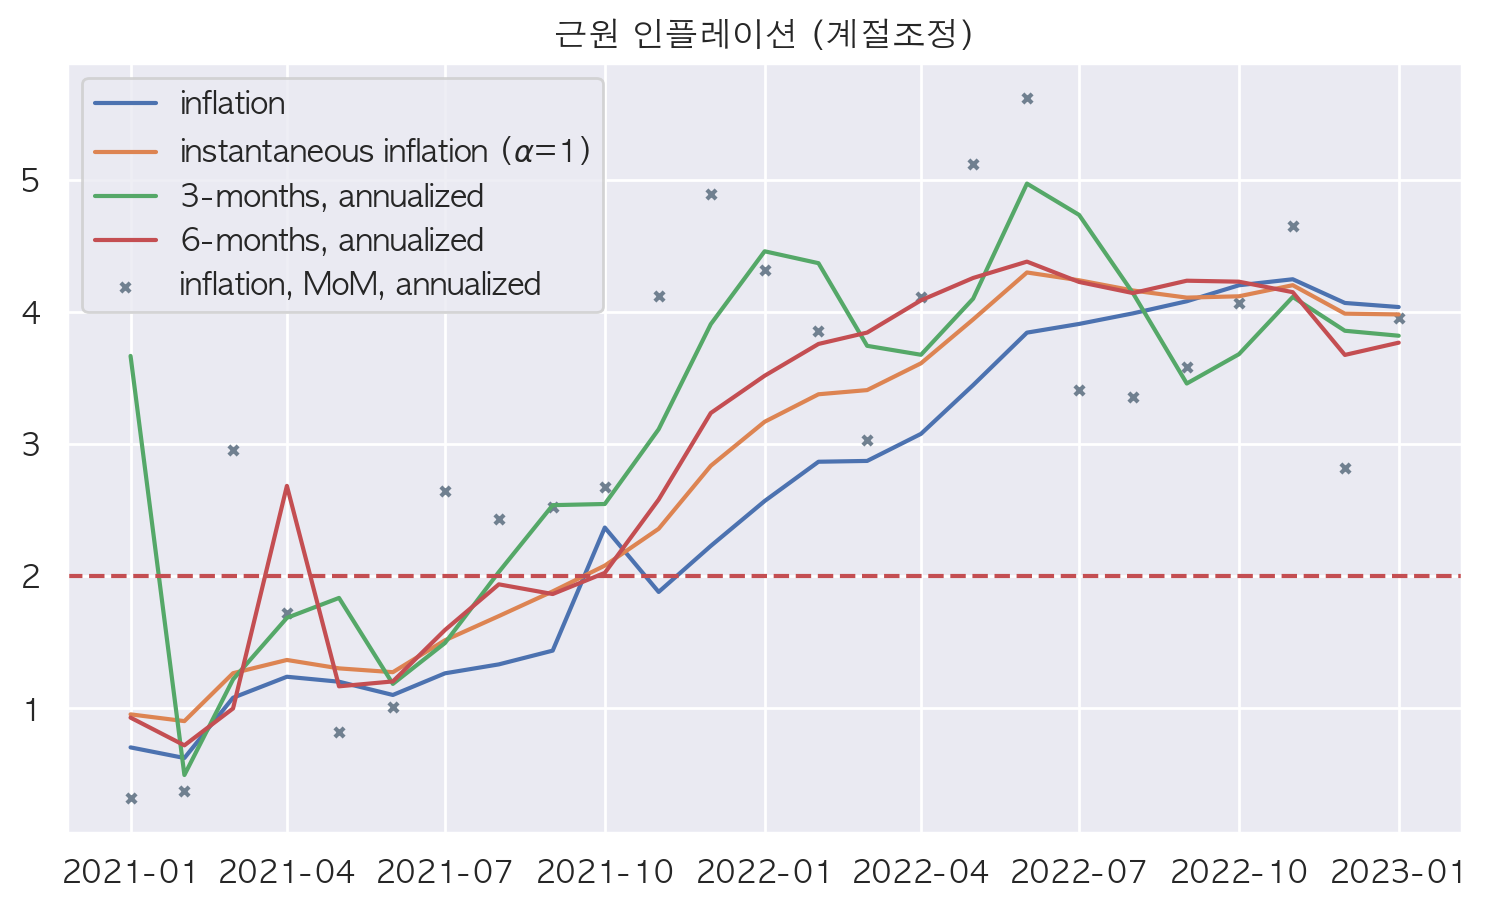

In [ ]:
df_core_1_SA = generate_instantaneous_inflation('근원_SA', 1)

plt.plot(df_core_1_SA.loc[:,['inflation','inflation_inst']], label=['inflation',r'instantaneous inflation ($\alpha$=1)'])
plt.plot(generate_months_annualized('근원_SA',3).loc['2021-01':], label='3-months, annualized')
plt.plot(generate_months_annualized('근원_SA',6).loc['2021-01':], label='6-months, annualized')
plt.scatter(df_core_1_SA.index, df_core_1_SA['inflation_mom_annual'],
            label='inflation, MoM, annualized', marker='x', color='slategray', s=11)
plt.axhline(y=2, color='r', linestyle='--')
plt.legend()
plt.title('근원 인플레이션 (계절조정)')

plt.show()

In [ ]:
index_prices.columns

Index(['CPI', '관리', '관리제외', '근원', '관리제외 근원', '근원(농산물 및 석유류 제외)', '생활',
       '관리제외 근원_SA', '관리제외 경직적_SA', 'CPI_SA', '근원_SA', '상품', '서비스', '상품SA',
       '서비스SA', '근원상품', '근원서비스', '근원상품SA', '근원서비스SA'],
      dtype='object')

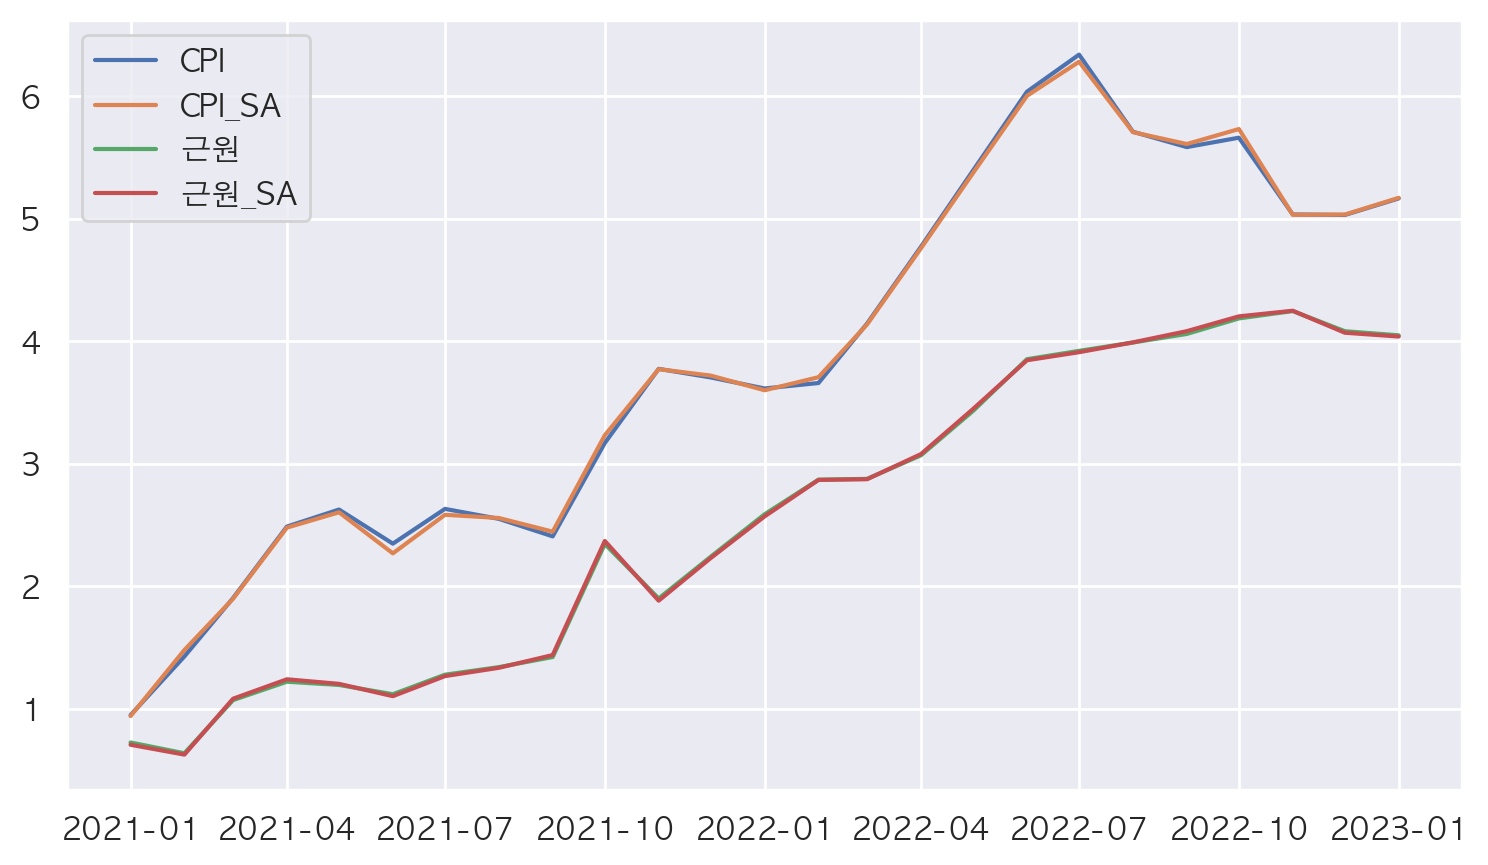

In [ ]:
list_name = ['CPI','CPI_SA','근원','근원_SA']
dfx = index_prices.loc[:,list_name].pct_change(12)*100
plt.plot(dfx, label=list_name)
plt.legend()
plt.show()

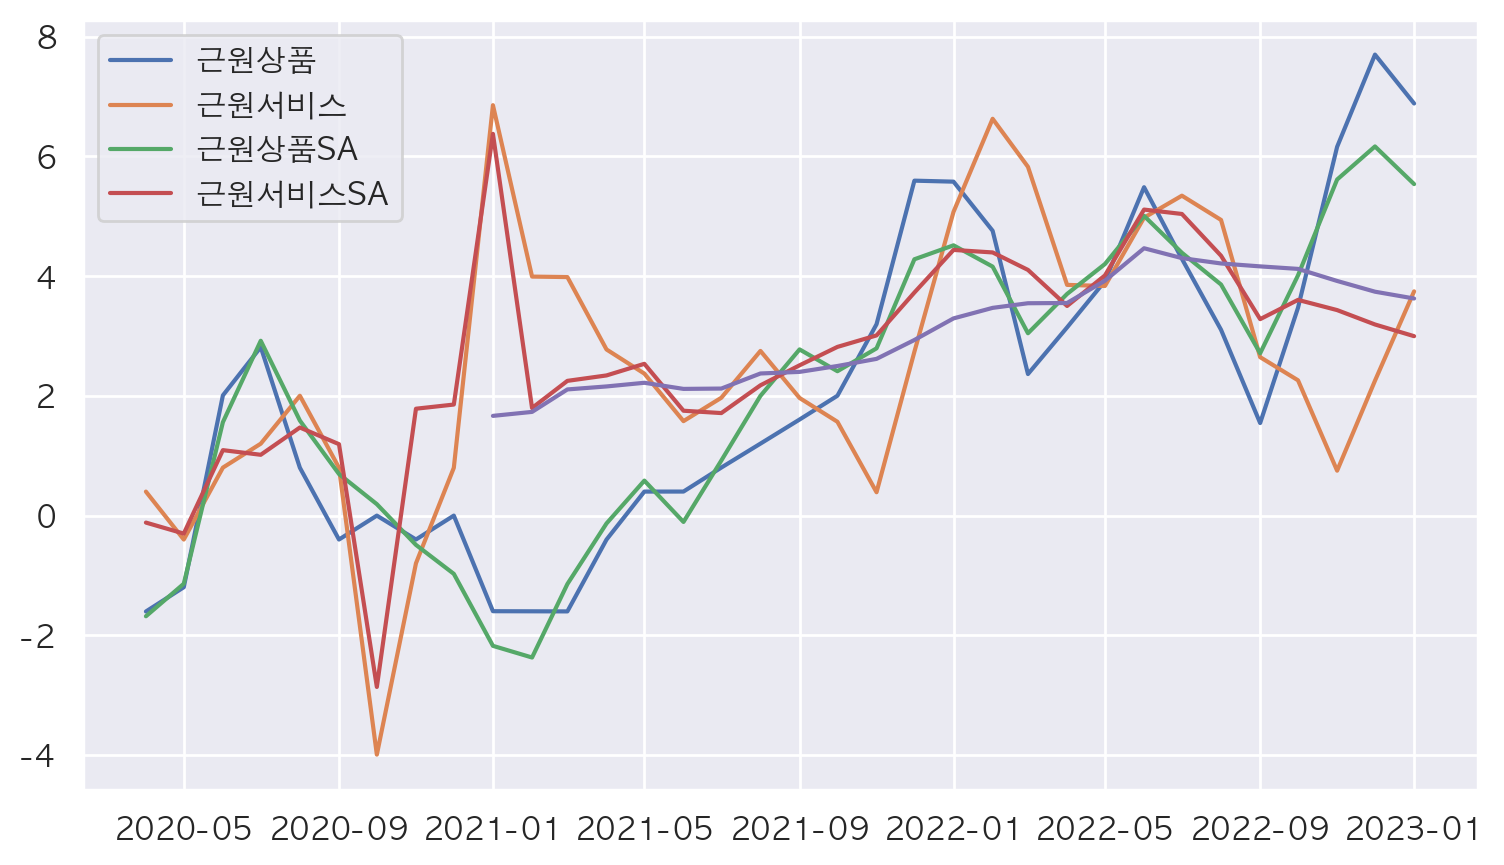

In [ ]:
#list_name = ['상품SA','서비스SA','근원상품SA','근원서비스SA']
list_name = ['근원상품','근원서비스','근원상품SA','근원서비스SA']
lags = 3
dfx = index_prices.loc[:,list_name].pct_change(lags)*(12/lags)*100
plt.plot(dfx, label=list_name)
plt.plot(generate_instantaneous_inflation('근원서비스SA', 1).loc[:,['inflation_inst']])
plt.legend()
plt.show()

<AxesSubplot:>

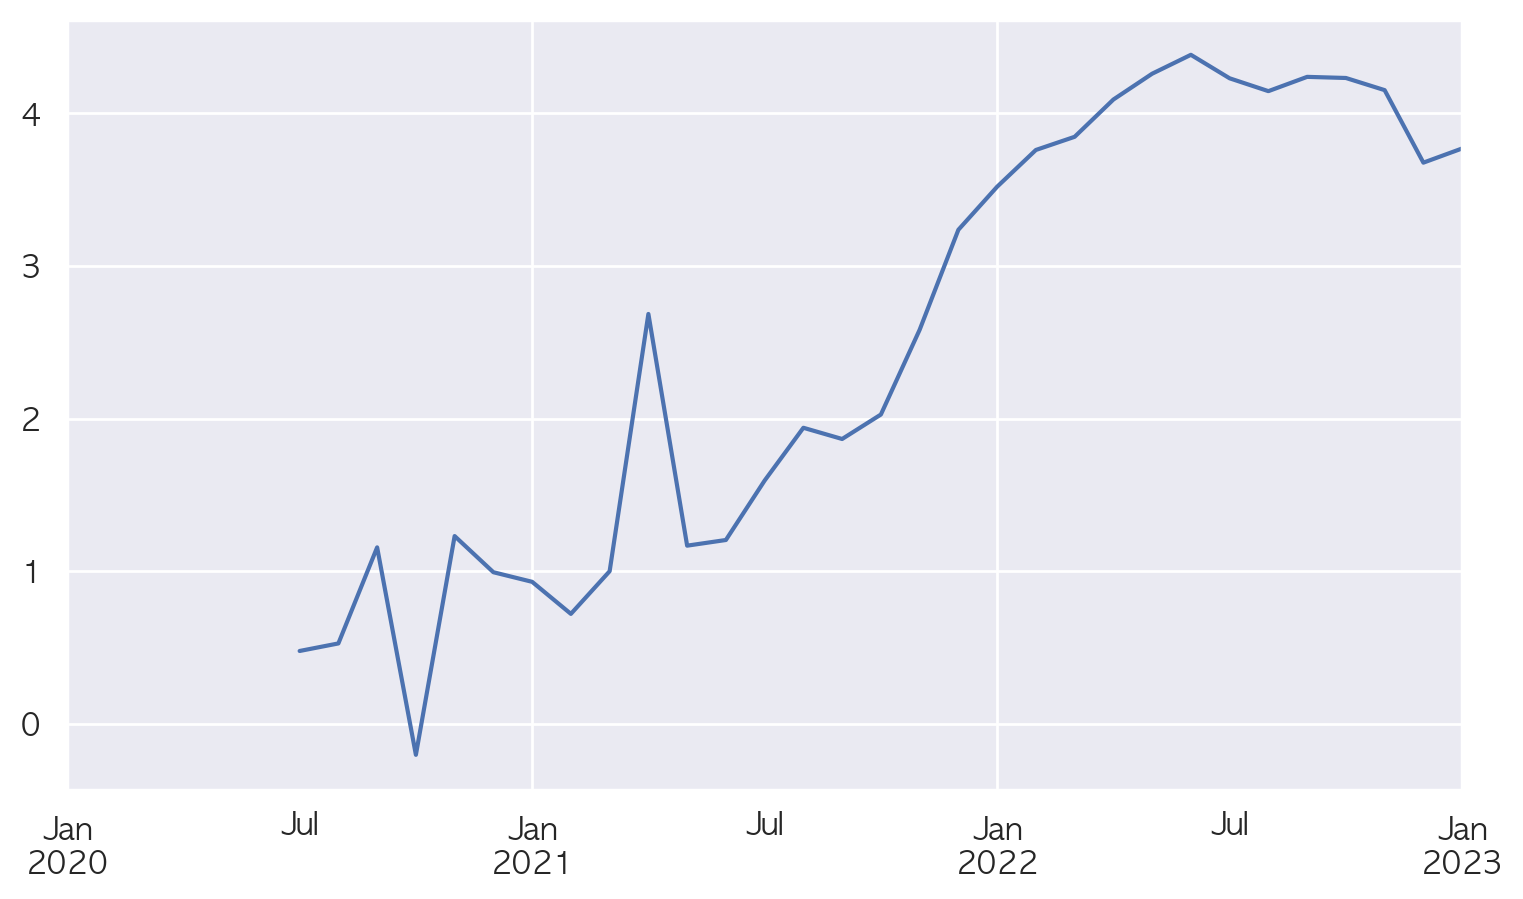

In [ ]:
generate_months_annualized('근원_SA',6).plot()

### Joy Plot

https://towardsdatascience.com/creating-joy-plots-using-joypy-67327a15eb50

In [80]:
# 최신 seaborn과 joypy 재설치
!pip install -U joypy

In [81]:
#!pip install joypy

import joypy
import seaborn as sns

In [82]:
lags = 3
df_trimmed = pd.DataFrame()

raw_growth_lags = raw_CPI.pct_change(lags)*(12/lags)*100
raw_growth_lags = raw_growth_lags.dropna()

for i in range(0,len(raw_growth_lags)):
    df_trim = pd.DataFrame(raw_growth_lags.iloc[i])

    q_min = df_trim.quantile(q=0.13, interpolation='nearest')
    q_max = df_trim.quantile(q=0.88, interpolation='nearest')

    cond1 = (df_trim>=q_min).squeeze()
    cond2 = (df_trim<=q_max).squeeze()

    df_trim = df_trim.loc[cond1 & cond2]
    df_trim.columns = ['trimmed values']
    df_trim['mdate'] = i

    df_trimmed = pd.concat([df_trimmed, df_trim])

In [83]:
def generate_trimmed_inflation(type_inflation, lags, qrange):
    '''
    generate inflation rate after trimming
    type_inflatin: "CPI", "근원"
    lags = 12, 3, 6 (any reasonable integer)
    qrange = [0.13,0.88], or your choice like [0,1]
    '''

    df_trimmed = pd.DataFrame()

    lags = lags
    qmin = qrange[0]
    qmax = qrange[-1]

    if type_inflation == "CPI":
        raw_growth_lags = raw_CPI.pct_change(lags)*(12/lags)*100
        raw_growth_lags = raw_growth_lags.dropna()
    else:
        raw_growth_lags = raw_core.pct_change(lags)*(12/lags)*100
        raw_growth_lags = raw_growth_lags.dropna()

    for i in range(0,len(raw_growth_lags)):
        df_trim = pd.DataFrame(raw_growth_lags.iloc[i])

        q_min = df_trim.quantile(q=qmin, interpolation='nearest')
        q_max = df_trim.quantile(q=qmax, interpolation='nearest')

        cond1 = (df_trim>=q_min).squeeze()
        cond2 = (df_trim<=q_max).squeeze()

        df_trim = df_trim.loc[cond1 & cond2]
        #df_trim.columns = ['trimmed values']
        #df_trim['mdate'] = i
        df_trim['mdate'] = 'NaN'
        df_trim['mdate'].replace('NaN',df_trim.columns[0],inplace=True)
        df_trim['mdate'] = df_trim['mdate'].dt.strftime('%Y-%m')
        df_trim.columns = ['trimmed values','mdate']

        df_trimmed = pd.concat([df_trimmed, df_trim])

    return df_trimmed

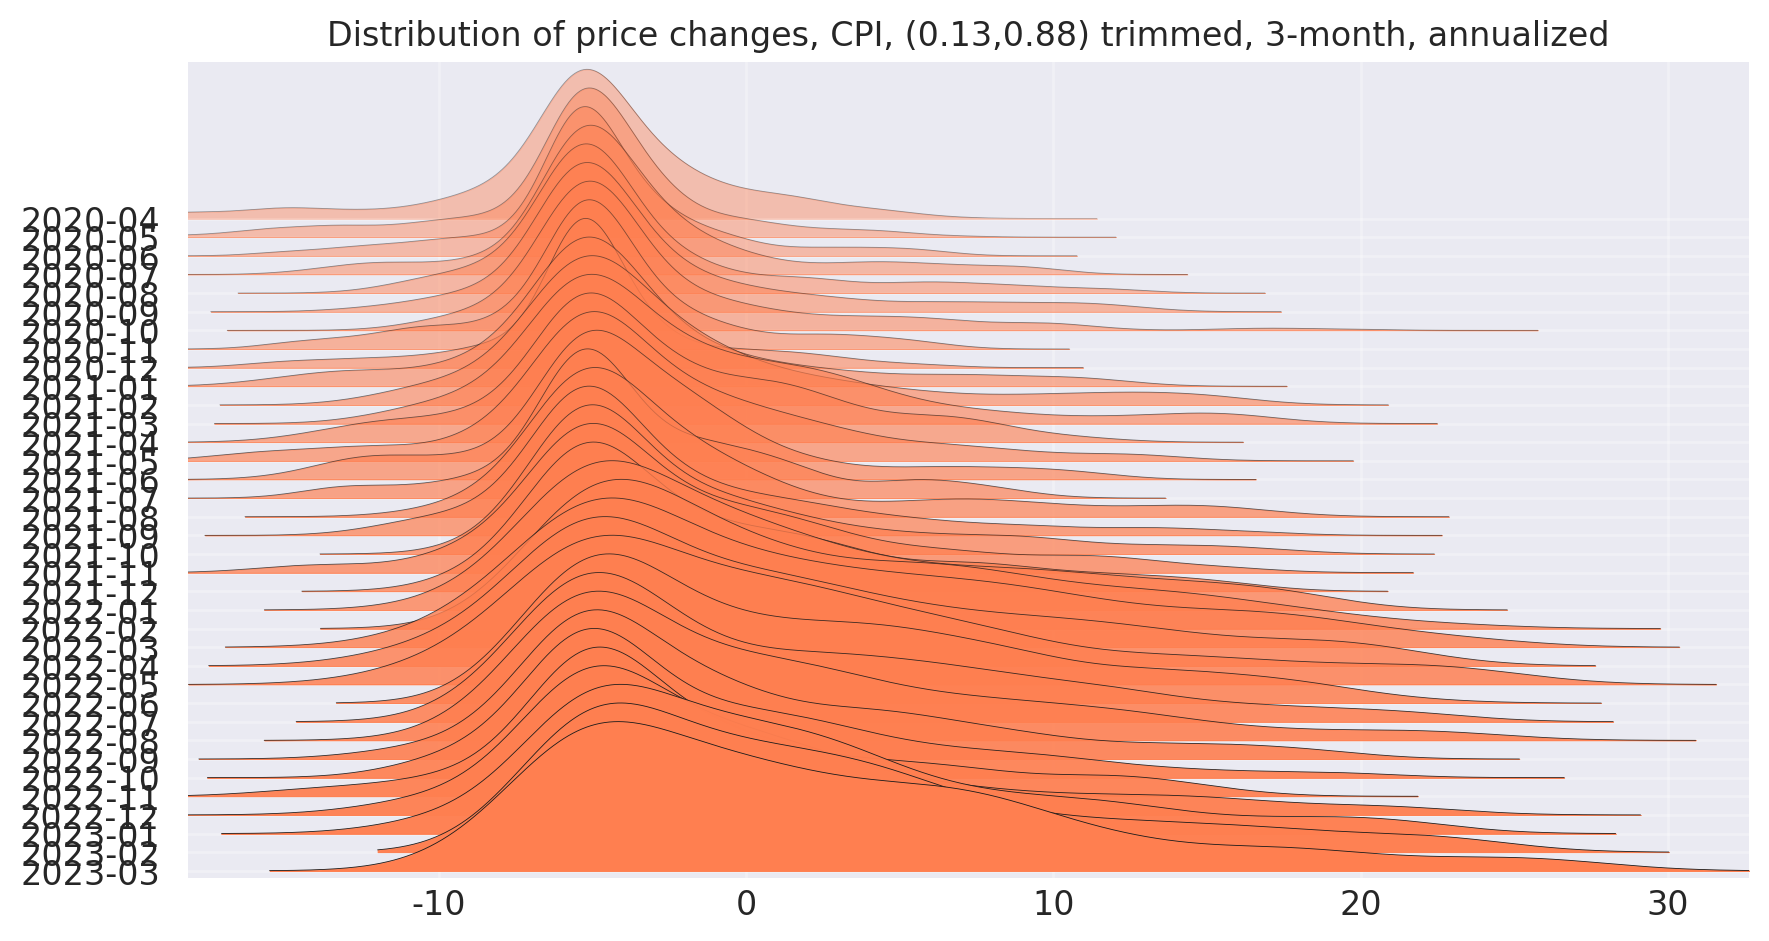

In [84]:
type_inflation = "CPI"
lags = 3
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )

for a in axes[:-1]:
    a.set_xlim([-10,30])

#save_fig('joyplot_CPI_3')
plt.show()



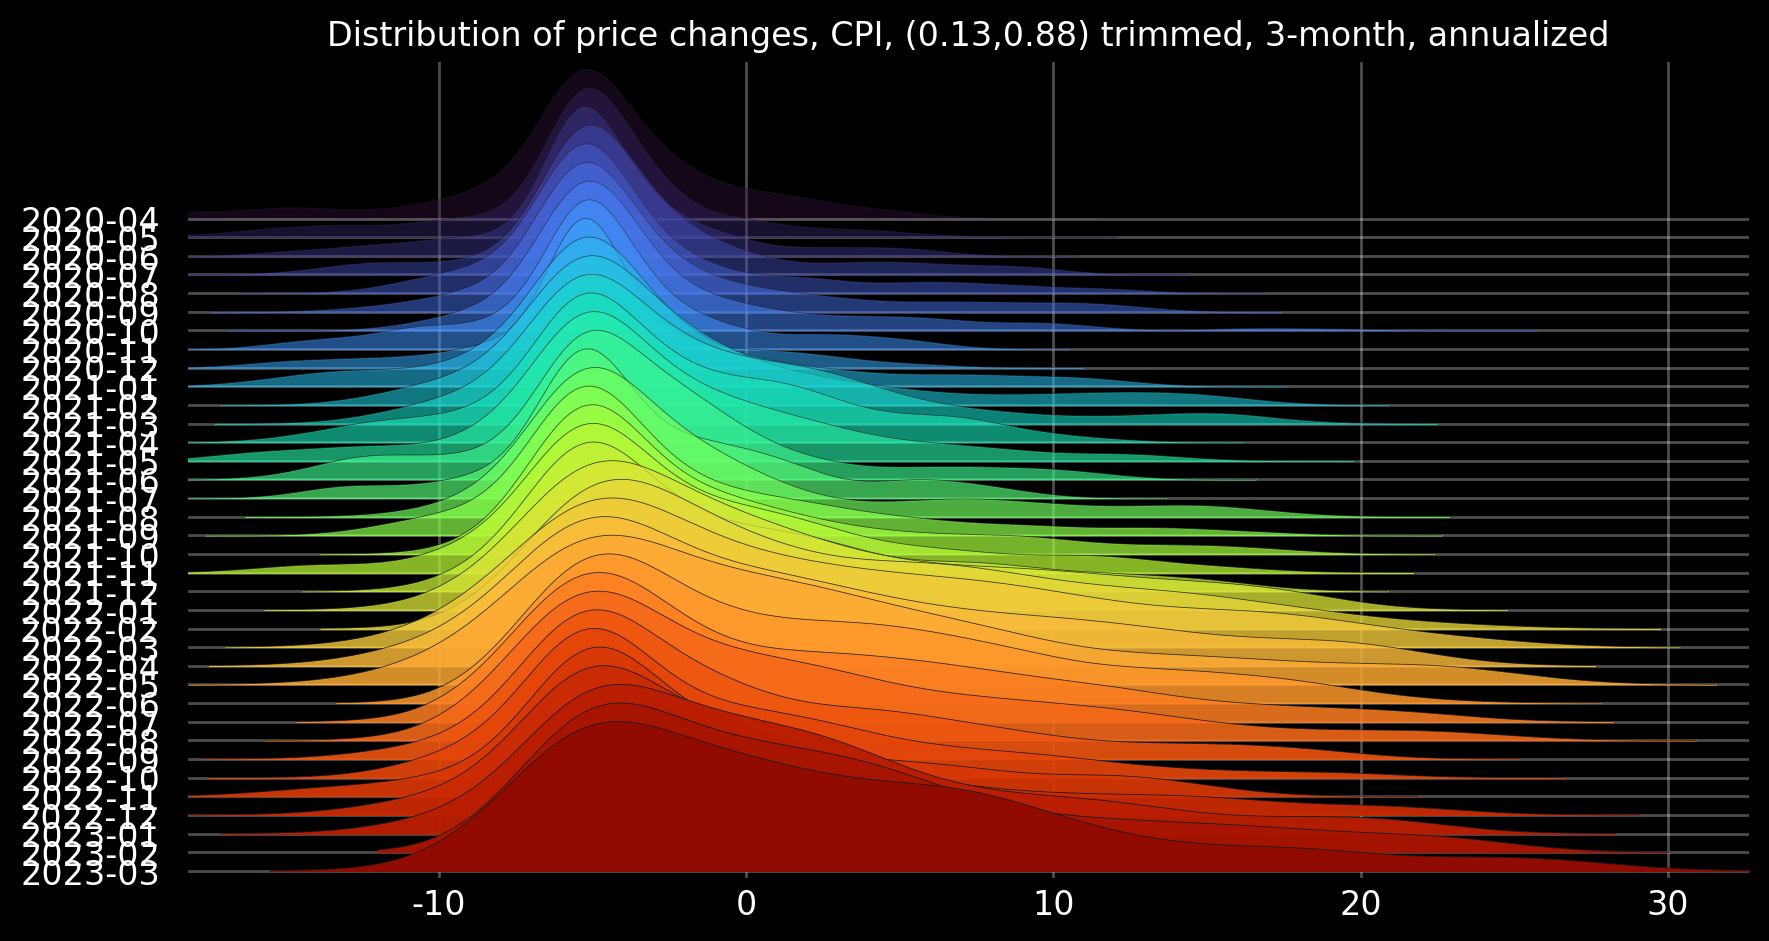

In [87]:
import matplotlib.cm as cm

type_inflation = "CPI"
lags = 3
qrange = [0.13, 0.88]
df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(
    df_trimmed,
    by="mdate",
    range_style='own',
    ylim='own',
    fade=True,
    linewidth=0.3,
    colormap=cm.turbo,  # 또는 cm.viridis, cm.plasma, cm.turbo 등
    grid=True,
    title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
)

for a in axes[:-1]:
    a.set_xlim([-10, 30])

plt.show()

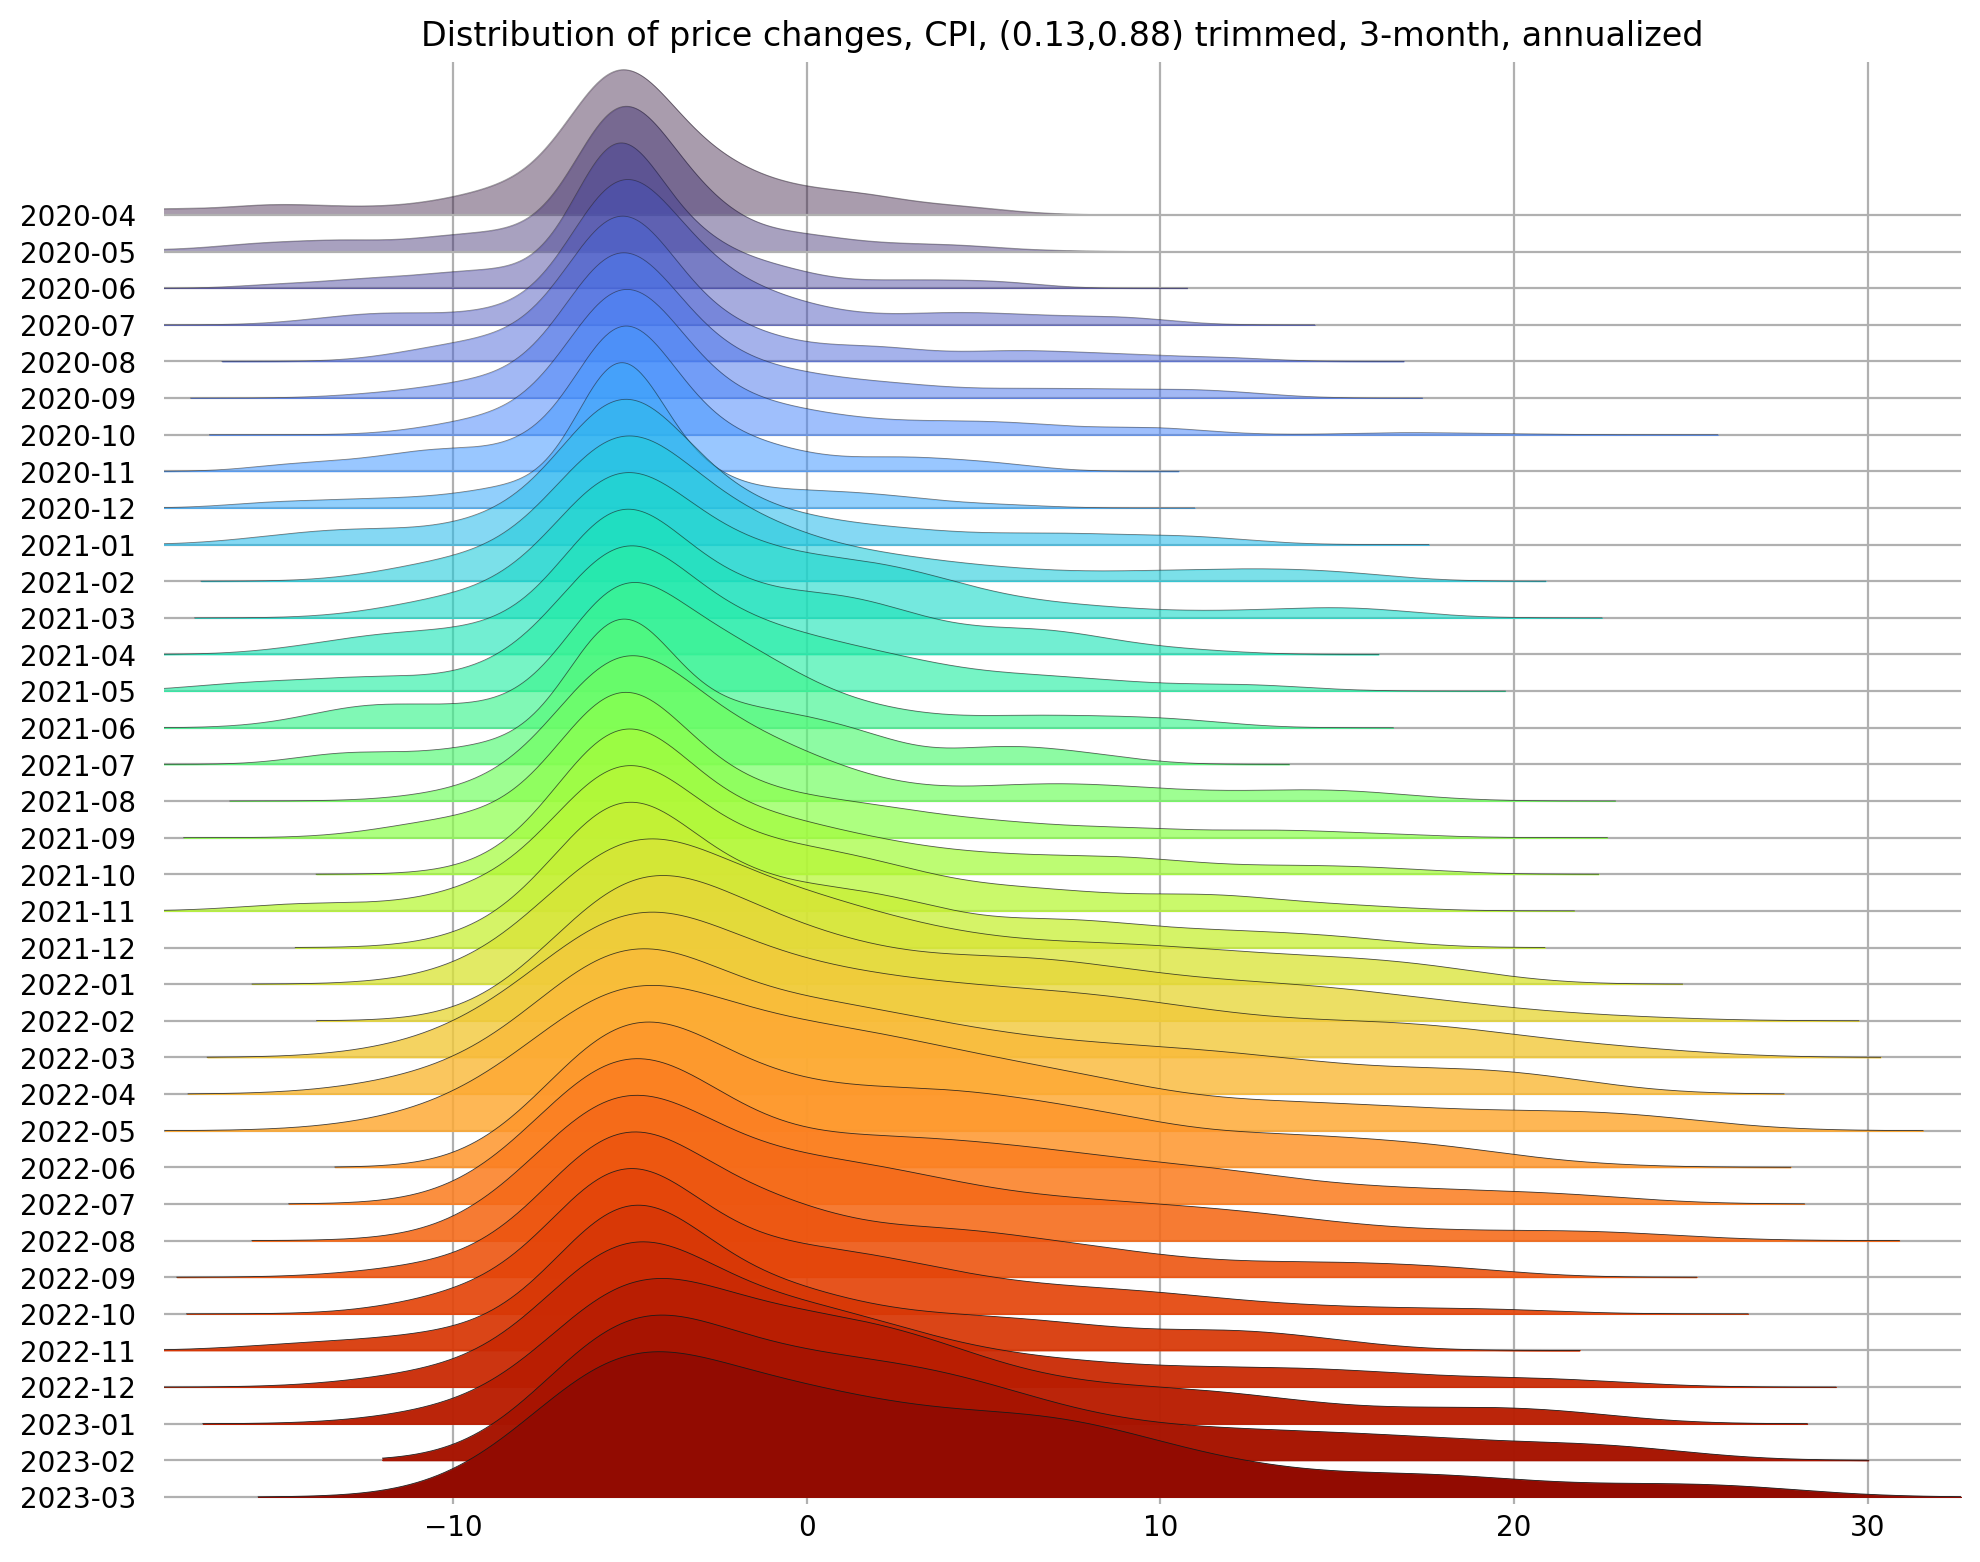

In [88]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

type_inflation = "CPI"
lags = 3
qrange = [0.13, 0.88]
df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

# 배경을 흰색으로 설정
plt.style.use('default')  # 또는 plt.style.use('seaborn-white')
fig, axes = joypy.joyplot(
    df_trimmed,
    by="mdate",
    range_style='own',
    ylim='own',
    fade=True,
    linewidth=0.3,
    colormap=cm.turbo,
    grid=True,
    title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized",
    figsize=(10, 8),
    background='white'  # 배경 흰색 설정
)

# Figure의 배경색도 흰색으로 설정
fig.patch.set_facecolor('white')

for a in axes[:-1]:
    a.set_xlim([-10, 30])
    a.set_facecolor('white')  # 각 축의 배경도 흰색으로

plt.show()

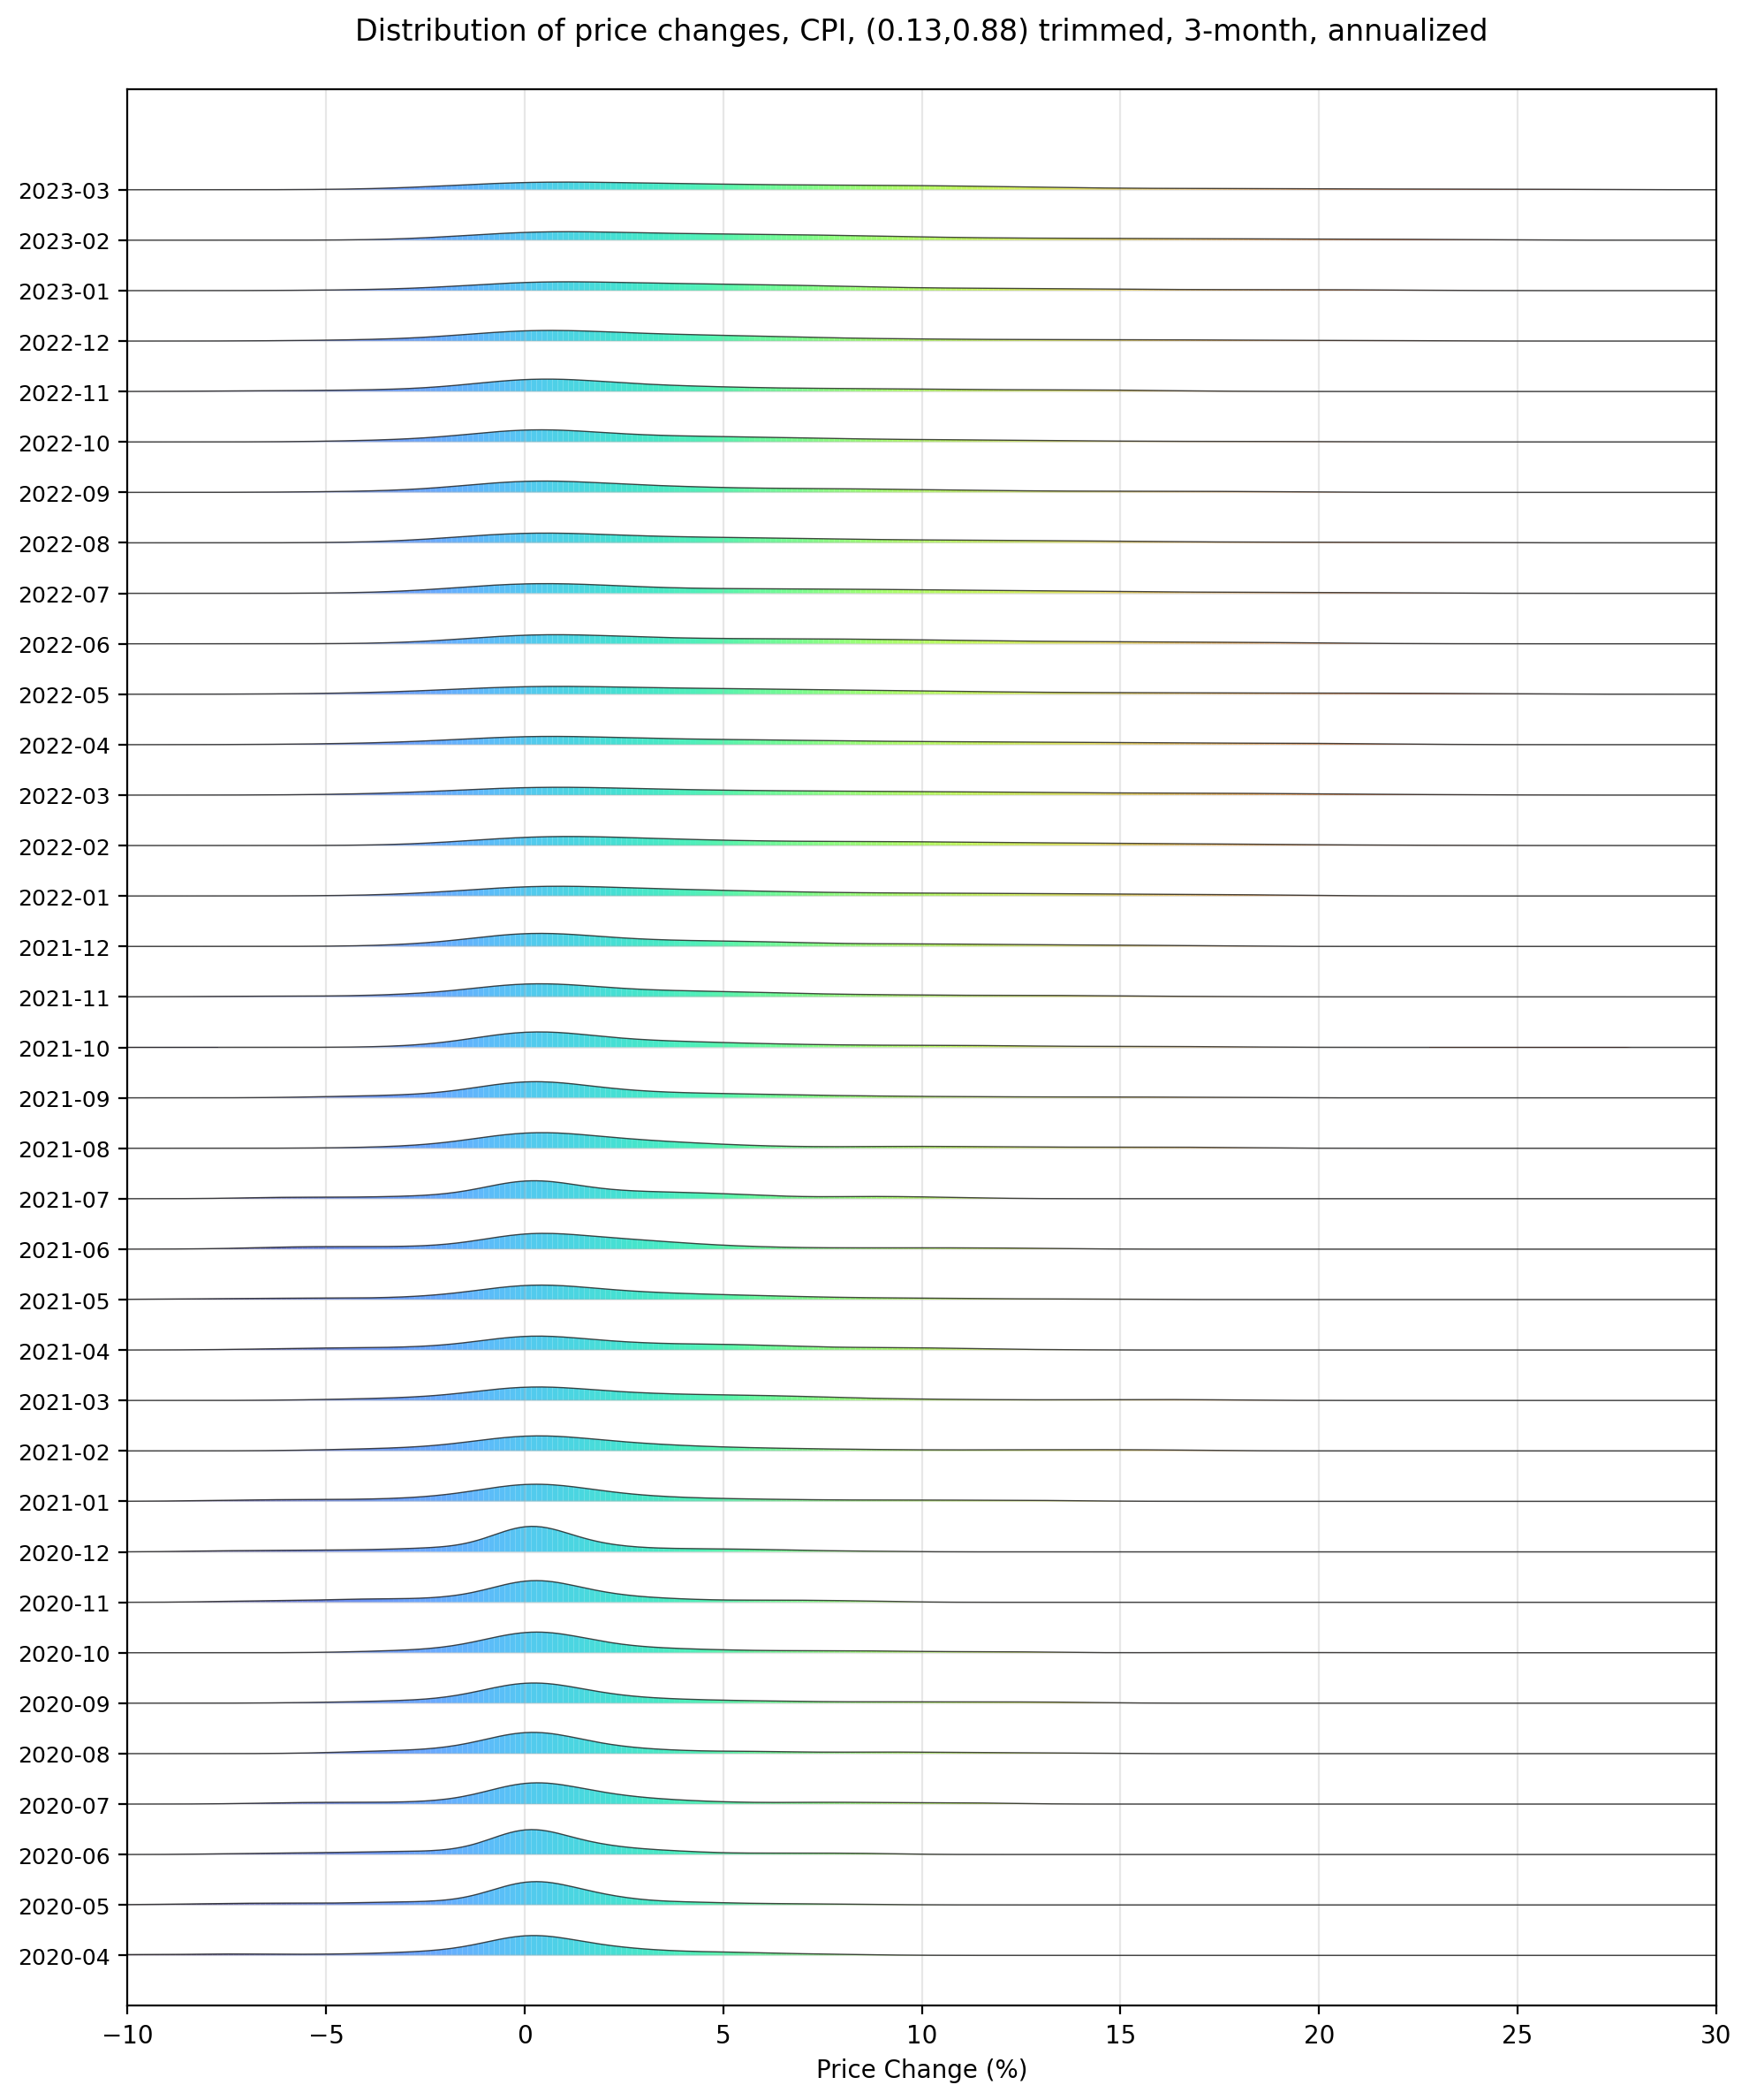

In [90]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import PolyCollection
import numpy as np
from scipy.stats import gaussian_kde

type_inflation = "CPI"
lags = 3
qrange = [0.13, 0.88]
df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

# 데이터 준비
dates = df_trimmed['mdate'].unique()
n_dates = len(dates)

# Figure 설정
fig, ax = plt.subplots(figsize=(10, 12))
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# 색상 맵 설정
cmap = cm.turbo
x_min, x_max = -10, 30

polys = []
colors_list = []

for i, date in enumerate(dates):
    # 숫자 컬럼만 선택 (mdate 제외)
    data = df_trimmed[df_trimmed['mdate'] == date].select_dtypes(include=[np.number])

    # 첫 번째 숫자 컬럼의 데이터 추출
    if data.shape[1] > 0:
        data_values = data.iloc[:, 0].dropna().values
        data_values = np.array(data_values, dtype=float)  # 명시적으로 float 변환
    else:
        continue

    # KDE 계산
    if len(data_values) > 1:
        kde = gaussian_kde(data_values)
        x = np.linspace(x_min, x_max, 300)
        y = kde(x)

        # y 값을 위로 shift (joyplot 효과)
        y_shifted = y + i * 0.5

        # 각 세그먼트별로 색상 적용
        for j in range(len(x) - 1):
            # x 값을 0-1 범위로 정규화하여 색상 결정
            color_value = (x[j] - x_min) / (x_max - x_min)
            color_value = np.clip(color_value, 0, 1)

            # 다각형 생성 (채우기 영역)
            verts = [(x[j], i * 0.5), (x[j], y_shifted[j]),
                     (x[j+1], y_shifted[j+1]), (x[j+1], i * 0.5)]
            polys.append(verts)
            colors_list.append(cmap(color_value))

        # 윤곽선 그리기
        ax.plot(x, y_shifted, 'k-', linewidth=0.5, alpha=0.8)

# PolyCollection으로 한번에 그리기
poly_collection = PolyCollection(polys, facecolors=colors_list,
                                  edgecolors='none', alpha=0.8)
ax.add_collection(poly_collection)

# Y축 레이블 설정
ax.set_yticks(np.arange(n_dates) * 0.5)
ax.set_yticklabels([d.strftime('%B, %Y') if hasattr(d, 'strftime')
                     else str(d) for d in dates], fontsize=9)

# X축 설정
ax.set_xlim([x_min, x_max])
ax.set_ylim([-0.5, n_dates * 0.5 + 0.5])
ax.set_xlabel('Price Change (%)', fontsize=10)
ax.grid(True, alpha=0.3)

# 제목
ax.set_title(f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized",
             fontsize=12, pad=20)

plt.tight_layout()
plt.show()

KeyError: 'value'

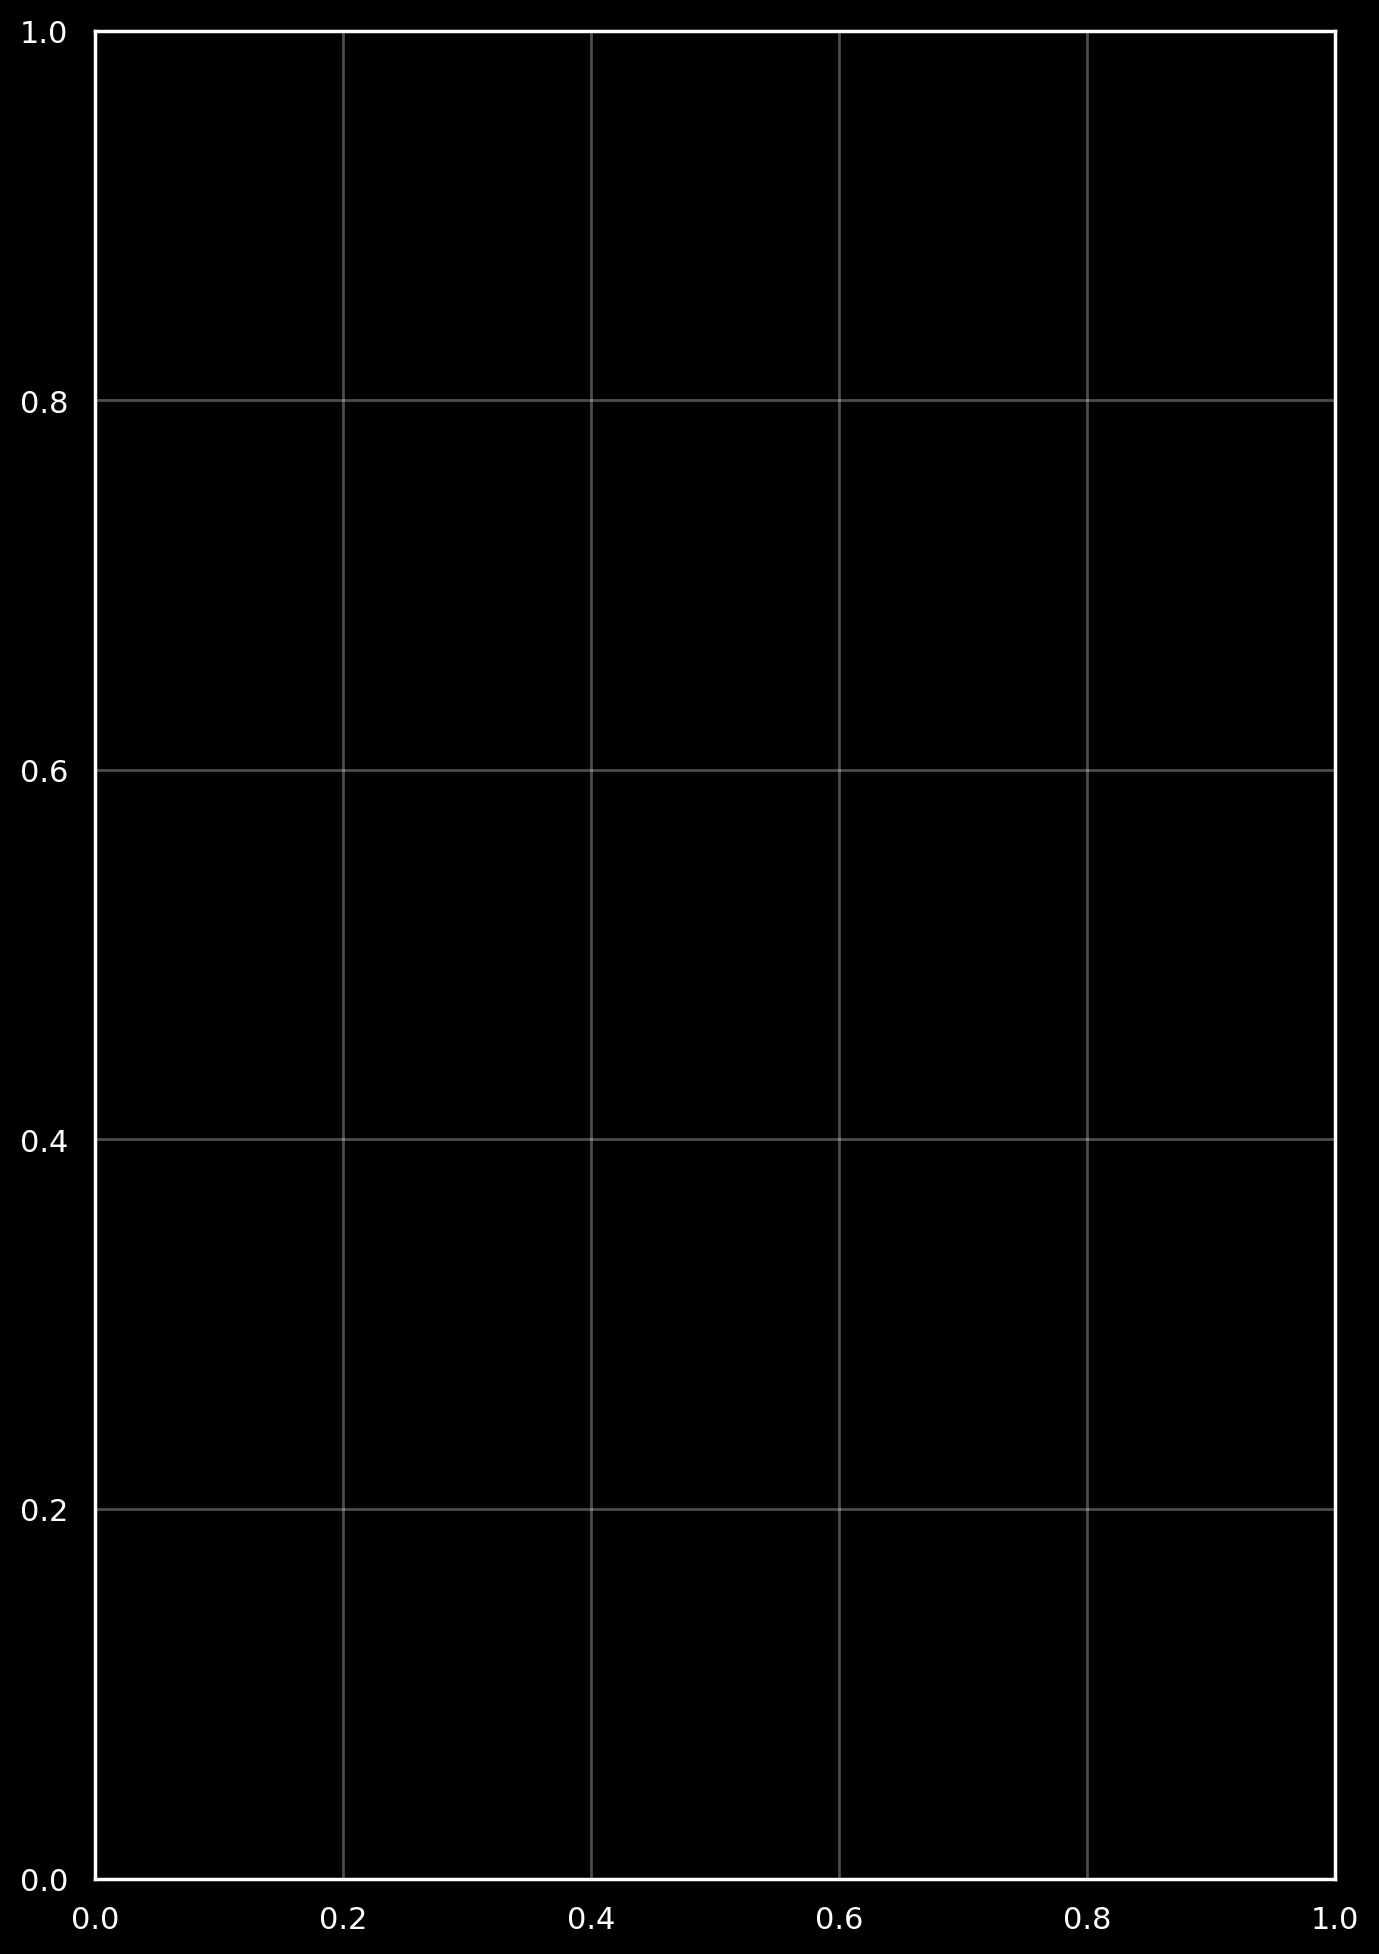

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.stats import gaussian_kde

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(8,12))

dates = sorted(df_trimmed["mdate"].unique())
cmap = cm.turbo   # blue→green→yellow→red

for i, d in enumerate(dates):

    data = df_trimmed[df_trimmed["mdate"]==d]["value"].dropna()

    kde = gaussian_kde(data)
    x = np.linspace(-10,30,400)
    y = kde(x)

    y = y / y.max() * 0.8   # normalize height

    # gradient fill
    for j in range(len(x)-1):
        ax.fill_between(
            x[j:j+2],
            i,
            y[j:j+2] + i,
            color=cmap((x[j]+10)/40),
            linewidth=0
        )

ax.set_yticks(range(len(dates)))
ax.set_yticklabels(dates)
ax.set_xlim([-10,30])
ax.set_title("Distribution of Price Changes", fontsize=14)
ax.grid(False)

plt.show()

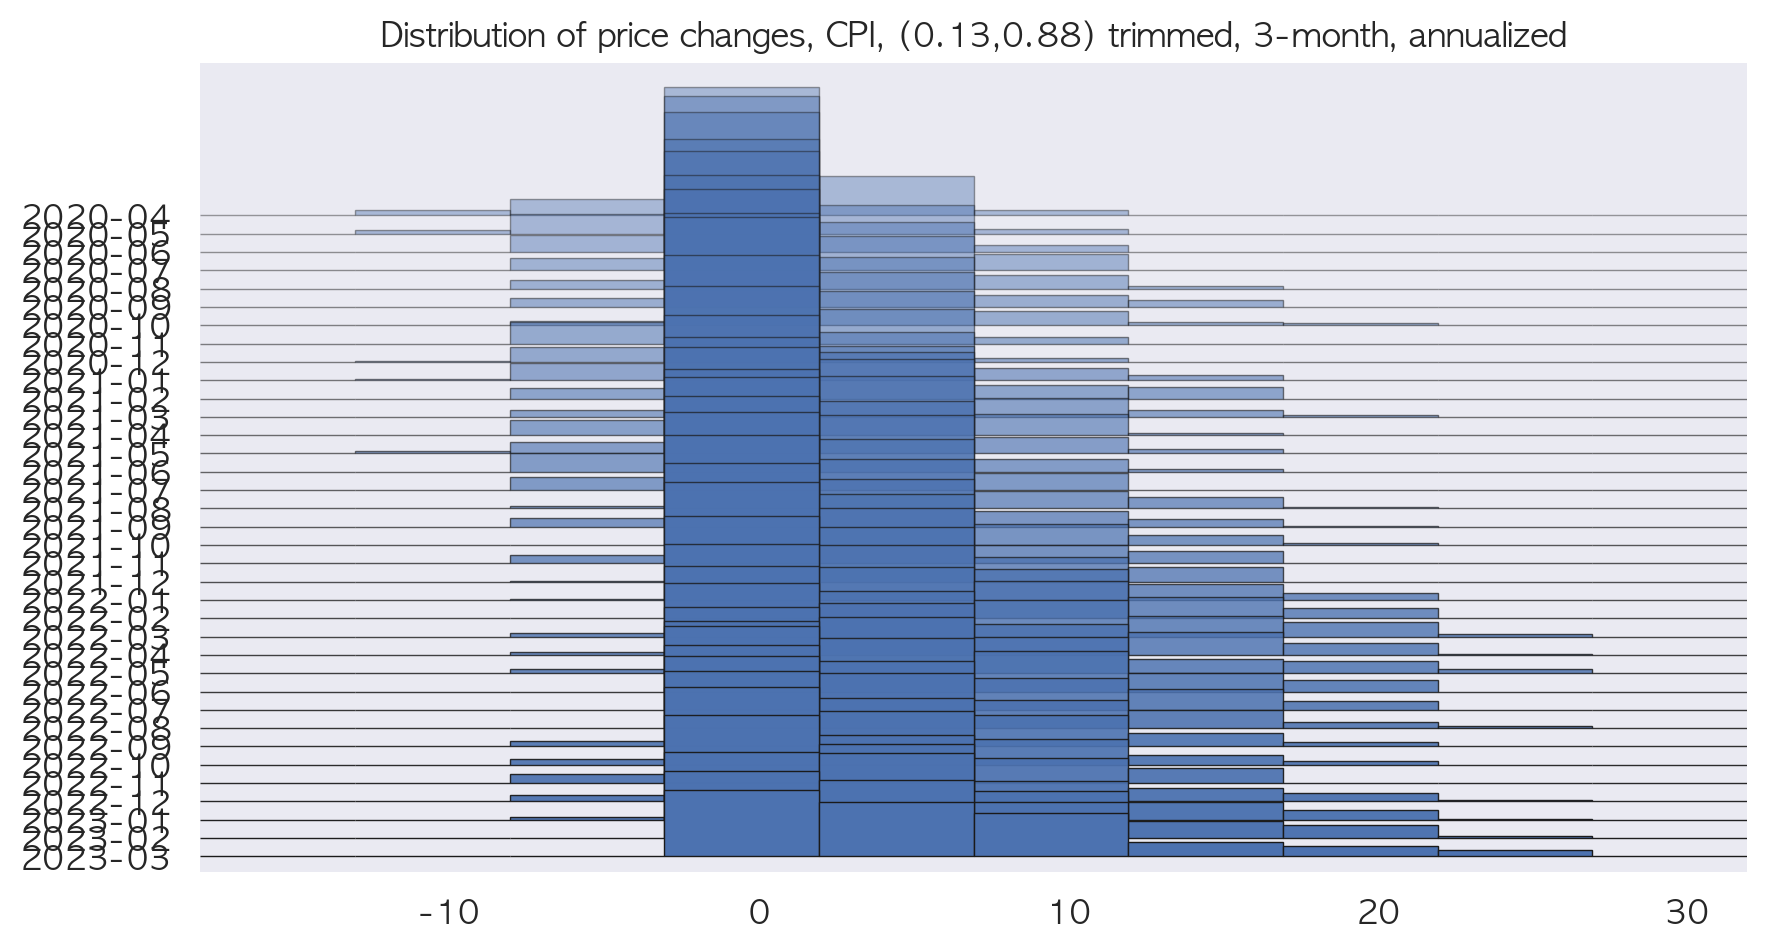

In [ ]:
fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        fade=True, linewidth=0.5, colormap=cm.autumn,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized",
                        hist=True
                        )



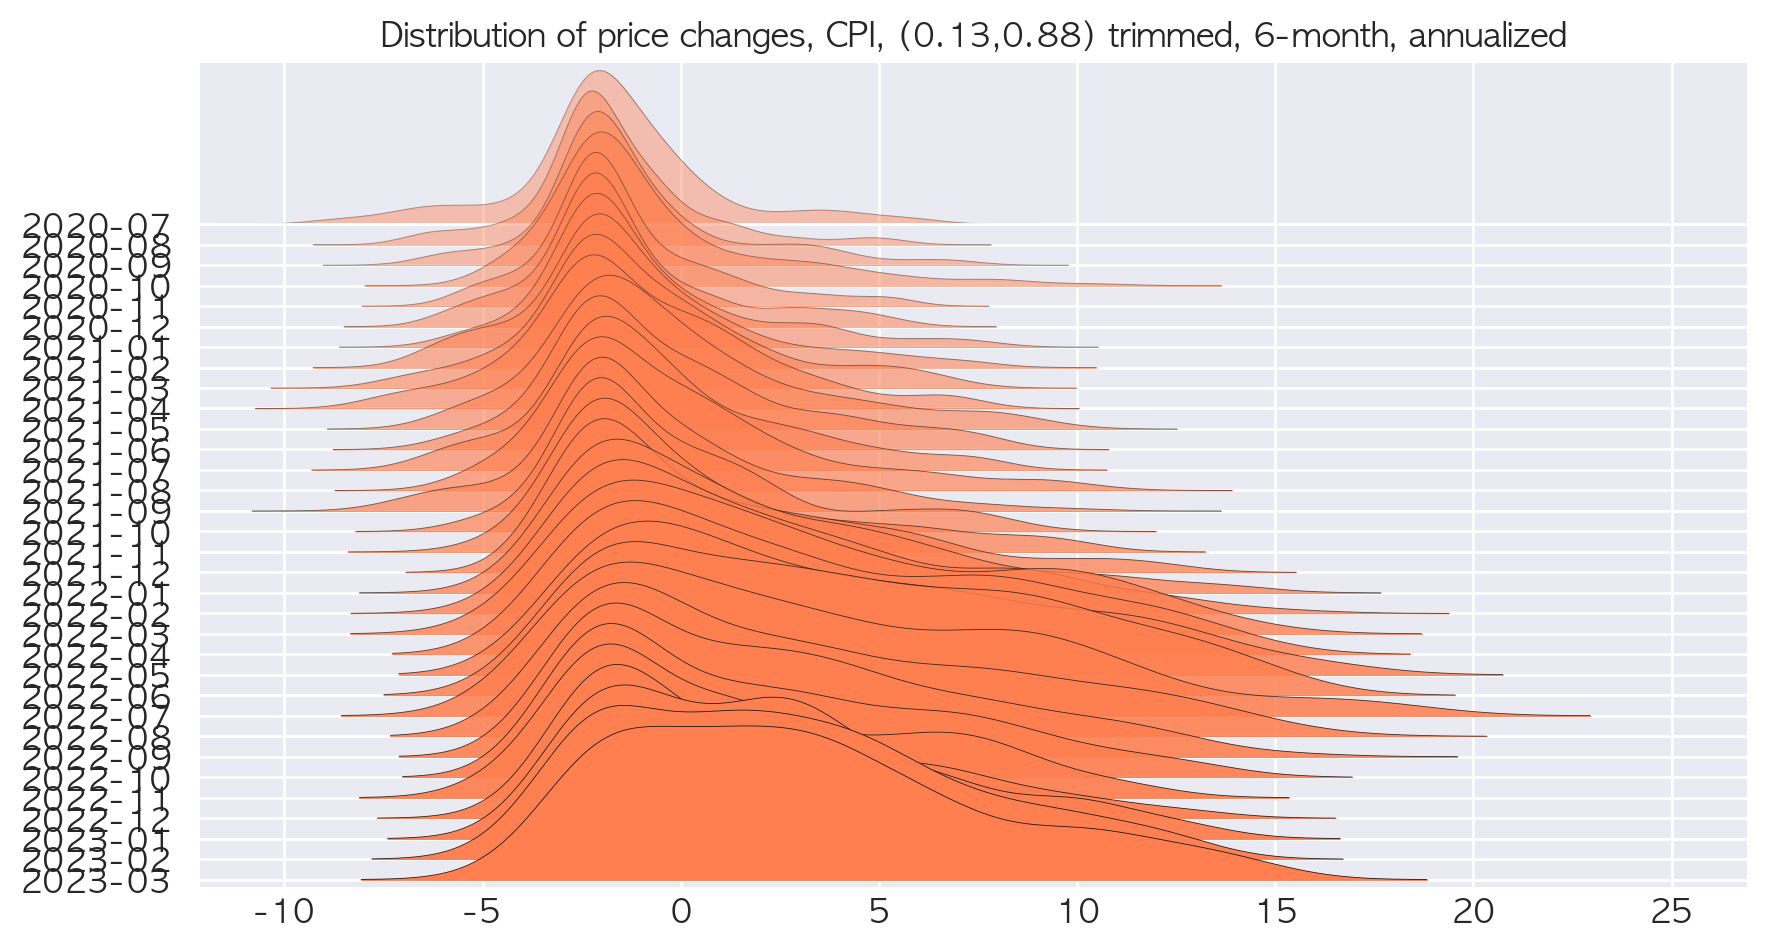

In [ ]:
type_inflation = "CPI"
lags = 6
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )

for a in axes[:-1]:
    a.set_xlim([-10,30])

plt.show()


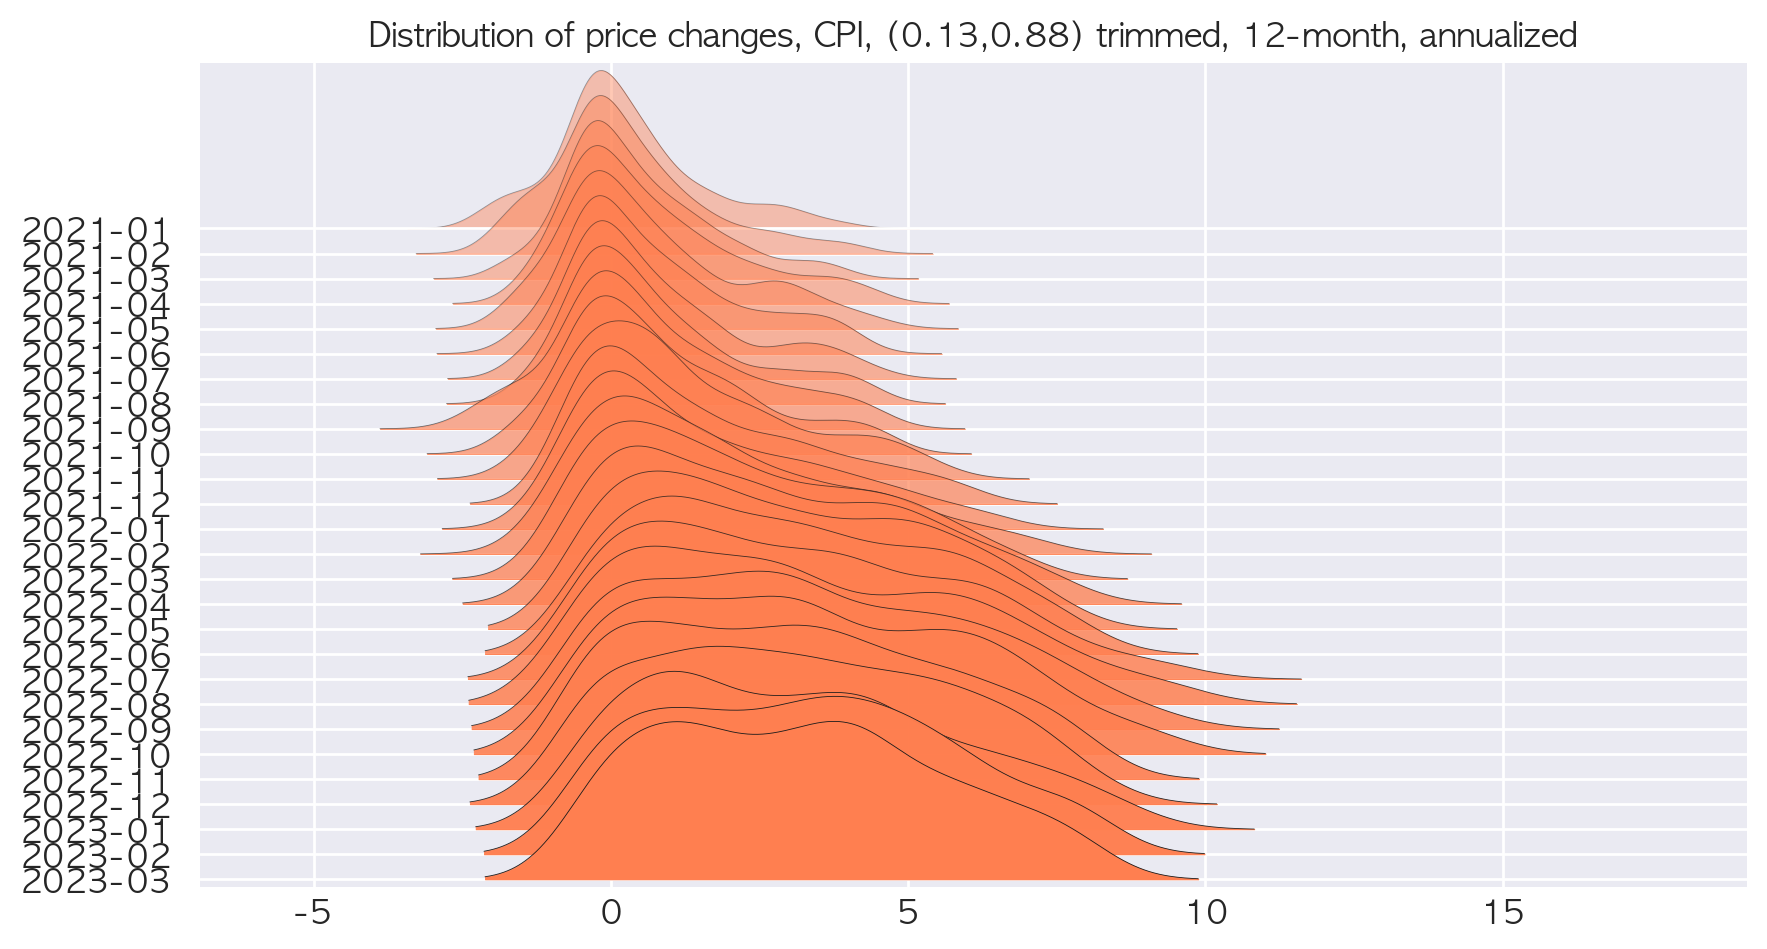

In [ ]:
type_inflation = "CPI"
lags = 12
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )

for a in axes[:-1]:
    a.set_xlim([-10,30])

plt.show()

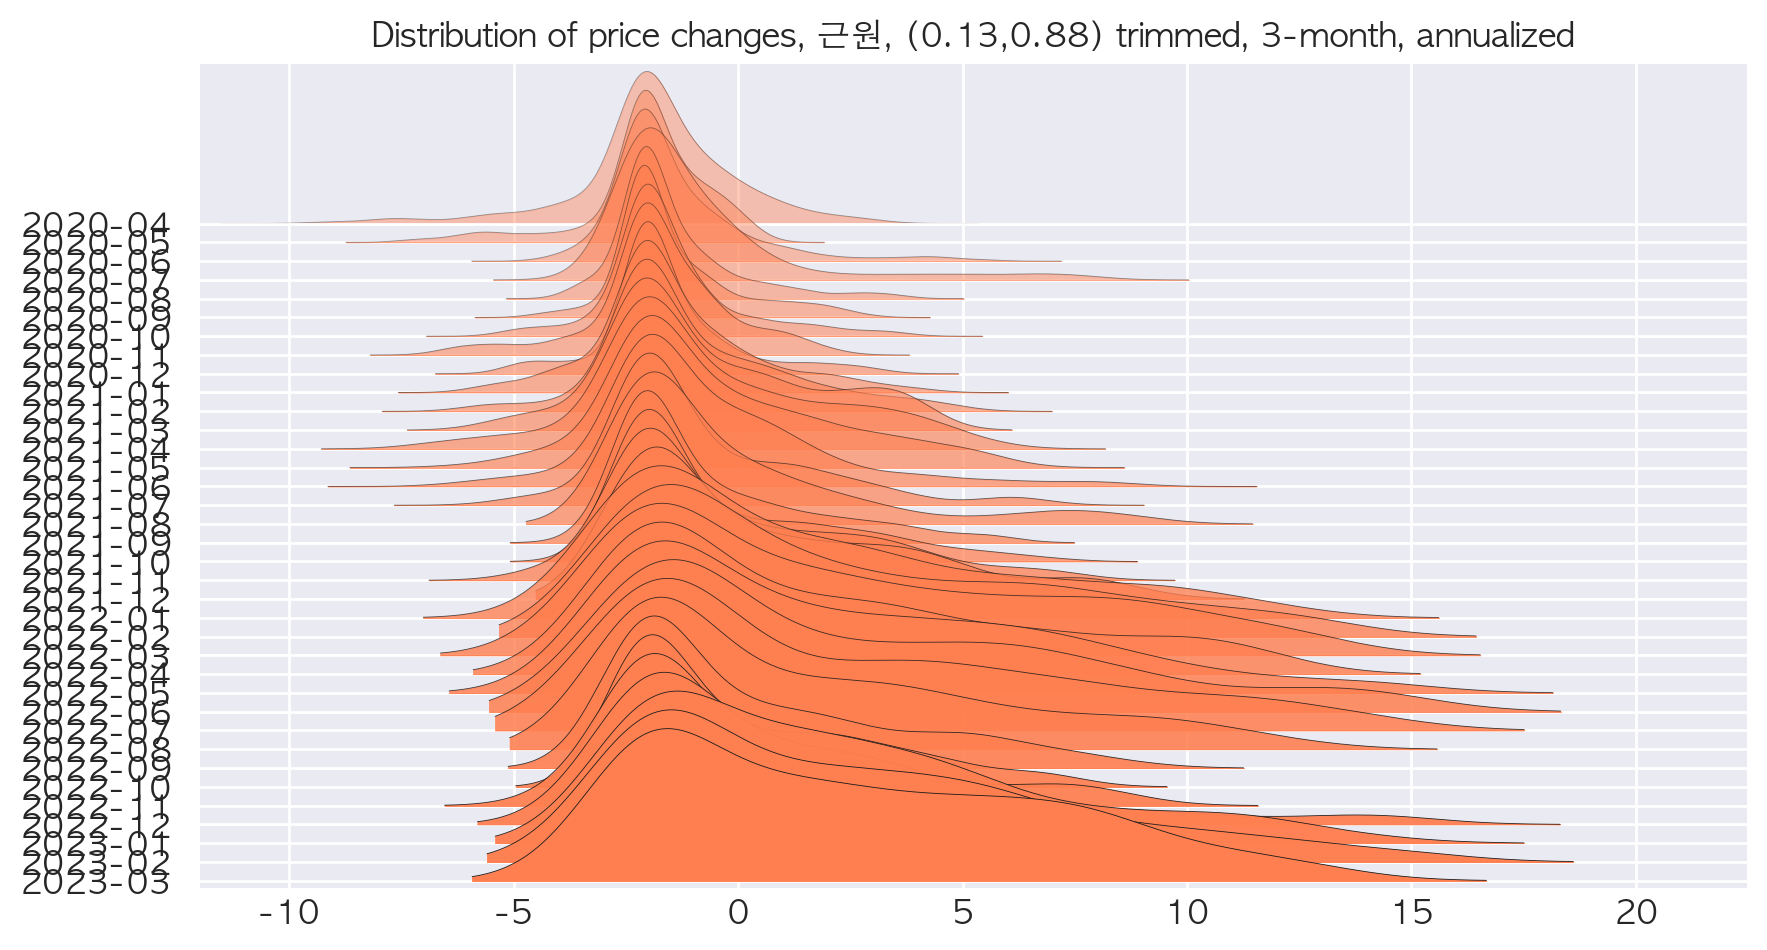

In [ ]:
type_inflation = "근원"
lags = 3
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )

for a in axes[:-1]:
    a.set_xlim([-10,25])

plt.show()


In [ ]:
df_trimmed.describe()

trimmed values
count        8,389.00
mean             2.31
std              3.52
min             -7.06
25%              0.00
50%              0.81
75%              3.66
max             17.55

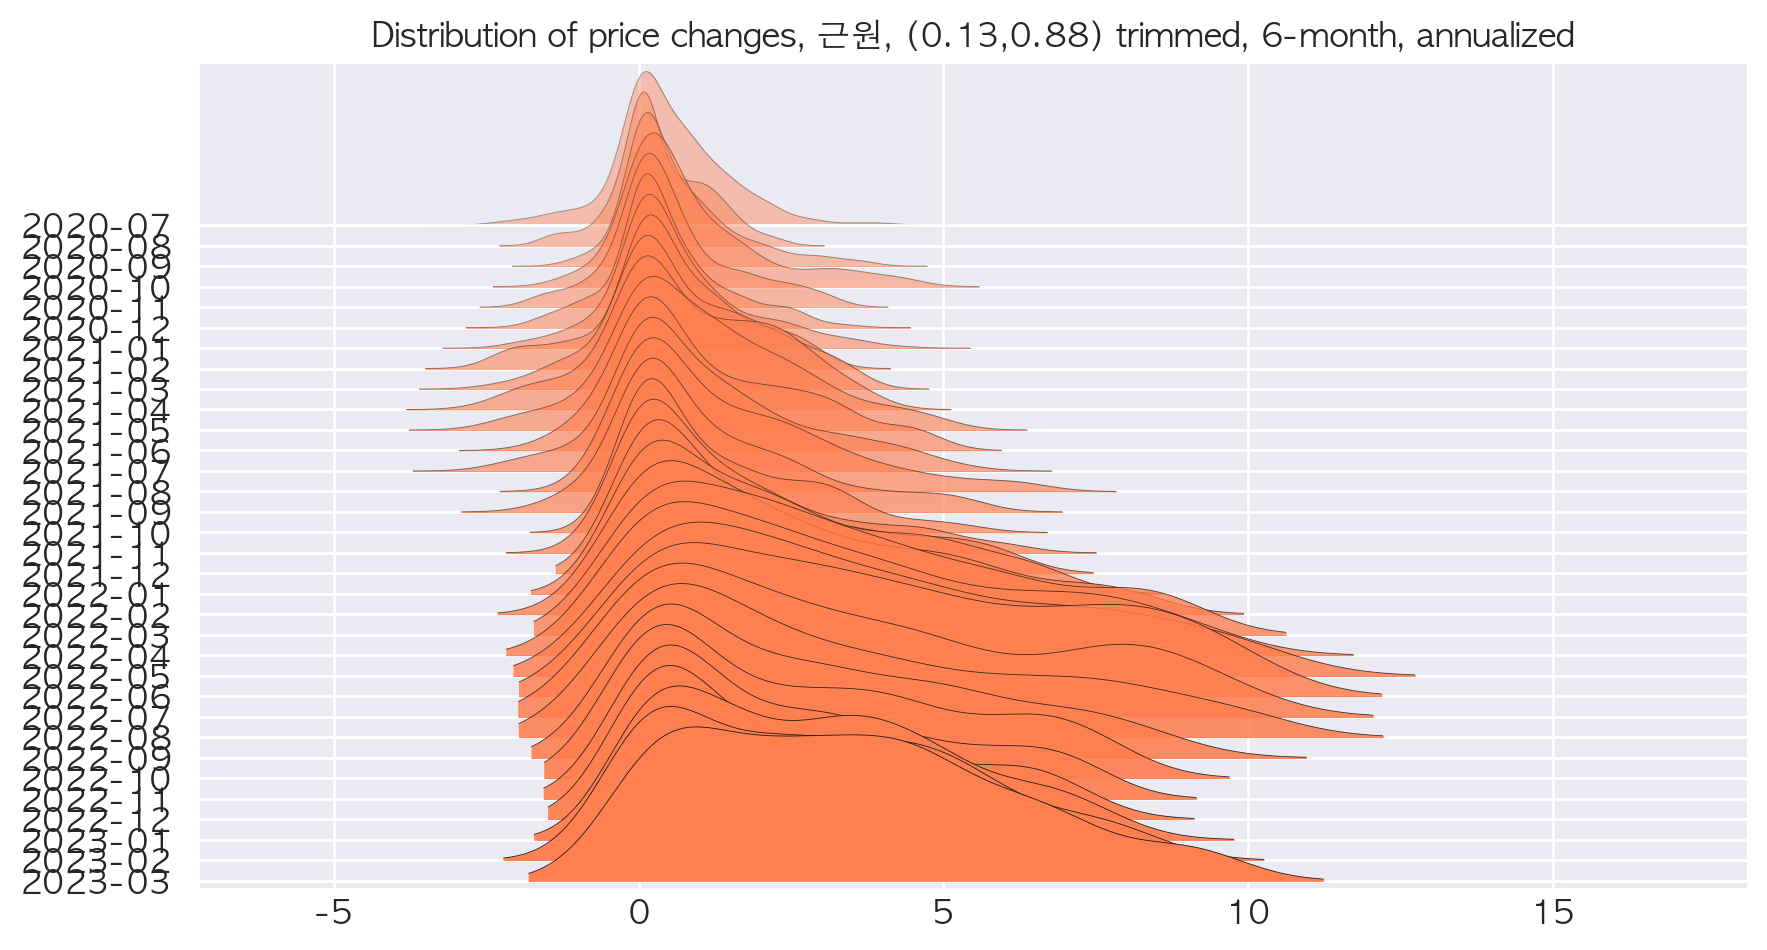

In [ ]:
type_inflation = "근원"
lags = 6
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )
for a in axes[:-1]:
    a.set_xlim([-10,25])

plt.show()

In [ ]:
df_trimmed.describe()

trimmed values
count        7,680.00
mean             2.50
std              3.18
min             -3.57
25%              0.00
50%              1.40
75%              4.01
max             14.56

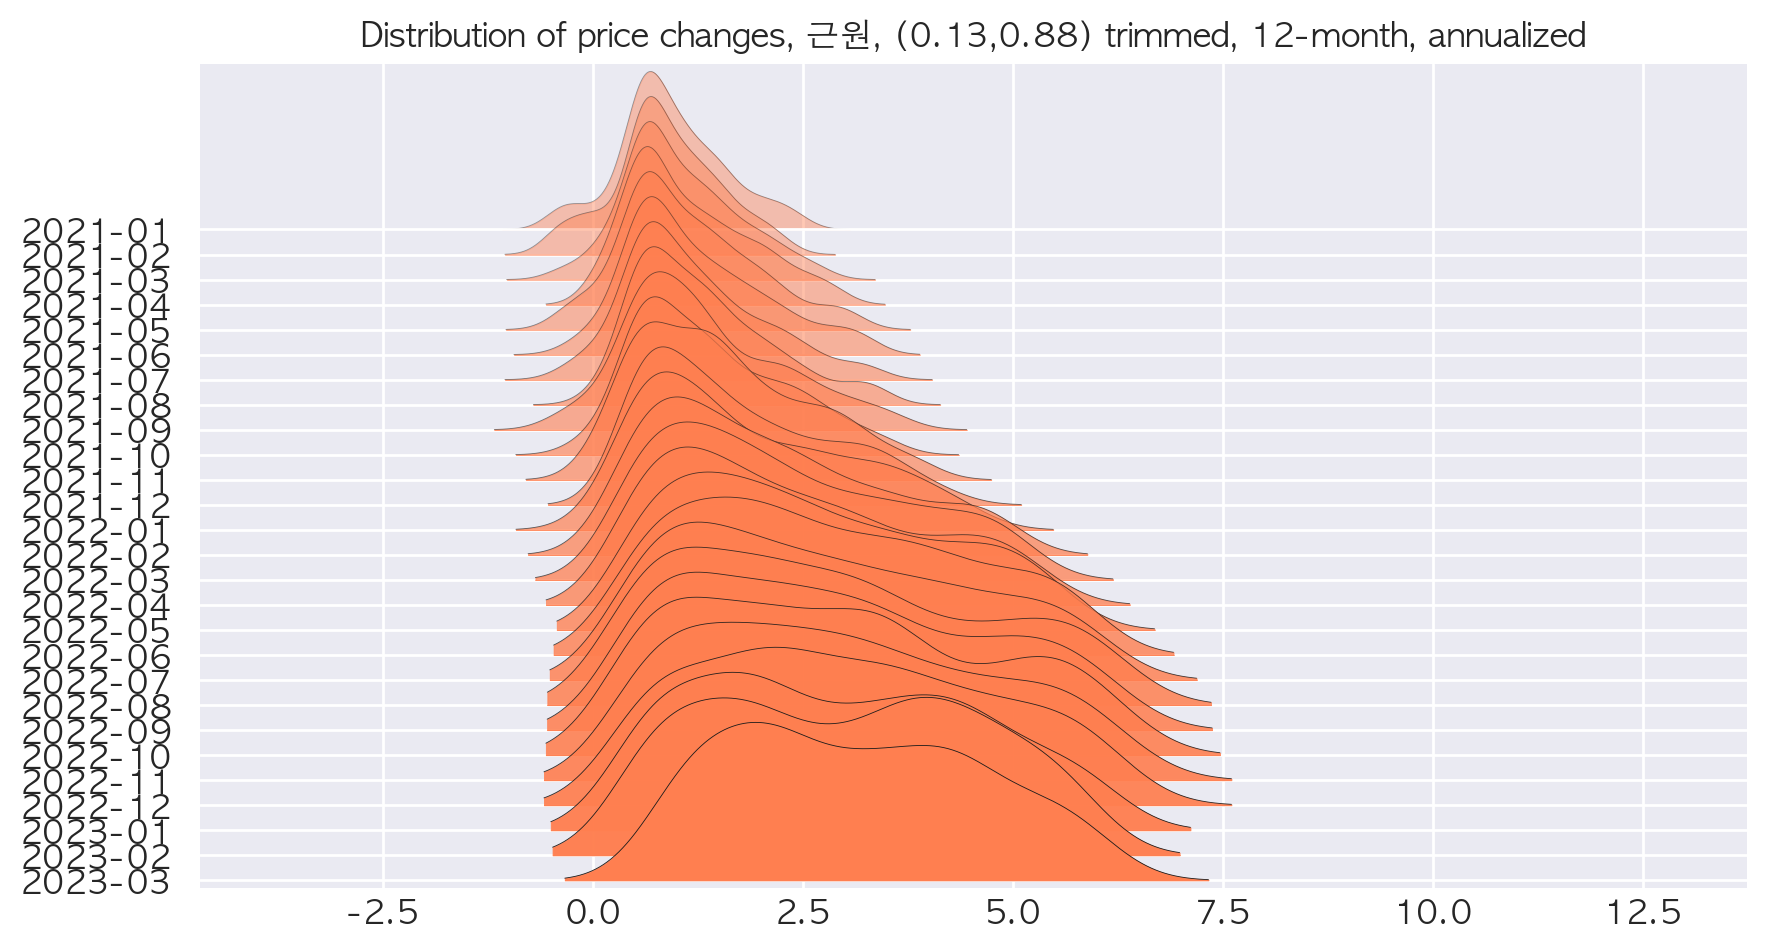

In [ ]:
type_inflation = "근원"
lags = 12
qrange = [0.13,0.88]

df_trimmed = generate_trimmed_inflation(type_inflation, lags, qrange)

fig, axes = joypy.joyplot(df_trimmed, by="mdate", range_style='own',
                        #overlap=2,
                        ylim='own',
                        fade=True,
                        linewidth=0.3,
                        color='coral',
                        #colormap=cm.summer_r,
                        grid=True,
                        #alpha=0.7,
                        title=f"Distribution of price changes, {type_inflation}, ({qrange[0]},{qrange[1]}) trimmed, {lags}-month, annualized"
                        )

for a in axes[:-1]:
    a.set_xlim([-10,25])

plt.show()


In [ ]:
inf_table

CPI    관리  관리제외   근원  관리제외 근원  근원(농산물 및 석유류 제외)   생활  가중중위수  \
2021-01-01 0.95 -0.61  1.34 0.72     0.84              1.19 0.83   0.67   
2021-02-01 1.43 -0.49  1.91 0.64     0.68              1.19 1.68   0.69   
2021-03-01 1.90 -0.33  2.46 1.07     1.18              1.44 2.14   1.14   
2021-04-01 2.49 -0.32  3.20 1.22     1.38              1.60 3.09   1.45   
2021-05-01 2.63 -0.24  3.35 1.19     1.31              1.55 3.36   1.36   
2021-06-01 2.35 -0.19  2.99 1.12     1.20              1.48 3.00   1.46   
2021-07-01 2.63  0.74  3.10 1.28     1.40              1.77 3.48   1.37   
2021-08-01 2.55  0.62  3.02 1.34     1.52              1.89 3.33   1.38   
2021-09-01 2.41  0.65  2.84 1.42     1.61              1.98 3.11   1.34   
2021-10-01 3.17  4.25  2.91 2.35     1.70              2.76 4.64   1.83   
2021-11-01 3.78  1.18  4.42 1.90     2.11              2.45 5.21   1.85   
2021-12-01 3.71  0.99  4.37 2.24     2.61              2.74 4.63   1.98   
2022-01-01 3.62  1.46  4.14 2.59     2.96              2.97 4.08   2.32   
2022-02-01 3.66  1.46  4.20 2.87     3.32              3.24 4.12   2.66   
2022-03-01 4.15  1.08  4.89 2.88     3.46              3.26 4.97   2.80   
2022-04-01 4.77  1.79  5.50 3.07     3.68              3.60 5.68   2.76   
2022-05-01 5.40  2.48  6.11 3.43     4.08              4.10 6.69   3.35   
2022-06-01 6.04  2.52  6.90 3.85     4.61              4.41 7.42   3.47   
2022-07-01 6.34  3.43  7.04 3.92     4.69              4.48 7.92   3.63   
2022-08-01 5.71  3.45  6.25 3.99     4.77              4.43 6.79   3.79   
2022-09-01 5.59  3.48  6.09 4.06     4.84              4.52 6.50   4.30   
2022-10-01 5.66  5.07  5.81 4.19     4.97              4.77 6.45   3.74   
2022-11-01 5.04  5.05  5.03 4.25     5.05              4.83 5.48   3.49   
2022-12-01 5.03  5.05  5.03 4.08     4.83              4.75 5.74   3.41   
2023-01-01 5.17  5.84  5.01 4.05     4.82              4.95 6.12   3.08   
2023-02-01 4.82  5.96  4.55 3.96     4.66              4.81 5.52   3.29   
2023-03-01 4.24  6.27  3.76 4.05     4.67              4.81 4.38   3.08   

            조정평균 물가상승률  
2021-01-01        0.71  
2021-02-01        0.74  
2021-03-01        1.22  
2021-04-01        1.61  
2021-05-01        1.58  
2021-06-01        1.66  
2021-07-01        1.66  
2021-08-01        1.79  
2021-09-01        1.89  
2021-10-01        2.30  
2021-11-01        2.39  
2021-12-01        2.67  
2022-01-01        2.91  
2022-02-01        3.21  
2022-03-01        3.21  
2022-04-01        3.59  
2022-05-01        4.14  
2022-06-01        4.33  
2022-07-01        4.63  
2022-08-01        4.58  
2022-09-01        4.50  
2022-10-01        4.44  
2022-11-01        4.25  
2022-12-01        4.29  
2023-01-01        4.28  
2023-02-01        4.04  
2023-03-01        4.02

### 2% 목표 관련 (향후 흐름 시나리오 분석)

1. 시나리오 1
(1) 조사국 인플레이션 전망치 입력: 2월 5% 정도, 3월 4.5%, 12월 3.0%
(2) (1)에 기반해서 향후 물가 수준(level) 계산
(3) 2022.7 inflation peak 부터 복리로 연간 2% 인상되게 2% 경로 계산

2. 시나리오 2
(1) 2월 5.0%, 그리고 분기별 전망 (1분기부터 4.8, 3.3, 3.0, 3.1%) 반영

- 향후 시나리오를 넣고 instantaneous inflation 구해 볼 것

In [ ]:
df_CPI = pd.concat([index_prices['CPI'],inf_table['CPI']],axis=1)
df_CPI.columns = ['level','inflation']
df_CPI = df_CPI.dropna()

df_future = pd.DataFrame(index=pd.date_range('2023-02','2023-12',freq='MS'))
df_CPI = pd.concat([df_CPI, df_future])

In [ ]:
# 작업내용
"""
(1) 조사국 인플레이션 전망치 입력: 2월 5% 정도, 3월 4.5%, 12월 3.0%
(2) (1)에 기반해서 향후 물가 수준(level) 계산
(3) 2022.7 inflation peak 부터 복리로 연간 2% 인상되게 2% 경로 계산
"""

# 조사국 전망치
df_CPI.loc['2023-02','inflation'] = 5.0
df_CPI.loc['2023-03','inflation'] = 4.5
df_CPI.loc['2023-12','inflation'] = 3.0

# 조사국 전망치에 따라 inflation interpolation
increment = (4.5-3)/9
df_CPI.loc['2023-04','inflation'] = 4.5-1*increment
df_CPI.loc['2023-05','inflation'] = 4.5-2*increment
df_CPI.loc['2023-06','inflation'] = 4.5-3*increment
df_CPI.loc['2023-07','inflation'] = 4.5-4*increment
df_CPI.loc['2023-08','inflation'] = 4.5-5*increment
df_CPI.loc['2023-09','inflation'] = 4.5-6*increment
df_CPI.loc['2023-10','inflation'] = 4.5-7*increment
df_CPI.loc['2023-11','inflation'] = 4.5-8*increment

# 위에서 구한 inflation 이용해서 향후 level 수치 계산
df_CPI.loc['2023-02','level'] = df_CPI.loc['2022-03','level']*(1+df_CPI.loc['2023-02','inflation']/100)

for i in range(12,0,-1):
    df_CPI.iloc[-i]['level'] = df_CPI.iloc[-i-12]['level']*(1+df_CPI.iloc[-i]['inflation']/100)

df_CPI['path'] = df_CPI['level']
df_CPI['ind'] = list(range(0,len(df_CPI)))

# inflation peak (2022.7) 이후부터 연간 2%를 기준으로 level trend 계산
increment = (1+0.02)**(1/12)-1

for i in range(17,len(df_CPI)):
    df_CPI.loc[df_CPI.ind==i,'path'] = df_CPI.loc['2022-07','level'].squeeze()*((1+increment)**(i-17))

df_CPI['inflation,MoM'] = df_CPI['level'].pct_change()*12*100

# 민지연 과장님이 구한 시나리오 2
df_CPI['inflation_alt'] = df_CPI['inflation']

df_CPI.loc['2023-02','inflation_alt'] = 5.0
df_CPI.loc['2023-03','inflation_alt'] = 4.24
df_CPI.loc['2023-04','inflation_alt'] = 3.72
df_CPI.loc['2023-05','inflation_alt'] = 3.28
df_CPI.loc['2023-06','inflation_alt'] = 2.90
df_CPI.loc['2023-07','inflation_alt'] = 2.73
df_CPI.loc['2023-08','inflation_alt'] = 3.17
df_CPI.loc['2023-09','inflation_alt'] = 3.21
df_CPI.loc['2023-10','inflation_alt'] = 3.02
df_CPI.loc['2023-11','inflation_alt'] = 3.19
df_CPI.loc['2023-12','inflation_alt'] = 3.09

df_CPI['level_alt'] = df_CPI['level']

df_CPI.loc['2023-02','level_alt'] = 110.565
df_CPI.loc['2023-03','level_alt'] = 110.555
df_CPI.loc['2023-04','level_alt'] = 110.821
df_CPI.loc['2023-05','level_alt'] = 111.087
df_CPI.loc['2023-06','level_alt'] = 111.353
df_CPI.loc['2023-07','level_alt'] = 111.710
df_CPI.loc['2023-08','level_alt'] = 112.067
df_CPI.loc['2023-09','level_alt'] = 112.426
df_CPI.loc['2023-10','level_alt'] = 112.504
df_CPI.loc['2023-11','level_alt'] = 112.583
df_CPI.loc['2023-12','level_alt'] = 112.662

df_CPI

level  inflation   path  ind  inflation,MoM  inflation_alt  \
2021-01-01 101.04       0.95 101.04    0            NaN           0.95   
2021-02-01 101.58       1.43 101.58    1           6.49           1.43   
2021-03-01 101.84       1.90 101.84    2           3.05           1.90   
2021-04-01 101.98       2.49 101.98    3           1.61           2.49   
2021-05-01 102.05       2.63 102.05    4           0.84           2.63   
2021-06-01 102.05       2.35 102.05    5           0.05           2.35   
2021-07-01 102.26       2.63 102.26    6           2.37           2.63   
2021-08-01 102.75       2.55 102.75    7           5.76           2.55   
2021-09-01 103.17       2.41 103.17    8           4.90           2.41   
2021-10-01 103.35       3.17 103.35    9           2.18           3.17   
2021-11-01 103.87       3.78 103.87   10           5.94           3.78   
2021-12-01 104.04       3.71 104.04   11           2.06           3.71   
2022-01-01 104.69       3.62 104.69   12           7.45           3.62   
2022-02-01 105.30       3.66 105.30   13           7.01           3.66   
2022-03-01 106.06       4.15 106.06   14           8.69           4.15   
2022-04-01 106.85       4.77 106.85   15           8.84           4.77   
2022-05-01 107.56       5.40 107.56   16           7.98           5.40   
2022-06-01 108.22       6.04 108.74   17           7.37           6.04   
2022-07-01 108.74       6.34 108.92   18           5.80           6.34   
2022-08-01 108.62       5.71 109.10   19          -1.38           5.71   
2022-09-01 108.93       5.59 109.28   20           3.47           5.59   
2022-10-01 109.21       5.66 109.46   21           3.06           5.66   
2022-11-01 109.10       5.04 109.64   22          -1.22           5.04   
2022-12-01 109.28       5.03 109.82   23           2.02           5.03   
2023-01-01 110.10       5.17 110.00   24           9.01           5.17   
2023-02-01 110.57       5.00 110.19   25           5.08           5.00   
2023-03-01 110.84       4.50 110.37   26           2.94           4.24   
2023-04-01 111.48       4.33 110.55   27           6.91           3.72   
2023-05-01 112.04       4.17 110.73   28           6.05           3.28   
2023-06-01 112.55       4.00 110.92   29           5.44           2.90   
2023-07-01 112.91       3.83 111.10   30           3.87           2.73   
2023-08-01 112.60       3.67 111.28   31          -3.30           3.17   
2023-09-01 112.74       3.50 111.47   32           1.54           3.21   
2023-10-01 112.85       3.33 111.65   33           1.12           3.02   
2023-11-01 112.55       3.17 111.83   34          -3.15           3.19   
2023-12-01 112.56       3.00 112.02   35           0.08           3.09   

            level_alt  
2021-01-01     101.04  
2021-02-01     101.58  
2021-03-01     101.84  
2021-04-01     101.98  
2021-05-01     102.05  
2021-06-01     102.05  
2021-07-01     102.26  
2021-08-01     102.75  
2021-09-01     103.17  
2021-10-01     103.35  
2021-11-01     103.87  
2021-12-01     104.04  
2022-01-01     104.69  
2022-02-01     105.30  
2022-03-01     106.06  
2022-04-01     106.85  
2022-05-01     107.56  
2022-06-01     108.22  
2022-07-01     108.74  
2022-08-01     108.62  
2022-09-01     108.93  
2022-10-01     109.21  
2022-11-01     109.10  
2022-12-01     109.28  
2023-01-01     110.10  
2023-02-01     110.56  
2023-03-01     110.56  
2023-04-01     110.82  
2023-05-01     111.09  
2023-06-01     111.35  
2023-07-01     111.71  
2023-08-01     112.07  
2023-09-01     112.43  
2023-10-01     112.50  
2023-11-01     112.58  
2023-12-01     112.66

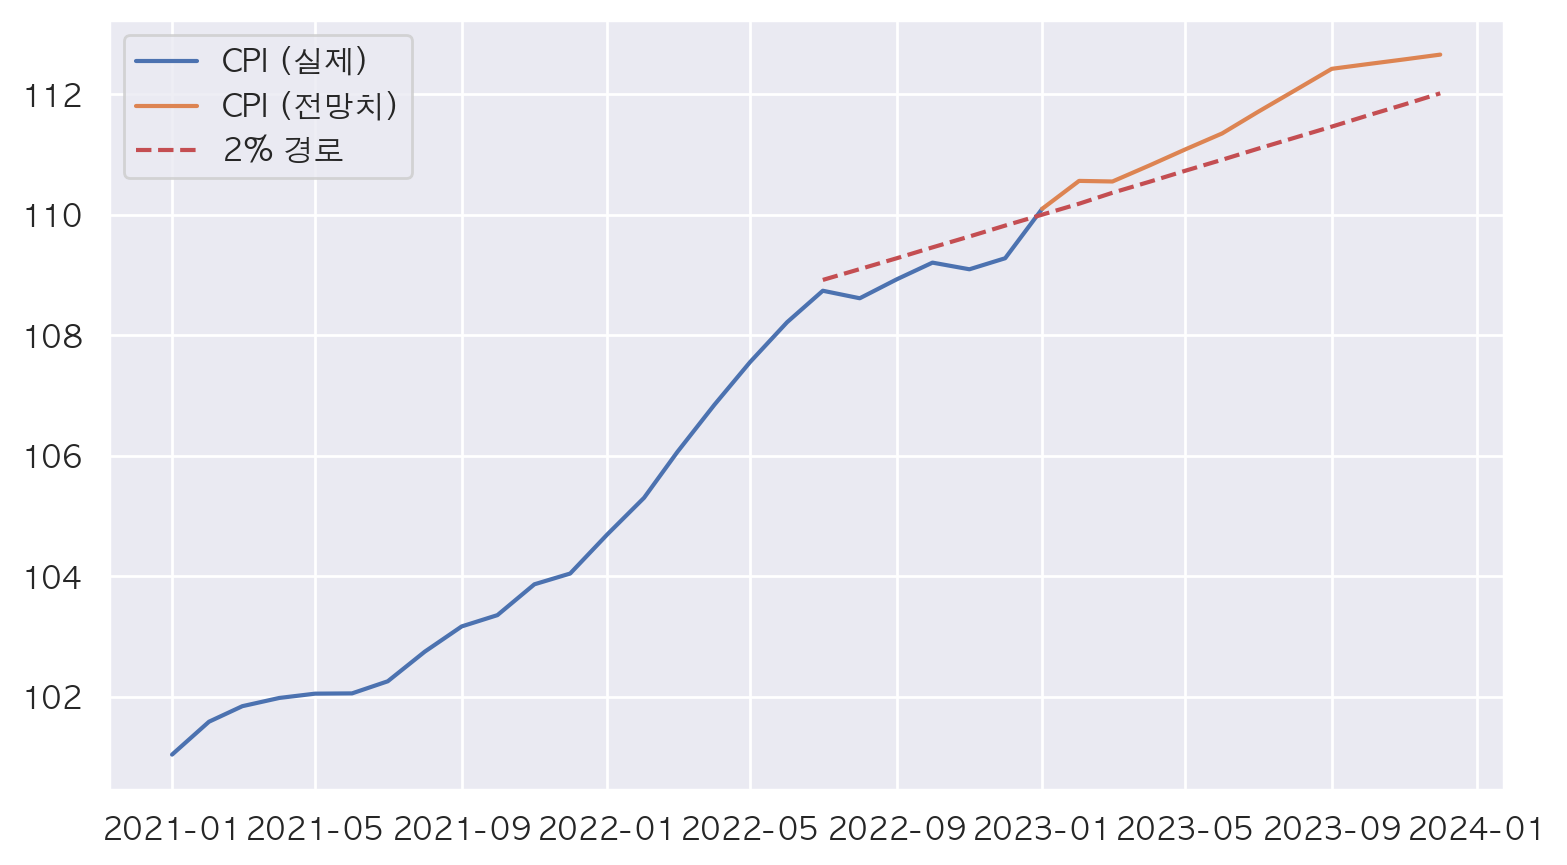

In [ ]:
plt.plot(df_CPI.loc[:'2023-01','level'], label='CPI (실제)')
#plt.plot(df_CPI.loc['2023-01':,'level'], label='CPI (전망치, 시나리오 1)')
#plt.plot(df_CPI.loc['2023-01':,'level_alt'], label='CPI (전망치, 시나리오 2)')
plt.plot(df_CPI.loc['2023-01':,'level_alt'], label='CPI (전망치)')
plt.plot(df_CPI.loc['2022-07':,'path'], linestyle='--', color='r', label='2% 경로')

plt.legend()

plt.show()

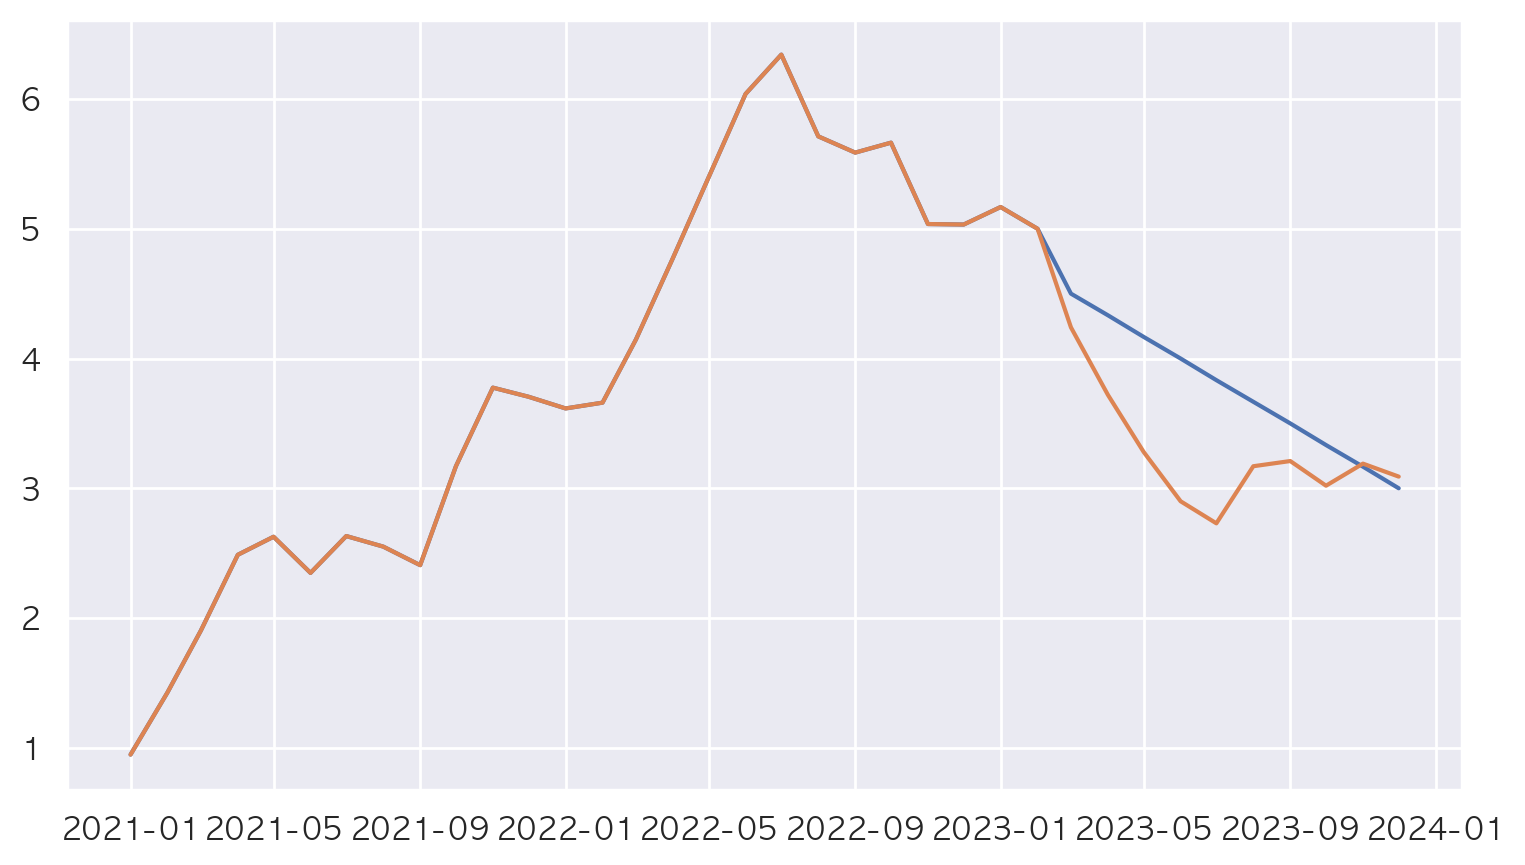

In [ ]:
plt.plot(df_CPI.loc[:,['inflation','inflation_alt']])
plt.show()